In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
df = pd.read_excel('/Users/yolanda/Downloads/excel_file1.xlsx')
df.set_index('year_month', inplace=True)

s = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_1.xlsx')
s.set_index('year_month', inplace=True)
v = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_2.xlsx')
v.set_index('year_month', inplace=True)
w = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_4.xlsx')
w.set_index('year_month', inplace=True)
z = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_5.xlsx')
z.set_index('year_month', inplace=True)
o = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_7.xlsx')
o.set_index('year_month', inplace=True)

Text(0, 0.5, 'Discharge (cumecs)')

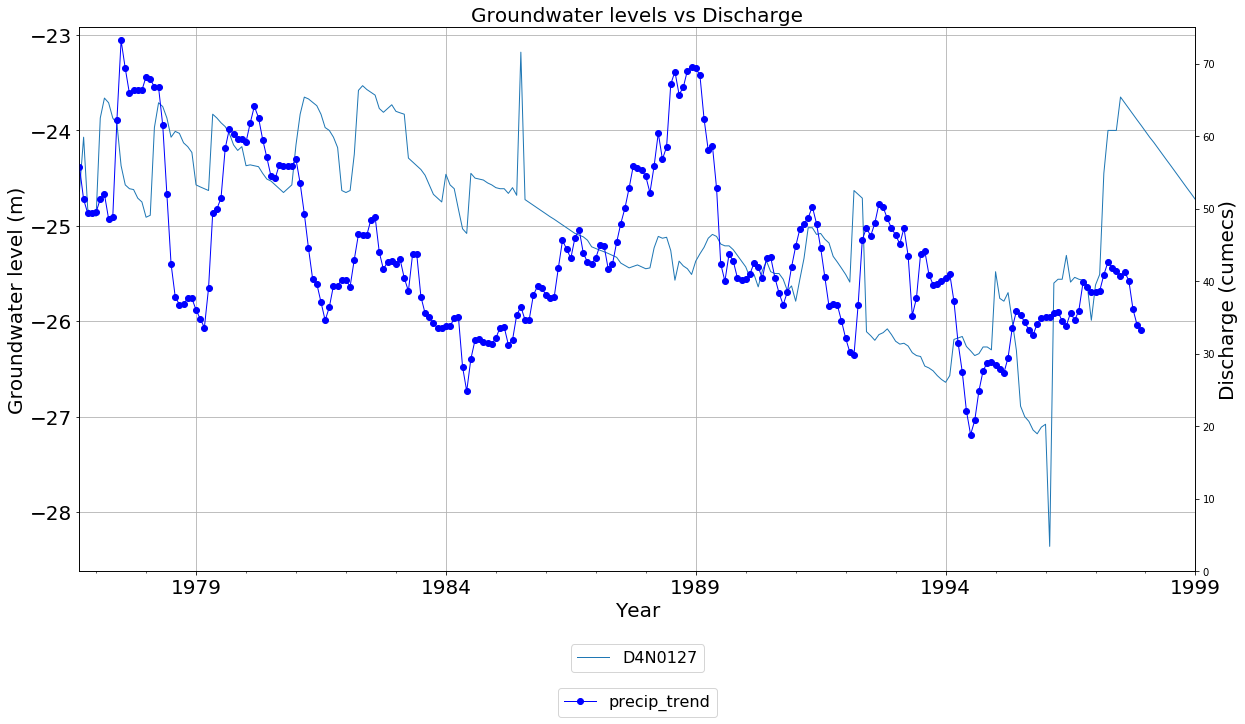

In [31]:
#gwls = gwls[gwls.index < '1999-02-01']  
class2 = gwls[['D4N0127']]

  
pima1 = pima['precip_trend']
#pima1= pima1.interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())

ax1 = class2.plot(figsize=(20,10), linewidth=1, fontsize = 20, grid=True)
ax2 = pima1.plot(secondary_y=True, legend=True, linewidth=1, marker="o", grid=True, color='blue') #precip_trend

#ax1.set_ylim(-18,8)
ax2.set_ylim(0,75) #(0, 600) for precip_trend and (0,5) for discharge



ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),ncol=12, prop={'size': 16});
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.20),ncol=12, prop={'size': 16});

ax1.set_title('Groundwater levels vs Discharge',fontsize=20) #'Groundwater levels vs precip_trend'
ax1.set_xlabel('Year',fontsize=20)
ax1.set_ylabel('Groundwater level (m)',fontsize=20)
ax2.set_ylabel('Discharge (cumecs)',fontsize=20) #Discharge #precip_trend (mm)


In [3]:
df['Abstraction'] = w['Usage']
df['2526CC00033'] = s[' 2526CC00033']
df['D4N0127'] = s[' D4N0127']
df['D4N0146'] = s[' D4N0146']
df['D4N0147'] = s[' D4N0147']
df['D4N0148'] = s[' D4N0148']

In [4]:
df

Temperature  Precipitation  Discharge  Abstraction  \
year_month                                                       
1950-01-01        23.90           95.9        NaN          NaN   
1950-02-01        25.10           52.8        NaN          NaN   
1950-03-01        23.75           71.4        NaN          NaN   
1950-04-01        19.65           58.6        NaN          NaN   
1950-05-01        14.60           27.7        NaN          NaN   
...                 ...            ...        ...          ...   
2019-08-01          NaN            NaN        NaN          NaN   
2019-09-01          NaN            NaN        NaN          NaN   
2019-10-01          NaN            NaN        NaN          NaN   
2019-11-01          NaN            NaN        NaN          NaN   
2019-12-01          NaN            NaN        NaN          NaN   

            scenario_usage  scenario_precip100  scenario_precip200  \
year_month                                                           
1950-01-01             NaN                95.9                95.9   
1950-02-01             NaN                52.8                52.8   
1950-03-01             NaN                71.4                71.4   
1950-04-01             NaN                58.6                58.6   
1950-05-01             NaN                27.7                27.7   
...                    ...                 ...                 ...   
2019-08-01             0.0                 0.0                 0.0   
2019-09-01             0.0                 0.0                 0.0   
2019-10-01             0.0                 0.0                 0.0   
2019-11-01             0.0                 0.0                 0.0   
2019-12-01             0.0                 0.0                 0.0   

            scenario_preciphalf  precip_trend  trend_scenario100  \
year_month                                                         
1950-01-01                47.95           NaN                NaN   
1950-02-01                26.40           NaN                NaN   
1950-03-01                35.70           NaN                NaN   
1950-04-01                29.30           NaN                NaN   
1950-05-01                13.85           NaN                NaN   
...                         ...           ...                ...   
2019-08-01                 0.00           NaN                NaN   
2019-09-01                 0.00           NaN                NaN   
2019-10-01                 0.00           NaN                NaN   
2019-11-01                 0.00           NaN                NaN   
2019-12-01                 0.00           NaN                NaN   

            trend_scenario200  trend_scenariohalf  2526CC00033  D4N0127  \
year_month                                                                
1950-01-01                NaN                 NaN          NaN      NaN   
1950-02-01                NaN                 NaN          NaN      NaN   
1950-03-01                NaN                 NaN          NaN      NaN   
1950-04-01                NaN                 NaN          NaN      NaN   
1950-05-01                NaN                 NaN          NaN      NaN   
...                       ...                 ...          ...      ...   
2019-08-01                NaN                 NaN     14.04337      NaN   
2019-09-01                NaN                 NaN     14.04000      NaN   
2019-10-01                NaN                 NaN          NaN      NaN   
2019-11-01                NaN                 NaN          NaN      NaN   
2019-12-01                NaN                 NaN          NaN      NaN   

            D4N0146  D4N0147  D4N0148  
year_month                             
1950-01-01      NaN      NaN      NaN  
1950-02-01      NaN      NaN      NaN  
1950-03-01      NaN      NaN      NaN  
1950-04-01      NaN      NaN      NaN  
1950-05-01      NaN      NaN      NaN  
...             ...      ...      ...  
2019-08-01      NaN      NaN      NaN  
2019-09-01      NaN  

In [5]:
df = df[['2526CC00033' ,'D4N0127','D4N0146' ,'D4N0147' ,'D4N0148','Temperature' ,'precip_trend' ,'Discharge' ,'Abstraction']]

In [6]:
df

2526CC00033  D4N0127  D4N0146  D4N0147  D4N0148  Temperature  \
year_month                                                                 
1950-01-01          NaN      NaN      NaN      NaN      NaN        23.90   
1950-02-01          NaN      NaN      NaN      NaN      NaN        25.10   
1950-03-01          NaN      NaN      NaN      NaN      NaN        23.75   
1950-04-01          NaN      NaN      NaN      NaN      NaN        19.65   
1950-05-01          NaN      NaN      NaN      NaN      NaN        14.60   
...                 ...      ...      ...      ...      ...          ...   
2019-08-01     14.04337      NaN      NaN      NaN      NaN          NaN   
2019-09-01     14.04000      NaN      NaN      NaN      NaN          NaN   
2019-10-01          NaN      NaN      NaN      NaN      NaN          NaN   
2019-11-01          NaN      NaN      NaN      NaN      NaN          NaN   
2019-12-01          NaN      NaN      NaN      NaN      NaN          NaN   

            precip_trend  Discharge  Abstraction  
year_month                                        
1950-01-01           NaN        NaN          NaN  
1950-02-01           NaN        NaN          NaN  
1950-03-01           NaN        NaN          NaN  
1950-04-01           NaN        NaN          NaN  
1950-05-01           NaN        NaN          NaN  
...                  ...        ...          ...  
2019-08-01           NaN        NaN          NaN  
2019-09-01           NaN        NaN          NaN  
2019-10-01           NaN        NaN          NaN  
2019-11-01           NaN        NaN          NaN  
2019-12-01           NaN        NaN          NaN  

[840 rows x 9 columns]

In [7]:
f = lambda x: -x; 
gwls = df[['2526CC00033' ,'D4N0127','D4N0146' ,'D4N0147' ,'D4N0148']].apply(f, axis=1)

#### checking when each varibale starts and ends 

In [8]:
result_dict = {}
def check_date(column):
    x = column.notnull()
    print(type(column[x]))
    result_dict[column.name] = [column[x].head(1).index[0], 
    column[x].tail(1).index[0]]
    
gwls.apply(check_date)
dates = pd.DataFrame(result_dict)
dates

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


2526CC00033    D4N0127    D4N0146    D4N0147    D4N0148
0  1977-01-01 1976-09-01 1977-01-01 1977-01-01 1977-01-01
1  2019-09-01 2005-01-01 2011-11-01 2015-06-01 2019-04-01

#### Limiting period based on minimum start of all 6 bh's and maximum finish of all 6 bh's

In [9]:

gwls = gwls[gwls.index > '1976-08-01']  
gwls = gwls[gwls.index < '2005-10-01']  

#### These boreholes are the onles with less that 32% missing data. 

Text(0, 0.5, 'Groundwater levels')

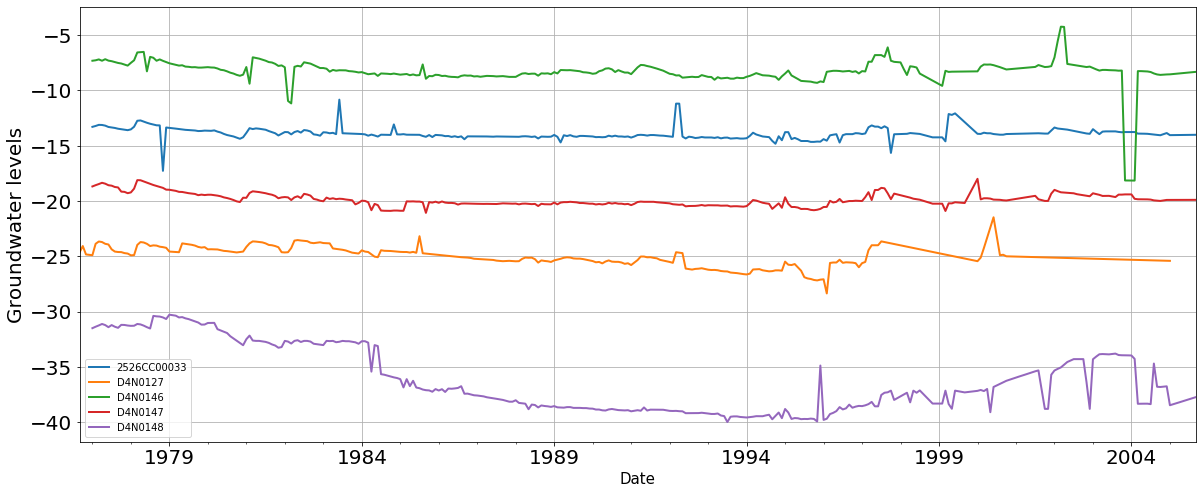

In [10]:
#visual illustration just to show all groundwater levels 

gwls.plot(figsize=(20,8), linewidth=2, fontsize = 20, grid=True);
plt.xlabel("Date",fontsize=15)
plt.ylabel("Groundwater levels",fontsize=20)


In [16]:
gwls['Temperature'] = df['Temperature']
gwls['precip_trend'] = df['precip_trend']
gwls['Discharge'] = df['Discharge']
gwls['Abstraction'] = df['Abstraction']
gwls

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

2526CC00033    D4N0127   D4N0146    D4N0147    D4N0148  \
year_month                                                           
1976-09-01          NaN -24.640000       NaN        NaN        NaN   
1976-10-01          NaN -24.071000       NaN        NaN        NaN   
1976-11-01          NaN -24.830000       NaN        NaN        NaN   
1976-12-01          NaN -24.864672       NaN        NaN        NaN   
1977-01-01    -13.29000 -24.900500 -7.310000 -18.680000 -31.500000   
...                 ...        ...       ...        ...        ...   
1998-09-01    -14.08626 -24.486247 -8.788776 -20.061463 -37.729837   
1998-10-01    -14.16187 -24.545000 -8.947899 -20.149268 -38.020081   
1998-11-01    -14.24000 -24.605711 -9.107021 -20.240000 -38.320000   
1998-12-01    -14.24000 -24.664464 -9.266144 -20.240000 -38.320000   
1999-01-01    -14.24000 -24.725175 -9.425266 -20.240000 -38.320000   

            Temperature  precip_trend  Discharge   Abstraction  
year_month                                                      
1976-09-01        19.15     55.791667      1.531  3.271530e+05  
1976-10-01        20.60     51.279167      1.389  3.271530e+05  
1976-11-01        21.55     49.341667      1.633  3.271530e+05  
1976-12-01        23.75     49.341667      1.308  3.271530e+05  
1977-01-01          NaN     49.508333      1.041  4.364772e+05  
...                 ...           ...        ...           ...  
1998-09-01        17.60     39.800000      0.367  1.639675e+06  
1998-10-01        18.25     43.258333      0.365  1.639675e+06  
1998-11-01        20.15     45.725000      0.364  1.639675e+06  
1998-12-01          NaN     47.608333      0.351  1.639675e+06  
1999-01-01        21.10     53.254167      0.349  1.738739e+06  

[269 rows x 9 columns]

### Reframing length of dataset based on bhid D4N0834 start and end dates 

In [23]:
pima = gwls.filter(['D4N0127', 'Temperature', 'precip_trend', 'Discharge', 'Abstraction'])
pima = pima[pima.index > '1976-08-01']  
pima = pima[pima.index < '1998-01-01'] 

In [26]:
pima.apply(lambda x: sum(x.isnull()), axis=0)

D4N0127         0
Temperature     0
precip_trend    0
Discharge       0
Abstraction     0
dtype: int64

#### Interpolating independant varibales only 

In [25]:
pima['Discharge']= pima['Discharge'].interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())
pima['precip_trend']= pima['precip_trend'].interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())
pima['Temperature']= pima['Temperature'].interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())

#### Calculating start and end dates for new dataframa

In [15]:
result_dict = {}
def check_date(column):
    x = column.notnull()
    print(type(column[x]))
    result_dict[column.name] = [column[x].head(1).index[0], 
    column[x].tail(1).index[0]]
    
pima.apply(check_date)
dates = pd.DataFrame(result_dict)
dates

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


D4N0127 Temperature precip_trend  Discharge Abstraction
0 1976-09-01  1976-09-01   1976-09-01 1976-09-01  1976-09-01
1 1997-12-01  1997-12-01   1997-12-01 1997-12-01  1997-12-01

### Mutual information stats

In [16]:
from sklearn.feature_selection import mutual_info_regression

In [17]:
X = pima[['Temperature', 'precip_trend', 'Discharge','Abstraction']] # Features
y = pima[['D4N0127']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','D4N0115','D4N0110' 

In [18]:
mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Temperature     0.073506
precip_trend    0.433812
Discharge       0.767136
Abstraction     1.000000
dtype: float64

## LAG TESTING 

In [19]:
precip834  = pima.filter(['D4N0127', 'precip_trend'])
discha834  = pima.filter(['D4N0127', 'Discharge'])
temp834    = pima.filter(['D4N0127', 'Temperature'])
abstr834   = pima.filter(['D4N0127', 'Abstraction'])

In [20]:
lags = range(1, 24)  # 2year lag

# precip_trend
precip0834 = precip834.assign(**{ '{} (t-{})'.format([ 'precip_trend'], t): precip834[[ 'precip_trend']].shift(t) for t in lags for col in precip834})
# disharge
discha0834 = discha834.assign(**{ '{} (t-{})'.format([ 'Discharge'], t): discha834[[ 'Discharge']].shift(t) for t in lags for col in discha834})
# temperature
temp0834 = temp834.assign(**{ '{} (t-{})'.format([ 'Temperature'], t): temp834[[ 'Temperature']].shift(t) for t in lags for col in temp834})
# abstraction
abstr0834 = abstr834.assign(**{ '{} (t-{})'.format([ 'Abstraction'], t): abstr834[[ 'Abstraction']].shift(t) for t in lags for col in abstr834})

## Cross Correlation

- degree of similarity between two time series in different times or space 
- lag is considred since time is under investigation

### Rainfall

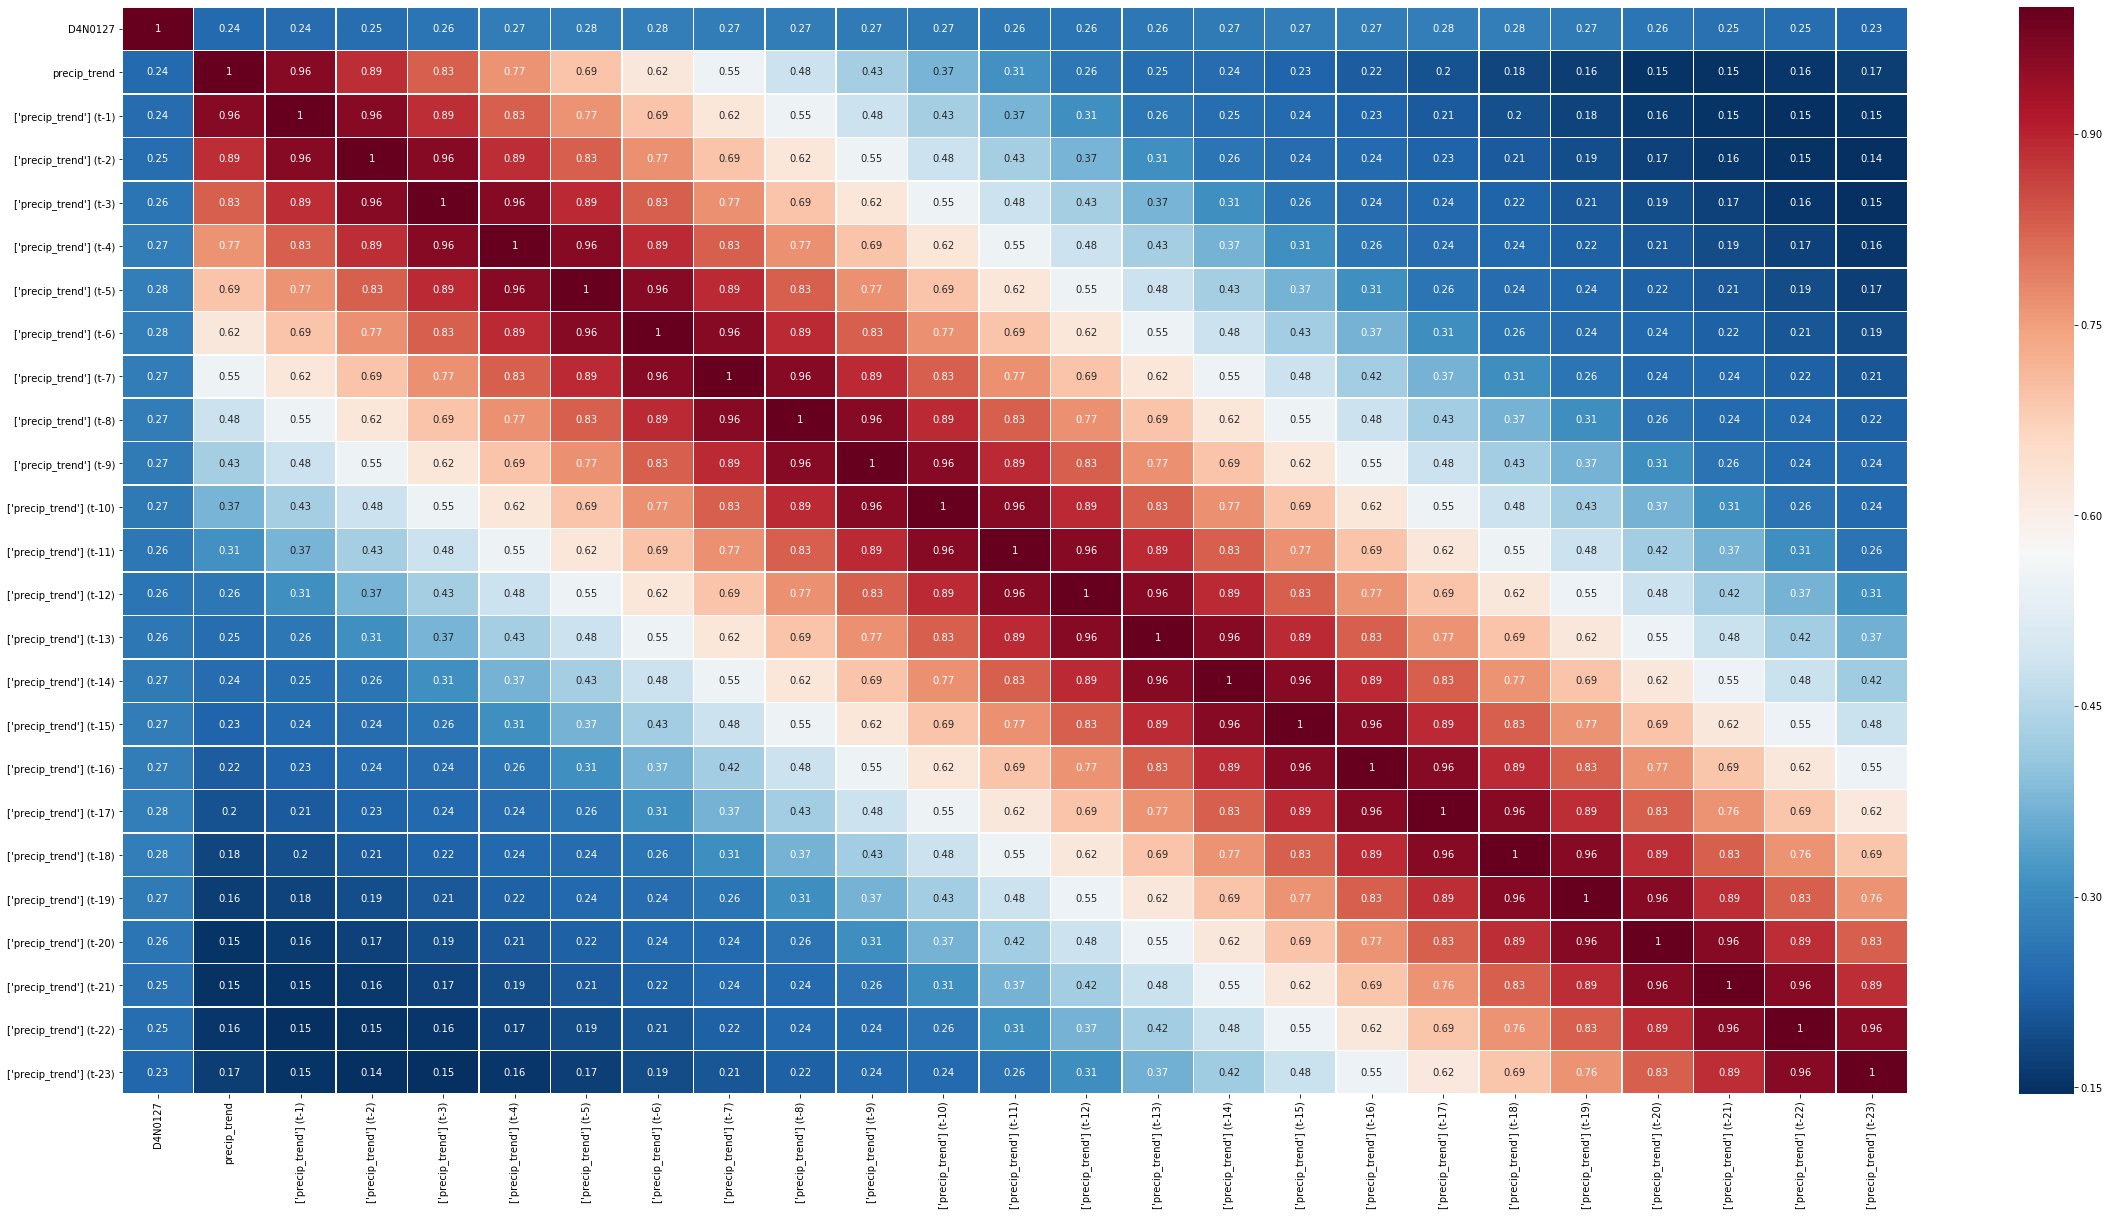

In [21]:
# precip0834 , 0111, 0122 , 0037, 0115, 0110

import seaborn as sns
corrm1 = precip0834.corr(method = 'spearman')
corrm2 = precip0834.corr(method = 'pearson')
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40,20))         # Sample figsize in inches

sns.heatmap(corrm2, 
            xticklabels=corrm2.columns,
            yticklabels=corrm2.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables.
#In our case, the maroon shows very strong correlations. 
#The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

### Temperature

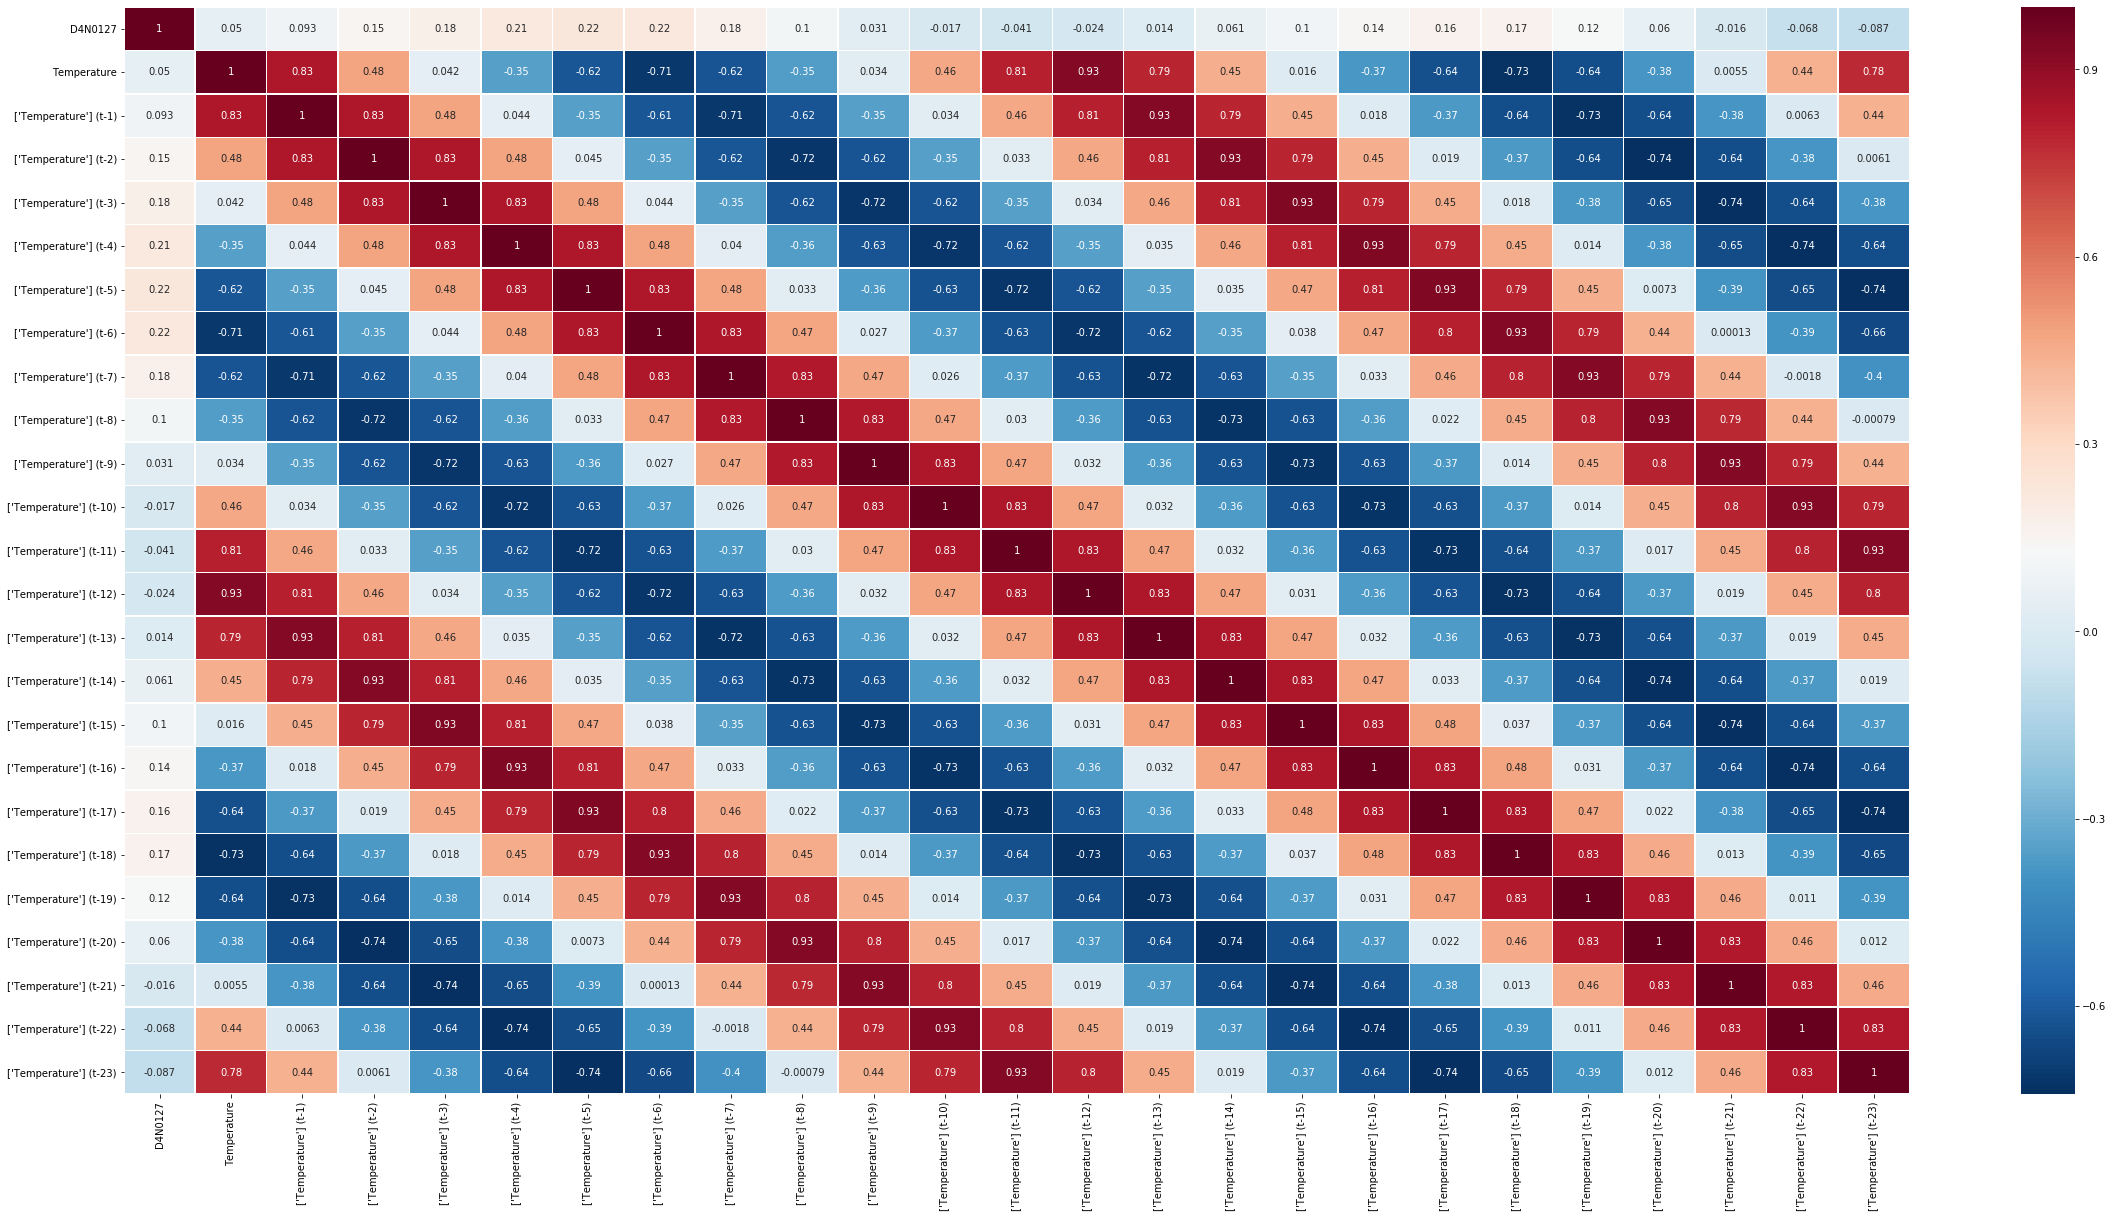

In [22]:
# temp0834 , 0111, 0122 , 0037, 0115, 0110

import seaborn as sns
corrm1 = temp0834.corr(method = 'spearman')
corrm2 = temp0834.corr(method = 'pearson')
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40,20))         # Sample figsize in inches

sns.heatmap(corrm2, 
            xticklabels=corrm2.columns,
            yticklabels=corrm2.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables.
#In our case, the maroon shows very strong correlations. 
#The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

#### Shifting variables based on lag variables 

In [23]:
pima['Temperature (t-5)'] = pima.Temperature.shift(4)
pima['precip_trend (t-16)'] = pima.precip_trend.shift(4)
pima

D4N0127  Temperature  precip_trend  Discharge   Abstraction  \
year_month                                                                  
1976-09-01 -24.640000       19.150     55.791667      1.531  3.271530e+05   
1976-10-01 -24.071000       20.600     51.279167      1.389  3.271530e+05   
1976-11-01 -24.830000       21.550     49.341667      1.633  3.271530e+05   
1976-12-01 -24.864672       23.750     49.341667      1.308  3.271530e+05   
1977-01-01 -24.900500       24.075     49.508333      1.041  4.364772e+05   
...               ...          ...           ...        ...           ...   
1997-08-01 -23.710711       13.950     41.266667      0.616  1.638955e+06   
1997-09-01 -23.771422       16.750     40.083333      0.583  1.638955e+06   
1997-10-01 -23.830175       18.550     36.125000      0.517  1.638955e+06   
1997-11-01 -23.890886       20.150     33.925000      0.507  1.638955e+06   
1997-12-01 -23.949639       22.700     33.316667      0.503  1.638955e+06   

            Temperature (t-5)  precip_trend (t-16)  
year_month                                          
1976-09-01                NaN                  NaN  
1976-10-01                NaN                  NaN  
1976-11-01                NaN                  NaN  
1976-12-01                NaN                  NaN  
1977-01-01              19.15            55.791667  
...                       ...                  ...  
1997-08-01              15.20            42.666667  
1997-09-01              12.35            41.866667  
1997-10-01               9.80            41.408333  
1997-11-01              10.50            40.725000  
1997-12-01              13.95            41.266667  

[256 rows x 7 columns]

In [24]:
X = pima[['Temperature (t-5)', 'precip_trend (t-16)', 'Discharge','Abstraction', 'D4N0127']] # Features
y = pima[['D4N0127']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','D4N0115','D4N0110' 

In [25]:
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [26]:
mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Temperature (t-5)      0.029546
precip_trend (t-16)    0.100862
Discharge              0.219904
Abstraction            0.288073
D4N0127                1.000000
dtype: float64

### Auto and Cross corr plots combined 

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [28]:
rainfall = X['precip_trend (t-16)']
temperature = X['Temperature (t-5)']
discharge = X['Discharge']
usage =  X['Abstraction']
bhid =  y['D4N0127']

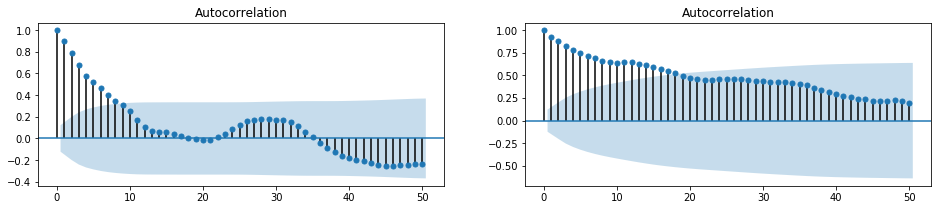

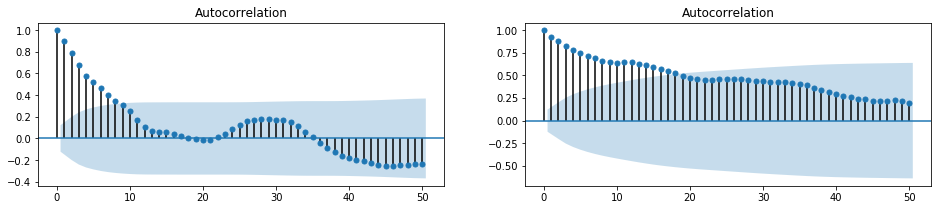

In [29]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(rainfall.tolist(), lags=50, ax=axes[0])
plot_acf(bhid.tolist(), lags=50, ax=axes[1])

Checking if target variable is auto correlated.
Auto-corr (similarity between observations as a function of the lag time)

- plot looks like a sigmoid funtion (hint for seasonality)

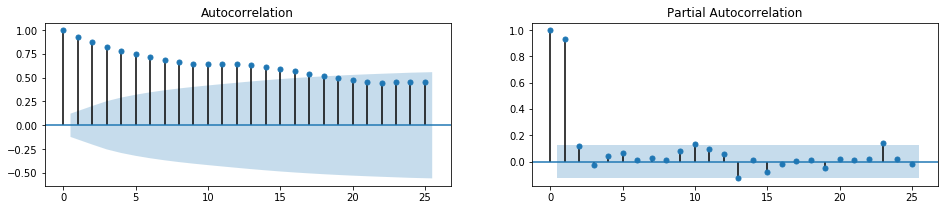

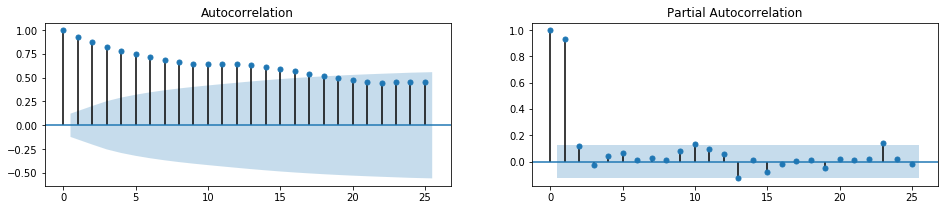

In [30]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(bhid, lags=25, ax=axes[0])
plot_pacf(bhid, lags=25, ax=axes[1])

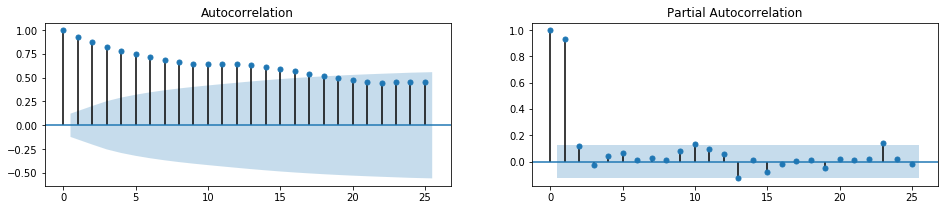

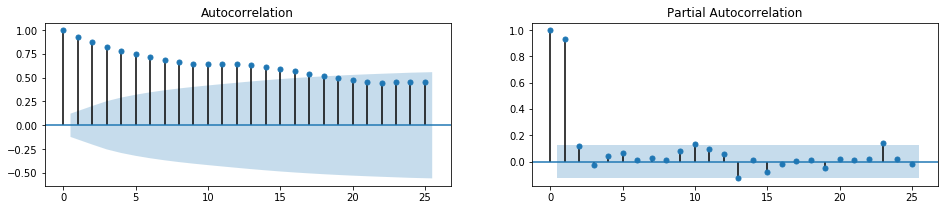

In [31]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(bhid, lags=25, ax=axes[0])
plot_pacf(bhid, lags=25, ax=axes[1])

#### To check whether data is stationary we use Augmented Dickey-Fuller (ADF) Test

For time series modeling, data needs to be stationary — if there is a trend in the data we need to get rid of it. 

#### BHID

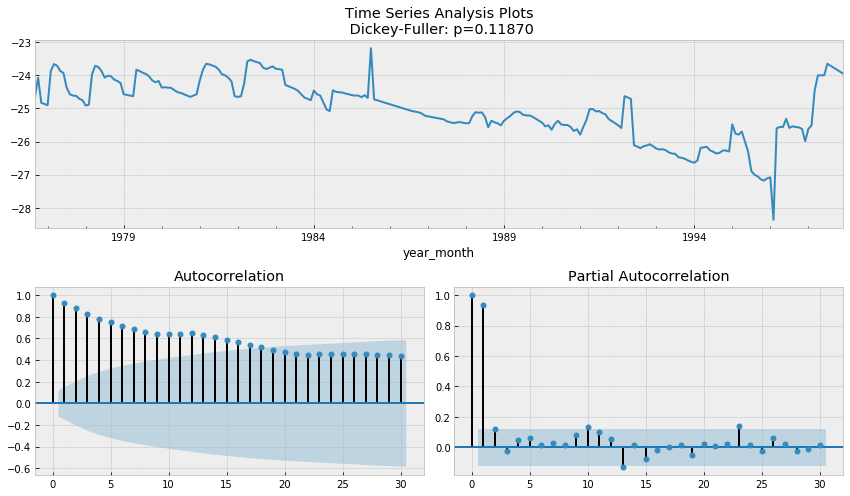

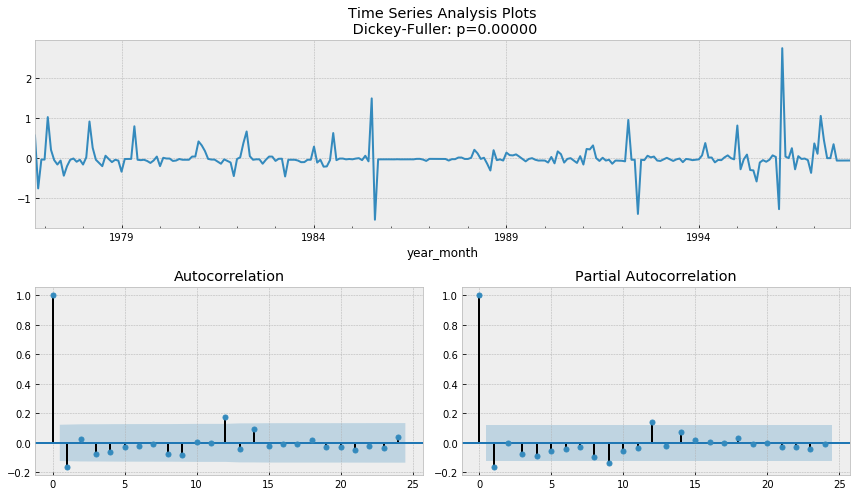

In [32]:
In [2]: import statsmodels.api as sm
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(bhid, lags=30)

# Take the first difference to remove to make the process stationary
D4N0123_diff = bhid - bhid.shift(1)

tsplot(D4N0123_diff[1:], lags=24)

#### Rainfall

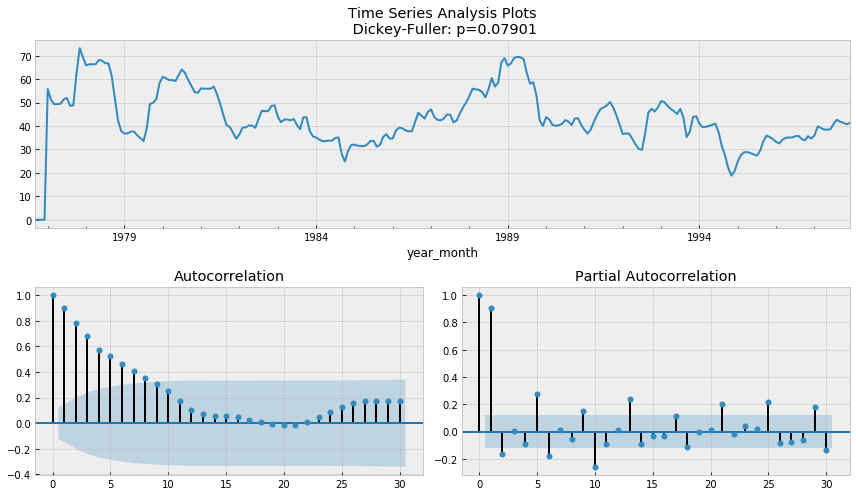

In [33]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(rainfall, lags=30)

#### Temp

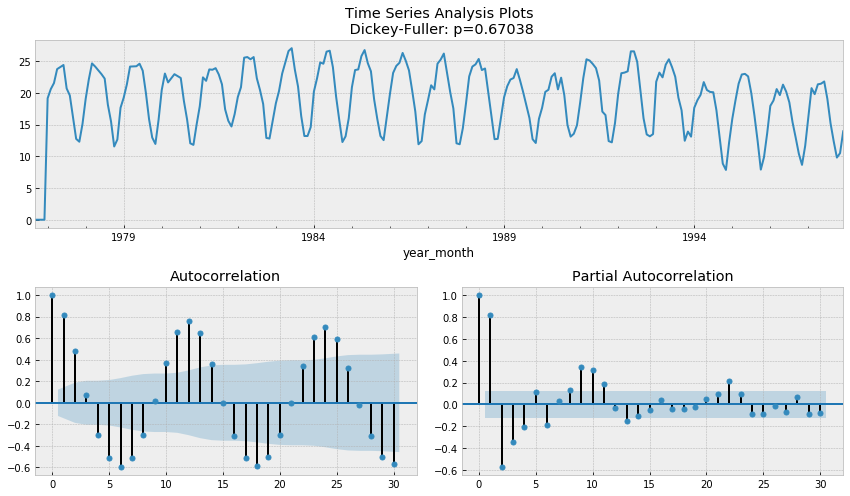

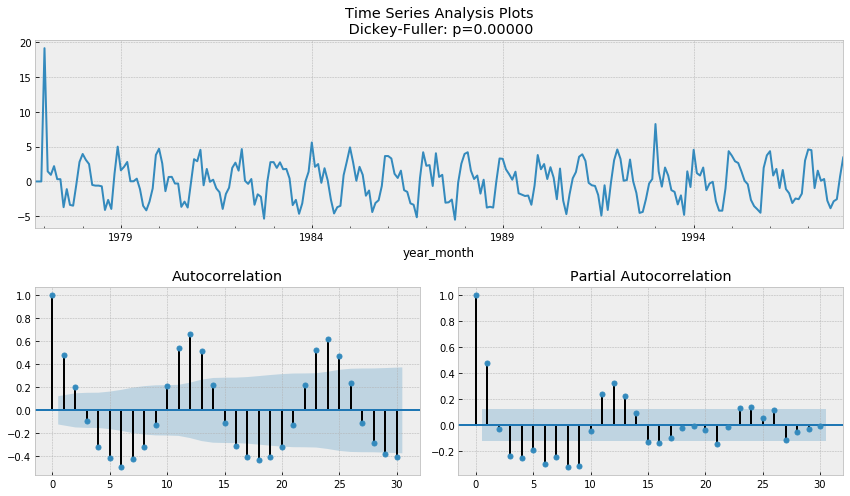

In [34]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(temperature, lags=30)

#Take the first difference to remove to make the process stationary
temp_diff = temperature - temperature.shift(1)


tsplot(temp_diff[1:], lags=30)


#### Discharge

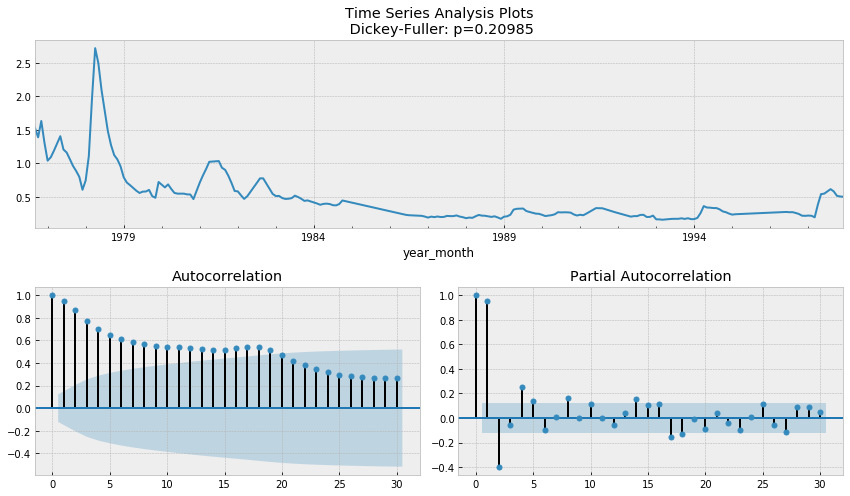

In [35]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(discharge, lags=30)

#### Usage

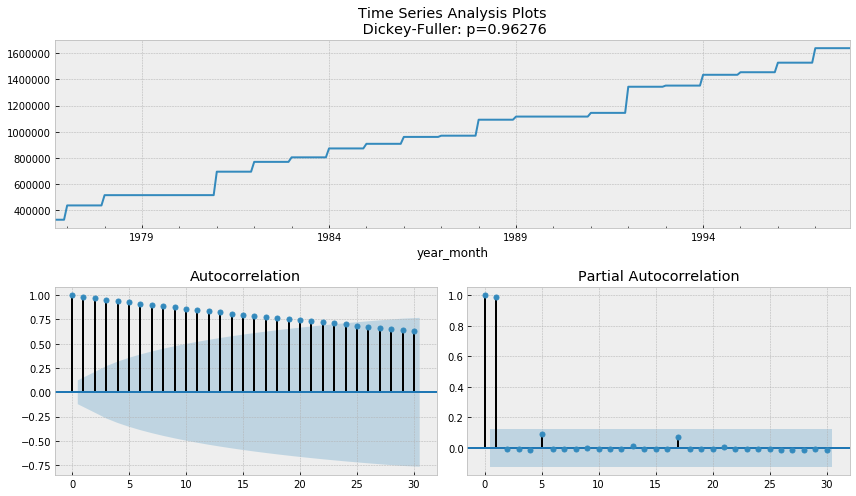

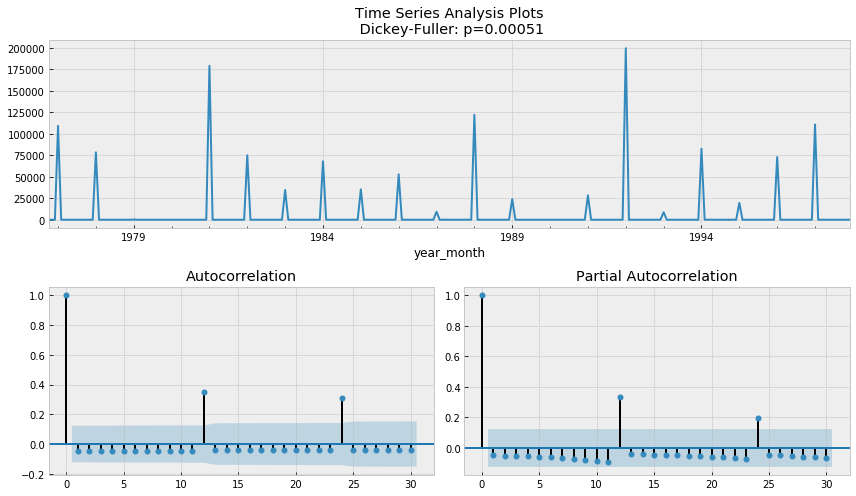

In [36]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(usage, lags=30)

#Take the first difference to remove to make the process stationary
usage_diff = usage - usage.shift(1)


tsplot(usage_diff[1:], lags=30)



### Differenced dataframe (poor model results)

In [37]:
pima_diff = pd.DataFrame({'D4N0123': D4N0123_diff ,'Temperature': temp_diff,  'Rainfall': rainfall,  'Discharge': discharge, 'Abstraction': usage_diff}, columns=['D4N0123','Temperature','precip_trend','Discharge', 'Abstraction'])
pima_diff.apply(lambda x: sum(x.isnull()), axis=0)

D4N0123           1
Temperature       1
precip_trend    256
Discharge         0
Abstraction       1
dtype: int64

In [38]:
#X = pima_diff[['Temperature', 'Discharge','Abstraction']] # Features
#y = pima_diff[['D4N0834']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','D4N0115','D4N0110' 

### Visual illustration to help select train and test data

Text(0, 0.5, 'Groundwater levels')

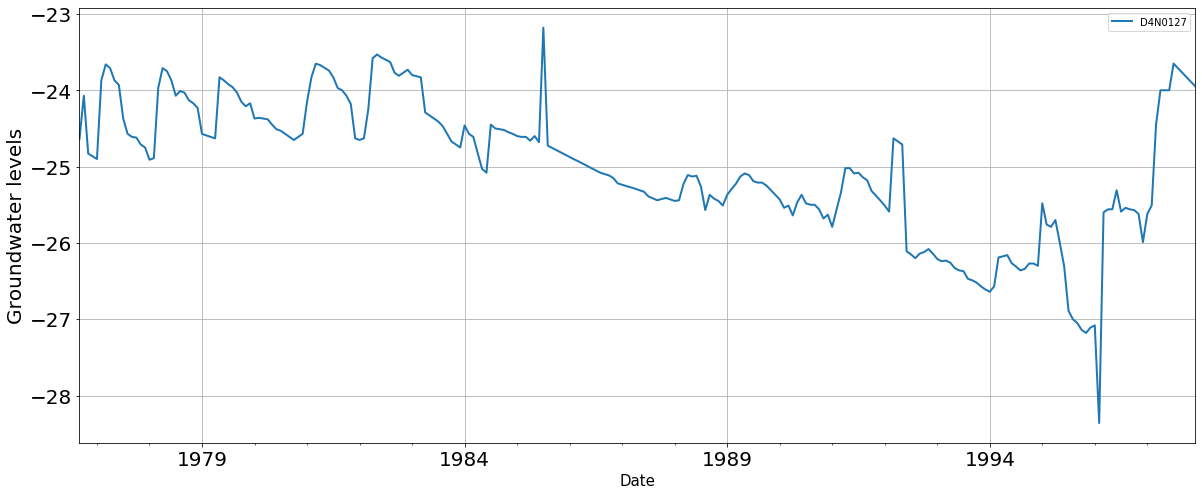

In [39]:
pima[['D4N0127']].plot(figsize=(20,8), linewidth=2, fontsize = 20, grid=True);
plt.xlabel("Date",fontsize=15)
plt.ylabel("Groundwater levels",fontsize=20)


### Model Parameters

In [40]:
pima['precip_trend_log'] = 1 +np.log1p(pima['precip_trend (t-16)'])
pima['Temperature_log'] = 1 +np.log1p(pima['Temperature (t-5)'])
pima['Discharge_log'] = 1 + np.log1p(pima['Discharge'])
pima['Abstraction_log'] = 1 + np.log1p(pima['Abstraction'])

In [41]:
pima

D4N0127  Temperature  precip_trend  Discharge   Abstraction  \
year_month                                                                  
1976-09-01 -24.640000       19.150     55.791667      1.531  3.271530e+05   
1976-10-01 -24.071000       20.600     51.279167      1.389  3.271530e+05   
1976-11-01 -24.830000       21.550     49.341667      1.633  3.271530e+05   
1976-12-01 -24.864672       23.750     49.341667      1.308  3.271530e+05   
1977-01-01 -24.900500       24.075     49.508333      1.041  4.364772e+05   
...               ...          ...           ...        ...           ...   
1997-08-01 -23.710711       13.950     41.266667      0.616  1.638955e+06   
1997-09-01 -23.771422       16.750     40.083333      0.583  1.638955e+06   
1997-10-01 -23.830175       18.550     36.125000      0.517  1.638955e+06   
1997-11-01 -23.890886       20.150     33.925000      0.507  1.638955e+06   
1997-12-01 -23.949639       22.700     33.316667      0.503  1.638955e+06   

            Temperature (t-5)  precip_trend (t-16)  precip_trend_log  \
year_month                                                             
1976-09-01                NaN                  NaN               NaN   
1976-10-01                NaN                  NaN               NaN   
1976-11-01                NaN                  NaN               NaN   
1976-12-01                NaN                  NaN               NaN   
1977-01-01              19.15            55.791667          5.039390   
...                       ...                  ...               ...   
1997-08-01              15.20            42.666667          4.776585   
1997-09-01              12.35            41.866667          4.758095   
1997-10-01               9.80            41.408333          4.747345   
1997-11-01              10.50            40.725000          4.731100   
1997-12-01              13.95            41.266667          4.743999   

            Temperature_log  Discharge_log  Abstraction_log  
year_month                                                   
1976-09-01              NaN       1.928614        13.698186  
1976-10-01              NaN       1.870875        13.698186  
1976-11-01              NaN       1.968124        13.698186  
1976-12-01              NaN       1.836381        13.698186  
1977-01-01         4.003204       1.713440        13.986494  
...                     ...            ...              ...  
1997-08-01         3.785011       1.479954        15.309570  
1997-09-01         3.591516       1.459322        15.309570  
1997-10-01         3.379546       1.416735        15.309570  
1997-11-01         3.442347       1.410121        15.309570  
1997-12-01         3.704711       1.407463        15.309570  

[256 rows x 11 columns]

In [42]:
for obs in range(1,5):
    pima["t_" + str(obs)] = pima['D4N0127'].shift(obs)
pima.fillna(0, inplace=True)

In [43]:
pima

D4N0127  Temperature  precip_trend  Discharge   Abstraction  \
year_month                                                                  
1976-09-01 -24.640000       19.150     55.791667      1.531  3.271530e+05   
1976-10-01 -24.071000       20.600     51.279167      1.389  3.271530e+05   
1976-11-01 -24.830000       21.550     49.341667      1.633  3.271530e+05   
1976-12-01 -24.864672       23.750     49.341667      1.308  3.271530e+05   
1977-01-01 -24.900500       24.075     49.508333      1.041  4.364772e+05   
...               ...          ...           ...        ...           ...   
1997-08-01 -23.710711       13.950     41.266667      0.616  1.638955e+06   
1997-09-01 -23.771422       16.750     40.083333      0.583  1.638955e+06   
1997-10-01 -23.830175       18.550     36.125000      0.517  1.638955e+06   
1997-11-01 -23.890886       20.150     33.925000      0.507  1.638955e+06   
1997-12-01 -23.949639       22.700     33.316667      0.503  1.638955e+06   

            Temperature (t-5)  precip_trend (t-16)  precip_trend_log  \
year_month                                                             
1976-09-01               0.00             0.000000          0.000000   
1976-10-01               0.00             0.000000          0.000000   
1976-11-01               0.00             0.000000          0.000000   
1976-12-01               0.00             0.000000          0.000000   
1977-01-01              19.15            55.791667          5.039390   
...                       ...                  ...               ...   
1997-08-01              15.20            42.666667          4.776585   
1997-09-01              12.35            41.866667          4.758095   
1997-10-01               9.80            41.408333          4.747345   
1997-11-01              10.50            40.725000          4.731100   
1997-12-01              13.95            41.266667          4.743999   

            Temperature_log  Discharge_log  Abstraction_log        t_1  \
year_month                                                               
1976-09-01         0.000000       1.928614        13.698186   0.000000   
1976-10-01         0.000000       1.870875        13.698186 -24.640000   
1976-11-01         0.000000       1.968124        13.698186 -24.071000   
1976-12-01         0.000000       1.836381        13.698186 -24.830000   
1977-01-01         4.003204       1.713440        13.986494 -24.864672   
...                     ...            ...              ...        ...   
1997-08-01         3.785011       1.479954        15.309570 -23.650000   
1997-09-01         3.591516       1.459322        15.309570 -23.710711   
1997-10-01         3.379546       1.416735        15.309570 -23.771422   
1997-11-01         3.442347       1.410121        15.309570 -23.830175   
1997-12-01         3.704711       1.407463        15.309570 -23.890886   

                  t_2        t_3        t_4  
year_month                                   
1976-09-01   0.000000   0.000000   0.000000  
1976-10-01   0.000000   0.000000   0.000000  
1976-11-01 -24.640000   0.000000   0.000000  
1976-12-01 -24.071000 -24.640000   0.000000  
1977-01-01 -24.830000 -24.071000 -24.640000  
...               ...        ...        ...  
1997-08-01 -24.000000 -24.000000 -24.000000  
1997-09-01 -23.650000 -24.000000 -24.000000  
1997-10-01 -23.710711 -23.650000 -24.000000  
1997-11-01 -23.771422 -23.710711 -23.650000  
1997-12-01 -23.830175 -23.771422 -23.710711  

[256 rows x 15 columns]

In [44]:
pima.shape

(256, 15)

In [45]:
pima1  = pima[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2','D4N0127']]
scaler = StandardScaler()
pima1  = pd.DataFrame(scaler.fit_transform(pima1), columns=pima1.columns, index=pima1.index)

### All variables

In [46]:
X = pima1[['Temperature_log','precip_trend_log' ,'Discharge_log','Abstraction_log' ,'t_1', 't_2']]
y = pima1['D4N0127']

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)

t_1                 1.000000
t_2                 0.727234
Abstraction_log     0.604328
Discharge_log       0.485285
precip_trend_log    0.207614
Temperature_log     0.069674
dtype: float64

In [47]:
X = pima1[['Discharge_log' ,'precip_trend_log' ,'Discharge_log','Abstraction_log' ,'t_1', 't_2']].values
y = pima1['D4N0127'].values
y = y.reshape(-1,1)

In [48]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits = 5)
for train_index, test_index in tss.split(X):
    X_train, X_test = X[train_index, :], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(214, 6) (214, 1)
(42, 6) (42, 1)


In [49]:
def forecast(model, test_forecast, gwl, steps_ahead):
    y_pred = []
    current_output = gwl
    for step in range(steps_ahead):
        #print(test_forecast[step])
        input_test = np.concatenate([test_forecast[step][:-1], [current_output]])
        #input_test = [test_forecast[0][0][:-1], gwl]
        #print(input_test)
        pred = model.predict(input_test.reshape(1,1,6))
        y_pred.append(pred[0][0])
        #print(pred)
        current_output = pred[0][0]
    return y_pred

### LSTM

In [53]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import GRU, LSTM
from tensorflow.keras.optimizers import Adam

In [54]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_lstm', 'rmse_lstm', 'r2_lstm','mae_lstm'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    optimizer = Adam(lr=0.00001)
    model = Sequential()
    model.add(LSTM(50, input_shape=(1, 6)))
    model.add(Dropout(0.1))

    model.add(Dense(1))

    model.compile(loss='mae', optimizer='adam')

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
    
    history = model.fit(X_t_reshaped, y_train, epochs=700
                    , batch_size=72, validation_data=(X_val_reshaped, y_test), verbose=2, callbacks=[check, early], shuffle=False)

    #running function
    gwl = -1.47143527
    test_forecast = X_test
    steps_ahead = 42
    y_pred = forecast(model, test_forecast, gwl, steps_ahead)
    y_pred = np.array(y_pred)
    
    #metrics for test
    y_lstm = y_pred
    test_pred.append(y_lstm)
    mse_lstm = mean_squared_error(y_test, y_lstm)
    rmse_lstm = np.sqrt(mse_lstm)
    r2_lstm = r2_score(y_test, y_lstm)
    mae_lstm = mean_absolute_error(y_test, y_lstm)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_lstm,Round), round(rmse_lstm,Round), round(r2_lstm,Round),round(mae_lstm,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(214, 6)
Train on 214 samples, validate on 42 samples
Epoch 1/700

Epoch 00001: val_loss improved from inf to 1.33173, saving model to model.h5
214/214 - 4s - loss: 0.8010 - val_loss: 1.3317
Epoch 2/700

Epoch 00002: val_loss improved from 1.33173 to 1.31606, saving model to model.h5
214/214 - 0s - loss: 0.7786 - val_loss: 1.3161
Epoch 3/700

Epoch 00003: val_loss improved from 1.31606 to 1.30010, saving model to model.h5
214/214 - 0s - loss: 0.7623 - val_loss: 1.3001
Epoch 4/700

Epoch 00004: val_loss improved from 1.30010 to 1.28396, saving model to model.h5
214/214 - 0s - loss: 0.7443 - val_loss: 1.2840
Epoch 5/700

Epoch 00005: val_loss improved from 1.28396 to 1.26772, saving model to model.h5
214/214 - 0s - loss: 0.7257 - val_loss: 1.2677
Epoch 6/700

Epoch 00006: val_loss improved from 1.26772 to 1.25138, saving model to model.h5
214/214 - 0s - loss: 0.7106 - val_loss: 1.2514
Epoch 7/700

Epoch 00007: val_loss improved from 1.25138 to 1.23490, saving model to mode

214/214 - 0s - loss: 0.2479 - val_loss: 0.6402
Epoch 59/700

Epoch 00059: val_loss improved from 0.64021 to 0.63480, saving model to model.h5
214/214 - 0s - loss: 0.2424 - val_loss: 0.6348
Epoch 60/700

Epoch 00060: val_loss improved from 0.63480 to 0.62935, saving model to model.h5
214/214 - 0s - loss: 0.2427 - val_loss: 0.6294
Epoch 61/700

Epoch 00061: val_loss improved from 0.62935 to 0.62397, saving model to model.h5
214/214 - 0s - loss: 0.2398 - val_loss: 0.6240
Epoch 62/700

Epoch 00062: val_loss improved from 0.62397 to 0.61867, saving model to model.h5
214/214 - 0s - loss: 0.2390 - val_loss: 0.6187
Epoch 63/700

Epoch 00063: val_loss improved from 0.61867 to 0.61348, saving model to model.h5
214/214 - 0s - loss: 0.2310 - val_loss: 0.6135
Epoch 64/700

Epoch 00064: val_loss improved from 0.61348 to 0.60818, saving model to model.h5
214/214 - 0s - loss: 0.2278 - val_loss: 0.6082
Epoch 65/700

Epoch 00065: val_loss improved from 0.60818 to 0.60281, saving model to model.h5
214/21

Epoch 117/700

Epoch 00117: val_loss improved from 0.41488 to 0.41317, saving model to model.h5
214/214 - 0s - loss: 0.1709 - val_loss: 0.4132
Epoch 118/700

Epoch 00118: val_loss improved from 0.41317 to 0.41074, saving model to model.h5
214/214 - 0s - loss: 0.1730 - val_loss: 0.4107
Epoch 119/700

Epoch 00119: val_loss improved from 0.41074 to 0.40873, saving model to model.h5
214/214 - 0s - loss: 0.1675 - val_loss: 0.4087
Epoch 120/700

Epoch 00120: val_loss improved from 0.40873 to 0.40747, saving model to model.h5
214/214 - 0s - loss: 0.1698 - val_loss: 0.4075
Epoch 121/700

Epoch 00121: val_loss improved from 0.40747 to 0.40597, saving model to model.h5
214/214 - 0s - loss: 0.1667 - val_loss: 0.4060
Epoch 122/700

Epoch 00122: val_loss improved from 0.40597 to 0.40397, saving model to model.h5
214/214 - 0s - loss: 0.1735 - val_loss: 0.4040
Epoch 123/700

Epoch 00123: val_loss improved from 0.40397 to 0.40108, saving model to model.h5
214/214 - 0s - loss: 0.1732 - val_loss: 0.4011

Epoch 175/700

Epoch 00175: val_loss did not improve from 0.34925
214/214 - 0s - loss: 0.1573 - val_loss: 0.3495
Epoch 176/700

Epoch 00176: val_loss did not improve from 0.34925
214/214 - 0s - loss: 0.1508 - val_loss: 0.3494
Epoch 177/700

Epoch 00177: val_loss improved from 0.34925 to 0.34921, saving model to model.h5
214/214 - 0s - loss: 0.1524 - val_loss: 0.3492
Epoch 178/700

Epoch 00178: val_loss improved from 0.34921 to 0.34875, saving model to model.h5
214/214 - 0s - loss: 0.1548 - val_loss: 0.3488
Epoch 179/700

Epoch 00179: val_loss improved from 0.34875 to 0.34849, saving model to model.h5
214/214 - 0s - loss: 0.1530 - val_loss: 0.3485
Epoch 180/700

Epoch 00180: val_loss improved from 0.34849 to 0.34820, saving model to model.h5
214/214 - 0s - loss: 0.1611 - val_loss: 0.3482
Epoch 181/700

Epoch 00181: val_loss improved from 0.34820 to 0.34807, saving model to model.h5
214/214 - 0s - loss: 0.1514 - val_loss: 0.3481
Epoch 182/700

Epoch 00182: val_loss did not improve from 0

Epoch 244/700

Epoch 00244: val_loss did not improve from 0.34509
214/214 - 0s - loss: 0.1446 - val_loss: 0.3463
Epoch 245/700

Epoch 00245: val_loss did not improve from 0.34509
214/214 - 0s - loss: 0.1457 - val_loss: 0.3473
Epoch 246/700

Epoch 00246: val_loss did not improve from 0.34509
214/214 - 0s - loss: 0.1428 - val_loss: 0.3482
Epoch 247/700

Epoch 00247: val_loss did not improve from 0.34509
214/214 - 0s - loss: 0.1470 - val_loss: 0.3483
Epoch 248/700

Epoch 00248: val_loss did not improve from 0.34509
214/214 - 0s - loss: 0.1417 - val_loss: 0.3480
Epoch 249/700

Epoch 00249: val_loss did not improve from 0.34509
214/214 - 0s - loss: 0.1435 - val_loss: 0.3477
Epoch 250/700

Epoch 00250: val_loss did not improve from 0.34509
214/214 - 0s - loss: 0.1442 - val_loss: 0.3474
Epoch 251/700

Epoch 00251: val_loss did not improve from 0.34509
214/214 - 0s - loss: 0.1493 - val_loss: 0.3469
Epoch 252/700

Epoch 00252: val_loss did not improve from 0.34509
214/214 - 0s - loss: 0.1446 - 

Epoch 314/700

Epoch 00314: val_loss did not improve from 0.33775
214/214 - 0s - loss: 0.1444 - val_loss: 0.3423
Epoch 315/700

Epoch 00315: val_loss did not improve from 0.33775
214/214 - 0s - loss: 0.1385 - val_loss: 0.3424
Epoch 316/700

Epoch 00316: val_loss did not improve from 0.33775
214/214 - 0s - loss: 0.1326 - val_loss: 0.3423
Epoch 317/700

Epoch 00317: val_loss did not improve from 0.33775
214/214 - 0s - loss: 0.1378 - val_loss: 0.3415
Epoch 318/700

Epoch 00318: val_loss did not improve from 0.33775
214/214 - 0s - loss: 0.1383 - val_loss: 0.3405
Epoch 319/700

Epoch 00319: val_loss did not improve from 0.33775
214/214 - 0s - loss: 0.1378 - val_loss: 0.3405
Epoch 320/700

Epoch 00320: val_loss did not improve from 0.33775
214/214 - 0s - loss: 0.1430 - val_loss: 0.3400
Epoch 321/700

Epoch 00321: val_loss did not improve from 0.33775
214/214 - 0s - loss: 0.1402 - val_loss: 0.3394
Epoch 322/700

Epoch 00322: val_loss did not improve from 0.33775
214/214 - 0s - loss: 0.1351 - 

Epoch 385/700

Epoch 00385: val_loss did not improve from 0.33558
214/214 - 0s - loss: 0.1341 - val_loss: 0.3364
Epoch 386/700

Epoch 00386: val_loss did not improve from 0.33558
214/214 - 0s - loss: 0.1308 - val_loss: 0.3356
Epoch 387/700

Epoch 00387: val_loss improved from 0.33558 to 0.33512, saving model to model.h5
214/214 - 0s - loss: 0.1328 - val_loss: 0.3351
Epoch 388/700

Epoch 00388: val_loss did not improve from 0.33512
214/214 - 0s - loss: 0.1347 - val_loss: 0.3355
Epoch 389/700

Epoch 00389: val_loss did not improve from 0.33512
214/214 - 0s - loss: 0.1244 - val_loss: 0.3363
Epoch 390/700

Epoch 00390: val_loss did not improve from 0.33512
214/214 - 0s - loss: 0.1325 - val_loss: 0.3372
Epoch 391/700

Epoch 00391: val_loss did not improve from 0.33512
214/214 - 0s - loss: 0.1351 - val_loss: 0.3384
Epoch 392/700

Epoch 00392: val_loss did not improve from 0.33512
214/214 - 0s - loss: 0.1259 - val_loss: 0.3394
Epoch 393/700

Epoch 00393: val_loss did not improve from 0.33512


Epoch 454/700

Epoch 00454: val_loss did not improve from 0.32412
214/214 - 0s - loss: 0.1356 - val_loss: 0.3301
Epoch 455/700

Epoch 00455: val_loss did not improve from 0.32412
214/214 - 0s - loss: 0.1269 - val_loss: 0.3315
Epoch 456/700

Epoch 00456: val_loss did not improve from 0.32412
214/214 - 0s - loss: 0.1353 - val_loss: 0.3323
Epoch 457/700

Epoch 00457: val_loss did not improve from 0.32412
214/214 - 0s - loss: 0.1270 - val_loss: 0.3326
Epoch 458/700

Epoch 00458: val_loss did not improve from 0.32412
214/214 - 0s - loss: 0.1262 - val_loss: 0.3323
Epoch 459/700

Epoch 00459: val_loss did not improve from 0.32412
214/214 - 0s - loss: 0.1246 - val_loss: 0.3312
Epoch 460/700

Epoch 00460: val_loss did not improve from 0.32412
214/214 - 0s - loss: 0.1313 - val_loss: 0.3310
Epoch 461/700

Epoch 00461: val_loss did not improve from 0.32412
214/214 - 0s - loss: 0.1283 - val_loss: 0.3322
Epoch 462/700

Epoch 00462: val_loss did not improve from 0.32412
214/214 - 0s - loss: 0.1254 - 

Epoch 527/700

Epoch 00527: val_loss did not improve from 0.32362
214/214 - 0s - loss: 0.1212 - val_loss: 0.3266
Epoch 528/700

Epoch 00528: val_loss did not improve from 0.32362
214/214 - 0s - loss: 0.1295 - val_loss: 0.3272
Epoch 529/700

Epoch 00529: val_loss did not improve from 0.32362
214/214 - 0s - loss: 0.1284 - val_loss: 0.3276
Epoch 530/700

Epoch 00530: val_loss did not improve from 0.32362
214/214 - 0s - loss: 0.1265 - val_loss: 0.3268
Epoch 531/700

Epoch 00531: val_loss did not improve from 0.32362
214/214 - 0s - loss: 0.1251 - val_loss: 0.3259
Epoch 532/700

Epoch 00532: val_loss did not improve from 0.32362
214/214 - 0s - loss: 0.1287 - val_loss: 0.3256
Epoch 533/700

Epoch 00533: val_loss did not improve from 0.32362
214/214 - 0s - loss: 0.1274 - val_loss: 0.3264
Epoch 534/700

Epoch 00534: val_loss did not improve from 0.32362
214/214 - 0s - loss: 0.1248 - val_loss: 0.3276
Epoch 535/700

Epoch 00535: val_loss did not improve from 0.32362
214/214 - 0s - loss: 0.1288 - 


Epoch 00597: val_loss did not improve from 0.31960
214/214 - 0s - loss: 0.1277 - val_loss: 0.3243
Epoch 598/700

Epoch 00598: val_loss did not improve from 0.31960
214/214 - 0s - loss: 0.1259 - val_loss: 0.3235
Epoch 599/700

Epoch 00599: val_loss did not improve from 0.31960
214/214 - 0s - loss: 0.1248 - val_loss: 0.3236
Epoch 600/700

Epoch 00600: val_loss did not improve from 0.31960
214/214 - 0s - loss: 0.1276 - val_loss: 0.3227
Epoch 601/700

Epoch 00601: val_loss did not improve from 0.31960
214/214 - 0s - loss: 0.1285 - val_loss: 0.3201
Epoch 602/700

Epoch 00602: val_loss improved from 0.31960 to 0.31884, saving model to model.h5
214/214 - 0s - loss: 0.1258 - val_loss: 0.3188
Epoch 603/700

Epoch 00603: val_loss improved from 0.31884 to 0.31725, saving model to model.h5
214/214 - 0s - loss: 0.1236 - val_loss: 0.3172
Epoch 604/700

Epoch 00604: val_loss improved from 0.31725 to 0.31678, saving model to model.h5
214/214 - 0s - loss: 0.1249 - val_loss: 0.3168
Epoch 605/700

Epoch

Epoch 669/700

Epoch 00669: val_loss did not improve from 0.31678
214/214 - 0s - loss: 0.1224 - val_loss: 0.3230
Epoch 670/700

Epoch 00670: val_loss did not improve from 0.31678
214/214 - 0s - loss: 0.1259 - val_loss: 0.3187
Epoch 671/700

Epoch 00671: val_loss improved from 0.31678 to 0.31582, saving model to model.h5
214/214 - 0s - loss: 0.1258 - val_loss: 0.3158
Epoch 672/700

Epoch 00672: val_loss improved from 0.31582 to 0.31555, saving model to model.h5
214/214 - 0s - loss: 0.1296 - val_loss: 0.3156
Epoch 673/700

Epoch 00673: val_loss did not improve from 0.31555
214/214 - 0s - loss: 0.1208 - val_loss: 0.3186
Epoch 674/700

Epoch 00674: val_loss did not improve from 0.31555
214/214 - 0s - loss: 0.1224 - val_loss: 0.3197
Epoch 675/700

Epoch 00675: val_loss did not improve from 0.31555
214/214 - 0s - loss: 0.1240 - val_loss: 0.3188
Epoch 676/700

Epoch 00676: val_loss did not improve from 0.31555
214/214 - 0s - loss: 0.1263 - val_loss: 0.3172
Epoch 677/700

Epoch 00677: val_loss

214/214 - 0s - loss: 0.3542 - val_loss: 0.8595
Epoch 33/700

Epoch 00033: val_loss improved from 0.85949 to 0.85131, saving model to model.h5
214/214 - 0s - loss: 0.3502 - val_loss: 0.8513
Epoch 34/700

Epoch 00034: val_loss improved from 0.85131 to 0.84332, saving model to model.h5
214/214 - 0s - loss: 0.3513 - val_loss: 0.8433
Epoch 35/700

Epoch 00035: val_loss improved from 0.84332 to 0.83598, saving model to model.h5
214/214 - 0s - loss: 0.3499 - val_loss: 0.8360
Epoch 36/700

Epoch 00036: val_loss improved from 0.83598 to 0.82932, saving model to model.h5
214/214 - 0s - loss: 0.3441 - val_loss: 0.8293
Epoch 37/700

Epoch 00037: val_loss improved from 0.82932 to 0.82259, saving model to model.h5
214/214 - 0s - loss: 0.3402 - val_loss: 0.8226
Epoch 38/700

Epoch 00038: val_loss improved from 0.82259 to 0.81580, saving model to model.h5
214/214 - 0s - loss: 0.3352 - val_loss: 0.8158
Epoch 39/700

Epoch 00039: val_loss improved from 0.81580 to 0.80902, saving model to model.h5
214/21

Epoch 91/700

Epoch 00091: val_loss improved from 0.52263 to 0.51847, saving model to model.h5
214/214 - 0s - loss: 0.1977 - val_loss: 0.5185
Epoch 92/700

Epoch 00092: val_loss improved from 0.51847 to 0.51420, saving model to model.h5
214/214 - 0s - loss: 0.1965 - val_loss: 0.5142
Epoch 93/700

Epoch 00093: val_loss improved from 0.51420 to 0.51014, saving model to model.h5
214/214 - 0s - loss: 0.1990 - val_loss: 0.5101
Epoch 94/700

Epoch 00094: val_loss improved from 0.51014 to 0.50667, saving model to model.h5
214/214 - 0s - loss: 0.1944 - val_loss: 0.5067
Epoch 95/700

Epoch 00095: val_loss improved from 0.50667 to 0.50335, saving model to model.h5
214/214 - 0s - loss: 0.1930 - val_loss: 0.5033
Epoch 96/700

Epoch 00096: val_loss improved from 0.50335 to 0.50005, saving model to model.h5
214/214 - 0s - loss: 0.1933 - val_loss: 0.5000
Epoch 97/700

Epoch 00097: val_loss improved from 0.50005 to 0.49678, saving model to model.h5
214/214 - 0s - loss: 0.1933 - val_loss: 0.4968
Epoch 

Epoch 149/700

Epoch 00149: val_loss improved from 0.36339 to 0.36269, saving model to model.h5
214/214 - 0s - loss: 0.1630 - val_loss: 0.3627
Epoch 150/700

Epoch 00150: val_loss improved from 0.36269 to 0.36221, saving model to model.h5
214/214 - 0s - loss: 0.1660 - val_loss: 0.3622
Epoch 151/700

Epoch 00151: val_loss improved from 0.36221 to 0.36169, saving model to model.h5
214/214 - 0s - loss: 0.1548 - val_loss: 0.3617
Epoch 152/700

Epoch 00152: val_loss improved from 0.36169 to 0.36101, saving model to model.h5
214/214 - 0s - loss: 0.1693 - val_loss: 0.3610
Epoch 153/700

Epoch 00153: val_loss improved from 0.36101 to 0.36024, saving model to model.h5
214/214 - 0s - loss: 0.1555 - val_loss: 0.3602
Epoch 154/700

Epoch 00154: val_loss improved from 0.36024 to 0.35940, saving model to model.h5
214/214 - 0s - loss: 0.1621 - val_loss: 0.3594
Epoch 155/700

Epoch 00155: val_loss improved from 0.35940 to 0.35845, saving model to model.h5
214/214 - 0s - loss: 0.1648 - val_loss: 0.3584

Epoch 213/700

Epoch 00213: val_loss improved from 0.34423 to 0.34384, saving model to model.h5
214/214 - 0s - loss: 0.1504 - val_loss: 0.3438
Epoch 214/700

Epoch 00214: val_loss improved from 0.34384 to 0.34342, saving model to model.h5
214/214 - 0s - loss: 0.1463 - val_loss: 0.3434
Epoch 215/700

Epoch 00215: val_loss did not improve from 0.34342
214/214 - 0s - loss: 0.1515 - val_loss: 0.3437
Epoch 216/700

Epoch 00216: val_loss did not improve from 0.34342
214/214 - 0s - loss: 0.1527 - val_loss: 0.3445
Epoch 217/700

Epoch 00217: val_loss did not improve from 0.34342
214/214 - 0s - loss: 0.1530 - val_loss: 0.3452
Epoch 218/700

Epoch 00218: val_loss did not improve from 0.34342
214/214 - 0s - loss: 0.1478 - val_loss: 0.3460
Epoch 219/700

Epoch 00219: val_loss did not improve from 0.34342
214/214 - 0s - loss: 0.1538 - val_loss: 0.3467
Epoch 220/700

Epoch 00220: val_loss did not improve from 0.34342
214/214 - 0s - loss: 0.1447 - val_loss: 0.3470
Epoch 221/700

Epoch 00221: val_loss

Epoch 284/700

Epoch 00284: val_loss did not improve from 0.33995
214/214 - 0s - loss: 0.1385 - val_loss: 0.3409
Epoch 285/700

Epoch 00285: val_loss did not improve from 0.33995
214/214 - 0s - loss: 0.1366 - val_loss: 0.3413
Epoch 286/700

Epoch 00286: val_loss did not improve from 0.33995
214/214 - 0s - loss: 0.1442 - val_loss: 0.3417
Epoch 287/700

Epoch 00287: val_loss did not improve from 0.33995
214/214 - 0s - loss: 0.1431 - val_loss: 0.3419
Epoch 288/700

Epoch 00288: val_loss did not improve from 0.33995
214/214 - 0s - loss: 0.1394 - val_loss: 0.3422
Epoch 289/700

Epoch 00289: val_loss did not improve from 0.33995
214/214 - 0s - loss: 0.1419 - val_loss: 0.3427
Epoch 290/700

Epoch 00290: val_loss did not improve from 0.33995
214/214 - 0s - loss: 0.1391 - val_loss: 0.3431
Epoch 291/700

Epoch 00291: val_loss did not improve from 0.33995
214/214 - 0s - loss: 0.1407 - val_loss: 0.3432
Epoch 292/700

Epoch 00292: val_loss did not improve from 0.33995
214/214 - 0s - loss: 0.1421 - 

Epoch 353/700

Epoch 00353: val_loss did not improve from 0.33023
214/214 - 0s - loss: 0.1328 - val_loss: 0.3311
Epoch 354/700

Epoch 00354: val_loss did not improve from 0.33023
214/214 - 0s - loss: 0.1347 - val_loss: 0.3317
Epoch 355/700

Epoch 00355: val_loss did not improve from 0.33023
214/214 - 0s - loss: 0.1362 - val_loss: 0.3318
Epoch 356/700

Epoch 00356: val_loss did not improve from 0.33023
214/214 - 0s - loss: 0.1364 - val_loss: 0.3316
Epoch 357/700

Epoch 00357: val_loss did not improve from 0.33023
214/214 - 0s - loss: 0.1370 - val_loss: 0.3321
Epoch 358/700

Epoch 00358: val_loss did not improve from 0.33023
214/214 - 0s - loss: 0.1304 - val_loss: 0.3324
Epoch 359/700

Epoch 00359: val_loss did not improve from 0.33023
214/214 - 0s - loss: 0.1351 - val_loss: 0.3332
Epoch 360/700

Epoch 00360: val_loss did not improve from 0.33023
214/214 - 0s - loss: 0.1367 - val_loss: 0.3344
Epoch 361/700

Epoch 00361: val_loss did not improve from 0.33023
214/214 - 0s - loss: 0.1368 - 


Epoch 00422: val_loss did not improve from 0.32246
214/214 - 0s - loss: 0.1365 - val_loss: 0.3257
Epoch 423/700

Epoch 00423: val_loss did not improve from 0.32246
214/214 - 0s - loss: 0.1343 - val_loss: 0.3259
Epoch 424/700

Epoch 00424: val_loss did not improve from 0.32246
214/214 - 0s - loss: 0.1309 - val_loss: 0.3267
Epoch 425/700

Epoch 00425: val_loss did not improve from 0.32246
214/214 - 0s - loss: 0.1264 - val_loss: 0.3271
Epoch 426/700

Epoch 00426: val_loss did not improve from 0.32246
214/214 - 0s - loss: 0.1319 - val_loss: 0.3275
Epoch 427/700

Epoch 00427: val_loss did not improve from 0.32246
214/214 - 0s - loss: 0.1300 - val_loss: 0.3267
Epoch 428/700

Epoch 00428: val_loss did not improve from 0.32246
214/214 - 0s - loss: 0.1312 - val_loss: 0.3251
Epoch 429/700

Epoch 00429: val_loss did not improve from 0.32246
214/214 - 0s - loss: 0.1282 - val_loss: 0.3238
Epoch 430/700

Epoch 00430: val_loss did not improve from 0.32246
214/214 - 0s - loss: 0.1284 - val_loss: 0.32

Epoch 493/700

Epoch 00493: val_loss did not improve from 0.31506
214/214 - 0s - loss: 0.1274 - val_loss: 0.3158
Epoch 494/700

Epoch 00494: val_loss did not improve from 0.31506
214/214 - 0s - loss: 0.1280 - val_loss: 0.3156
Epoch 495/700

Epoch 00495: val_loss improved from 0.31506 to 0.31362, saving model to model.h5
214/214 - 0s - loss: 0.1357 - val_loss: 0.3136
Epoch 496/700

Epoch 00496: val_loss improved from 0.31362 to 0.31277, saving model to model.h5
214/214 - 0s - loss: 0.1236 - val_loss: 0.3128
Epoch 497/700

Epoch 00497: val_loss did not improve from 0.31277
214/214 - 0s - loss: 0.1286 - val_loss: 0.3146
Epoch 498/700

Epoch 00498: val_loss did not improve from 0.31277
214/214 - 0s - loss: 0.1243 - val_loss: 0.3166
Epoch 499/700

Epoch 00499: val_loss did not improve from 0.31277
214/214 - 0s - loss: 0.1320 - val_loss: 0.3176
Epoch 500/700

Epoch 00500: val_loss did not improve from 0.31277
214/214 - 0s - loss: 0.1273 - val_loss: 0.3181
Epoch 501/700

Epoch 00501: val_loss

Epoch 564/700

Epoch 00564: val_loss did not improve from 0.31045
214/214 - 0s - loss: 0.1254 - val_loss: 0.3163
Epoch 565/700

Epoch 00565: val_loss did not improve from 0.31045
214/214 - 0s - loss: 0.1248 - val_loss: 0.3149
Epoch 566/700

Epoch 00566: val_loss did not improve from 0.31045
214/214 - 0s - loss: 0.1278 - val_loss: 0.3138
Epoch 567/700

Epoch 00567: val_loss did not improve from 0.31045
214/214 - 0s - loss: 0.1246 - val_loss: 0.3141
Epoch 568/700

Epoch 00568: val_loss did not improve from 0.31045
214/214 - 0s - loss: 0.1240 - val_loss: 0.3153
Epoch 569/700

Epoch 00569: val_loss did not improve from 0.31045
214/214 - 0s - loss: 0.1279 - val_loss: 0.3146
Epoch 570/700

Epoch 00570: val_loss did not improve from 0.31045
214/214 - 0s - loss: 0.1278 - val_loss: 0.3145
Epoch 571/700

Epoch 00571: val_loss did not improve from 0.31045
214/214 - 0s - loss: 0.1276 - val_loss: 0.3144
Epoch 572/700

Epoch 00572: val_loss did not improve from 0.31045
214/214 - 0s - loss: 0.1298 - 

Epoch 18/700

Epoch 00018: val_loss improved from 1.01337 to 0.99757, saving model to model.h5
214/214 - 0s - loss: 0.4340 - val_loss: 0.9976
Epoch 19/700

Epoch 00019: val_loss improved from 0.99757 to 0.98220, saving model to model.h5
214/214 - 0s - loss: 0.4264 - val_loss: 0.9822
Epoch 20/700

Epoch 00020: val_loss improved from 0.98220 to 0.96701, saving model to model.h5
214/214 - 0s - loss: 0.4203 - val_loss: 0.9670
Epoch 21/700

Epoch 00021: val_loss improved from 0.96701 to 0.95197, saving model to model.h5
214/214 - 0s - loss: 0.4168 - val_loss: 0.9520
Epoch 22/700

Epoch 00022: val_loss improved from 0.95197 to 0.93709, saving model to model.h5
214/214 - 0s - loss: 0.4050 - val_loss: 0.9371
Epoch 23/700

Epoch 00023: val_loss improved from 0.93709 to 0.92336, saving model to model.h5
214/214 - 0s - loss: 0.3983 - val_loss: 0.9234
Epoch 24/700

Epoch 00024: val_loss improved from 0.92336 to 0.91146, saving model to model.h5
214/214 - 0s - loss: 0.3906 - val_loss: 0.9115
Epoch 

Epoch 76/700

Epoch 00076: val_loss improved from 0.60340 to 0.59790, saving model to model.h5
214/214 - 0s - loss: 0.2188 - val_loss: 0.5979
Epoch 77/700

Epoch 00077: val_loss improved from 0.59790 to 0.59239, saving model to model.h5
214/214 - 0s - loss: 0.2183 - val_loss: 0.5924
Epoch 78/700

Epoch 00078: val_loss improved from 0.59239 to 0.58703, saving model to model.h5
214/214 - 0s - loss: 0.2163 - val_loss: 0.5870
Epoch 79/700

Epoch 00079: val_loss improved from 0.58703 to 0.58154, saving model to model.h5
214/214 - 0s - loss: 0.2147 - val_loss: 0.5815
Epoch 80/700

Epoch 00080: val_loss improved from 0.58154 to 0.57608, saving model to model.h5
214/214 - 0s - loss: 0.2134 - val_loss: 0.5761
Epoch 81/700

Epoch 00081: val_loss improved from 0.57608 to 0.57074, saving model to model.h5
214/214 - 0s - loss: 0.2097 - val_loss: 0.5707
Epoch 82/700

Epoch 00082: val_loss improved from 0.57074 to 0.56536, saving model to model.h5
214/214 - 0s - loss: 0.2081 - val_loss: 0.5654
Epoch 

214/214 - 0s - loss: 0.1698 - val_loss: 0.4015
Epoch 134/700

Epoch 00134: val_loss improved from 0.40150 to 0.39900, saving model to model.h5
214/214 - 0s - loss: 0.1702 - val_loss: 0.3990
Epoch 135/700

Epoch 00135: val_loss improved from 0.39900 to 0.39652, saving model to model.h5
214/214 - 0s - loss: 0.1689 - val_loss: 0.3965
Epoch 136/700

Epoch 00136: val_loss improved from 0.39652 to 0.39412, saving model to model.h5
214/214 - 0s - loss: 0.1692 - val_loss: 0.3941
Epoch 137/700

Epoch 00137: val_loss improved from 0.39412 to 0.39208, saving model to model.h5
214/214 - 0s - loss: 0.1705 - val_loss: 0.3921
Epoch 138/700

Epoch 00138: val_loss improved from 0.39208 to 0.39041, saving model to model.h5
214/214 - 0s - loss: 0.1665 - val_loss: 0.3904
Epoch 139/700

Epoch 00139: val_loss improved from 0.39041 to 0.38891, saving model to model.h5
214/214 - 0s - loss: 0.1680 - val_loss: 0.3889
Epoch 140/700

Epoch 00140: val_loss improved from 0.38891 to 0.38763, saving model to model.h5

Epoch 196/700

Epoch 00196: val_loss improved from 0.35764 to 0.35722, saving model to model.h5
214/214 - 0s - loss: 0.1588 - val_loss: 0.3572
Epoch 197/700

Epoch 00197: val_loss did not improve from 0.35722
214/214 - 0s - loss: 0.1590 - val_loss: 0.3574
Epoch 198/700

Epoch 00198: val_loss did not improve from 0.35722
214/214 - 0s - loss: 0.1539 - val_loss: 0.3582
Epoch 199/700

Epoch 00199: val_loss did not improve from 0.35722
214/214 - 0s - loss: 0.1514 - val_loss: 0.3588
Epoch 200/700

Epoch 00200: val_loss did not improve from 0.35722
214/214 - 0s - loss: 0.1494 - val_loss: 0.3590
Epoch 201/700

Epoch 00201: val_loss did not improve from 0.35722
214/214 - 0s - loss: 0.1512 - val_loss: 0.3588
Epoch 202/700

Epoch 00202: val_loss did not improve from 0.35722
214/214 - 0s - loss: 0.1503 - val_loss: 0.3587
Epoch 203/700

Epoch 00203: val_loss did not improve from 0.35722
214/214 - 0s - loss: 0.1492 - val_loss: 0.3590
Epoch 204/700

Epoch 00204: val_loss did not improve from 0.35722


Epoch 268/700

Epoch 00268: val_loss did not improve from 0.35562
214/214 - 0s - loss: 0.1454 - val_loss: 0.3593
Epoch 269/700

Epoch 00269: val_loss did not improve from 0.35562
214/214 - 0s - loss: 0.1486 - val_loss: 0.3601
Epoch 270/700

Epoch 00270: val_loss did not improve from 0.35562
214/214 - 0s - loss: 0.1416 - val_loss: 0.3603
Epoch 271/700

Epoch 00271: val_loss did not improve from 0.35562
214/214 - 0s - loss: 0.1468 - val_loss: 0.3595
Epoch 272/700

Epoch 00272: val_loss did not improve from 0.35562
214/214 - 0s - loss: 0.1471 - val_loss: 0.3590
Epoch 273/700

Epoch 00273: val_loss did not improve from 0.35562
214/214 - 0s - loss: 0.1395 - val_loss: 0.3595
Epoch 274/700

Epoch 00274: val_loss did not improve from 0.35562
214/214 - 0s - loss: 0.1413 - val_loss: 0.3608
Epoch 275/700

Epoch 00275: val_loss did not improve from 0.35562
214/214 - 0s - loss: 0.1411 - val_loss: 0.3608
Epoch 276/700

Epoch 00276: val_loss did not improve from 0.35562
214/214 - 0s - loss: 0.1402 - 

Epoch 339/700

Epoch 00339: val_loss did not improve from 0.34947
214/214 - 0s - loss: 0.1344 - val_loss: 0.3519
Epoch 340/700

Epoch 00340: val_loss did not improve from 0.34947
214/214 - 0s - loss: 0.1366 - val_loss: 0.3514
Epoch 341/700

Epoch 00341: val_loss did not improve from 0.34947
214/214 - 0s - loss: 0.1334 - val_loss: 0.3509
Epoch 342/700

Epoch 00342: val_loss did not improve from 0.34947
214/214 - 0s - loss: 0.1366 - val_loss: 0.3497
Epoch 343/700

Epoch 00343: val_loss improved from 0.34947 to 0.34910, saving model to model.h5
214/214 - 0s - loss: 0.1330 - val_loss: 0.3491
Epoch 344/700

Epoch 00344: val_loss did not improve from 0.34910
214/214 - 0s - loss: 0.1343 - val_loss: 0.3494
Epoch 345/700

Epoch 00345: val_loss did not improve from 0.34910
214/214 - 0s - loss: 0.1373 - val_loss: 0.3493
Epoch 346/700

Epoch 00346: val_loss improved from 0.34910 to 0.34909, saving model to model.h5
214/214 - 0s - loss: 0.1384 - val_loss: 0.3491
Epoch 347/700

Epoch 00347: val_loss

Epoch 407/700

Epoch 00407: val_loss did not improve from 0.33999
214/214 - 0s - loss: 0.1339 - val_loss: 0.3413
Epoch 408/700

Epoch 00408: val_loss did not improve from 0.33999
214/214 - 0s - loss: 0.1301 - val_loss: 0.3416
Epoch 409/700

Epoch 00409: val_loss did not improve from 0.33999
214/214 - 0s - loss: 0.1352 - val_loss: 0.3416
Epoch 410/700

Epoch 00410: val_loss did not improve from 0.33999
214/214 - 0s - loss: 0.1269 - val_loss: 0.3424
Epoch 411/700

Epoch 00411: val_loss did not improve from 0.33999
214/214 - 0s - loss: 0.1328 - val_loss: 0.3429
Epoch 412/700

Epoch 00412: val_loss did not improve from 0.33999
214/214 - 0s - loss: 0.1314 - val_loss: 0.3426
Epoch 413/700

Epoch 00413: val_loss did not improve from 0.33999
214/214 - 0s - loss: 0.1313 - val_loss: 0.3421
Epoch 414/700

Epoch 00414: val_loss did not improve from 0.33999
214/214 - 0s - loss: 0.1305 - val_loss: 0.3430
Epoch 415/700

Epoch 00415: val_loss did not improve from 0.33999
214/214 - 0s - loss: 0.1275 - 

Epoch 477/700

Epoch 00477: val_loss did not improve from 0.33092
214/214 - 0s - loss: 0.1226 - val_loss: 0.3316
Epoch 478/700

Epoch 00478: val_loss improved from 0.33092 to 0.33021, saving model to model.h5
214/214 - 0s - loss: 0.1260 - val_loss: 0.3302
Epoch 479/700

Epoch 00479: val_loss improved from 0.33021 to 0.32862, saving model to model.h5
214/214 - 0s - loss: 0.1291 - val_loss: 0.3286
Epoch 480/700

Epoch 00480: val_loss improved from 0.32862 to 0.32701, saving model to model.h5
214/214 - 0s - loss: 0.1304 - val_loss: 0.3270
Epoch 481/700

Epoch 00481: val_loss improved from 0.32701 to 0.32608, saving model to model.h5
214/214 - 0s - loss: 0.1321 - val_loss: 0.3261
Epoch 482/700

Epoch 00482: val_loss did not improve from 0.32608
214/214 - 0s - loss: 0.1251 - val_loss: 0.3263
Epoch 483/700

Epoch 00483: val_loss improved from 0.32608 to 0.32602, saving model to model.h5
214/214 - 0s - loss: 0.1305 - val_loss: 0.3260
Epoch 484/700

Epoch 00484: val_loss improved from 0.32602 


Epoch 00546: val_loss did not improve from 0.32171
214/214 - 0s - loss: 0.1234 - val_loss: 0.3250
Epoch 547/700

Epoch 00547: val_loss did not improve from 0.32171
214/214 - 0s - loss: 0.1232 - val_loss: 0.3263
Epoch 548/700

Epoch 00548: val_loss did not improve from 0.32171
214/214 - 0s - loss: 0.1281 - val_loss: 0.3270
Epoch 549/700

Epoch 00549: val_loss did not improve from 0.32171
214/214 - 0s - loss: 0.1256 - val_loss: 0.3262
Epoch 550/700

Epoch 00550: val_loss did not improve from 0.32171
214/214 - 0s - loss: 0.1308 - val_loss: 0.3254
Epoch 551/700

Epoch 00551: val_loss did not improve from 0.32171
214/214 - 0s - loss: 0.1267 - val_loss: 0.3252
Epoch 552/700

Epoch 00552: val_loss did not improve from 0.32171
214/214 - 0s - loss: 0.1229 - val_loss: 0.3254
Epoch 553/700

Epoch 00553: val_loss did not improve from 0.32171
214/214 - 0s - loss: 0.1253 - val_loss: 0.3241
Epoch 554/700

Epoch 00554: val_loss did not improve from 0.32171
214/214 - 0s - loss: 0.1223 - val_loss: 0.32

Epoch 616/700

Epoch 00616: val_loss did not improve from 0.31406
214/214 - 0s - loss: 0.1274 - val_loss: 0.3173
Epoch 617/700

Epoch 00617: val_loss did not improve from 0.31406
214/214 - 0s - loss: 0.1257 - val_loss: 0.3172
Epoch 618/700

Epoch 00618: val_loss did not improve from 0.31406
214/214 - 0s - loss: 0.1281 - val_loss: 0.3177
Epoch 619/700

Epoch 00619: val_loss did not improve from 0.31406
214/214 - 0s - loss: 0.1241 - val_loss: 0.3186
Epoch 620/700

Epoch 00620: val_loss did not improve from 0.31406
214/214 - 0s - loss: 0.1233 - val_loss: 0.3193
Epoch 621/700

Epoch 00621: val_loss did not improve from 0.31406
214/214 - 0s - loss: 0.1269 - val_loss: 0.3220
Epoch 622/700

Epoch 00622: val_loss did not improve from 0.31406
214/214 - 0s - loss: 0.1259 - val_loss: 0.3252
Epoch 623/700

Epoch 00623: val_loss did not improve from 0.31406
214/214 - 0s - loss: 0.1310 - val_loss: 0.3260
Epoch 624/700

Epoch 00624: val_loss did not improve from 0.31406
214/214 - 0s - loss: 0.1264 - 

Epoch 689/700

Epoch 00689: val_loss did not improve from 0.31406
214/214 - 0s - loss: 0.1261 - val_loss: 0.3181
Epoch 690/700

Epoch 00690: val_loss did not improve from 0.31406
214/214 - 0s - loss: 0.1240 - val_loss: 0.3164
Epoch 691/700

Epoch 00691: val_loss did not improve from 0.31406
214/214 - 0s - loss: 0.1221 - val_loss: 0.3168
Epoch 692/700

Epoch 00692: val_loss did not improve from 0.31406
214/214 - 0s - loss: 0.1216 - val_loss: 0.3183
Epoch 693/700

Epoch 00693: val_loss did not improve from 0.31406
214/214 - 0s - loss: 0.1248 - val_loss: 0.3186
Epoch 694/700

Epoch 00694: val_loss did not improve from 0.31406
214/214 - 0s - loss: 0.1292 - val_loss: 0.3212
Epoch 695/700

Epoch 00695: val_loss did not improve from 0.31406
214/214 - 0s - loss: 0.1259 - val_loss: 0.3226
Epoch 696/700

Epoch 00696: val_loss did not improve from 0.31406
214/214 - 0s - loss: 0.1249 - val_loss: 0.3228
Epoch 697/700

Epoch 00697: val_loss did not improve from 0.31406
214/214 - 0s - loss: 0.1250 - 

Epoch 49/700

Epoch 00049: val_loss improved from 0.71577 to 0.70959, saving model to model.h5
214/214 - 0s - loss: 0.2811 - val_loss: 0.7096
Epoch 50/700

Epoch 00050: val_loss improved from 0.70959 to 0.70334, saving model to model.h5
214/214 - 0s - loss: 0.2806 - val_loss: 0.7033
Epoch 51/700

Epoch 00051: val_loss improved from 0.70334 to 0.69719, saving model to model.h5
214/214 - 0s - loss: 0.2791 - val_loss: 0.6972
Epoch 52/700

Epoch 00052: val_loss improved from 0.69719 to 0.69114, saving model to model.h5
214/214 - 0s - loss: 0.2724 - val_loss: 0.6911
Epoch 53/700

Epoch 00053: val_loss improved from 0.69114 to 0.68520, saving model to model.h5
214/214 - 0s - loss: 0.2744 - val_loss: 0.6852
Epoch 54/700

Epoch 00054: val_loss improved from 0.68520 to 0.67960, saving model to model.h5
214/214 - 0s - loss: 0.2683 - val_loss: 0.6796
Epoch 55/700

Epoch 00055: val_loss improved from 0.67960 to 0.67383, saving model to model.h5
214/214 - 0s - loss: 0.2660 - val_loss: 0.6738
Epoch 

214/214 - 0s - loss: 0.1817 - val_loss: 0.4469
Epoch 107/700

Epoch 00107: val_loss improved from 0.44685 to 0.44469, saving model to model.h5
214/214 - 0s - loss: 0.1806 - val_loss: 0.4447
Epoch 108/700

Epoch 00108: val_loss improved from 0.44469 to 0.44267, saving model to model.h5
214/214 - 0s - loss: 0.1780 - val_loss: 0.4427
Epoch 109/700

Epoch 00109: val_loss improved from 0.44267 to 0.44069, saving model to model.h5
214/214 - 0s - loss: 0.1828 - val_loss: 0.4407
Epoch 110/700

Epoch 00110: val_loss improved from 0.44069 to 0.43902, saving model to model.h5
214/214 - 0s - loss: 0.1806 - val_loss: 0.4390
Epoch 111/700

Epoch 00111: val_loss improved from 0.43902 to 0.43747, saving model to model.h5
214/214 - 0s - loss: 0.1800 - val_loss: 0.4375
Epoch 112/700

Epoch 00112: val_loss improved from 0.43747 to 0.43582, saving model to model.h5
214/214 - 0s - loss: 0.1771 - val_loss: 0.4358
Epoch 113/700

Epoch 00113: val_loss improved from 0.43582 to 0.43387, saving model to model.h5

Epoch 164/700

Epoch 00164: val_loss improved from 0.35199 to 0.35129, saving model to model.h5
214/214 - 0s - loss: 0.1580 - val_loss: 0.3513
Epoch 165/700

Epoch 00165: val_loss improved from 0.35129 to 0.35054, saving model to model.h5
214/214 - 0s - loss: 0.1613 - val_loss: 0.3505
Epoch 166/700

Epoch 00166: val_loss improved from 0.35054 to 0.35005, saving model to model.h5
214/214 - 0s - loss: 0.1544 - val_loss: 0.3500
Epoch 167/700

Epoch 00167: val_loss improved from 0.35005 to 0.34966, saving model to model.h5
214/214 - 0s - loss: 0.1565 - val_loss: 0.3497
Epoch 168/700

Epoch 00168: val_loss improved from 0.34966 to 0.34912, saving model to model.h5
214/214 - 0s - loss: 0.1555 - val_loss: 0.3491
Epoch 169/700

Epoch 00169: val_loss improved from 0.34912 to 0.34850, saving model to model.h5
214/214 - 0s - loss: 0.1561 - val_loss: 0.3485
Epoch 170/700

Epoch 00170: val_loss improved from 0.34850 to 0.34803, saving model to model.h5
214/214 - 0s - loss: 0.1547 - val_loss: 0.3480

Epoch 231/700

Epoch 00231: val_loss improved from 0.34264 to 0.34203, saving model to model.h5
214/214 - 0s - loss: 0.1471 - val_loss: 0.3420
Epoch 232/700

Epoch 00232: val_loss did not improve from 0.34203
214/214 - 0s - loss: 0.1473 - val_loss: 0.3421
Epoch 233/700

Epoch 00233: val_loss did not improve from 0.34203
214/214 - 0s - loss: 0.1445 - val_loss: 0.3431
Epoch 234/700

Epoch 00234: val_loss did not improve from 0.34203
214/214 - 0s - loss: 0.1466 - val_loss: 0.3449
Epoch 235/700

Epoch 00235: val_loss did not improve from 0.34203
214/214 - 0s - loss: 0.1467 - val_loss: 0.3457
Epoch 236/700

Epoch 00236: val_loss did not improve from 0.34203
214/214 - 0s - loss: 0.1443 - val_loss: 0.3449
Epoch 237/700

Epoch 00237: val_loss did not improve from 0.34203
214/214 - 0s - loss: 0.1468 - val_loss: 0.3429
Epoch 238/700

Epoch 00238: val_loss improved from 0.34203 to 0.34190, saving model to model.h5
214/214 - 0s - loss: 0.1439 - val_loss: 0.3419
Epoch 239/700

Epoch 00239: val_loss

Epoch 299/700

Epoch 00299: val_loss did not improve from 0.33300
214/214 - 0s - loss: 0.1445 - val_loss: 0.3351
Epoch 300/700

Epoch 00300: val_loss did not improve from 0.33300
214/214 - 0s - loss: 0.1402 - val_loss: 0.3349
Epoch 301/700

Epoch 00301: val_loss did not improve from 0.33300
214/214 - 0s - loss: 0.1395 - val_loss: 0.3352
Epoch 302/700

Epoch 00302: val_loss did not improve from 0.33300
214/214 - 0s - loss: 0.1387 - val_loss: 0.3350
Epoch 303/700

Epoch 00303: val_loss did not improve from 0.33300
214/214 - 0s - loss: 0.1407 - val_loss: 0.3355
Epoch 304/700

Epoch 00304: val_loss did not improve from 0.33300
214/214 - 0s - loss: 0.1419 - val_loss: 0.3364
Epoch 305/700

Epoch 00305: val_loss did not improve from 0.33300
214/214 - 0s - loss: 0.1371 - val_loss: 0.3372
Epoch 306/700

Epoch 00306: val_loss did not improve from 0.33300
214/214 - 0s - loss: 0.1353 - val_loss: 0.3372
Epoch 307/700

Epoch 00307: val_loss did not improve from 0.33300
214/214 - 0s - loss: 0.1388 - 


Epoch 00368: val_loss improved from 0.32607 to 0.32563, saving model to model.h5
214/214 - 0s - loss: 0.1337 - val_loss: 0.3256
Epoch 369/700

Epoch 00369: val_loss did not improve from 0.32563
214/214 - 0s - loss: 0.1277 - val_loss: 0.3257
Epoch 370/700

Epoch 00370: val_loss improved from 0.32563 to 0.32543, saving model to model.h5
214/214 - 0s - loss: 0.1346 - val_loss: 0.3254
Epoch 371/700

Epoch 00371: val_loss improved from 0.32543 to 0.32542, saving model to model.h5
214/214 - 0s - loss: 0.1332 - val_loss: 0.3254
Epoch 372/700

Epoch 00372: val_loss improved from 0.32542 to 0.32514, saving model to model.h5
214/214 - 0s - loss: 0.1307 - val_loss: 0.3251
Epoch 373/700

Epoch 00373: val_loss improved from 0.32514 to 0.32501, saving model to model.h5
214/214 - 0s - loss: 0.1312 - val_loss: 0.3250
Epoch 374/700

Epoch 00374: val_loss did not improve from 0.32501
214/214 - 0s - loss: 0.1294 - val_loss: 0.3252
Epoch 375/700

Epoch 00375: val_loss did not improve from 0.32501
214/214


Epoch 00435: val_loss did not improve from 0.31482
214/214 - 0s - loss: 0.1292 - val_loss: 0.3185
Epoch 436/700

Epoch 00436: val_loss did not improve from 0.31482
214/214 - 0s - loss: 0.1286 - val_loss: 0.3190
Epoch 437/700

Epoch 00437: val_loss did not improve from 0.31482
214/214 - 0s - loss: 0.1258 - val_loss: 0.3197
Epoch 438/700

Epoch 00438: val_loss did not improve from 0.31482
214/214 - 0s - loss: 0.1319 - val_loss: 0.3193
Epoch 439/700

Epoch 00439: val_loss did not improve from 0.31482
214/214 - 0s - loss: 0.1237 - val_loss: 0.3181
Epoch 440/700

Epoch 00440: val_loss did not improve from 0.31482
214/214 - 0s - loss: 0.1331 - val_loss: 0.3178
Epoch 441/700

Epoch 00441: val_loss did not improve from 0.31482
214/214 - 0s - loss: 0.1261 - val_loss: 0.3178
Epoch 442/700

Epoch 00442: val_loss did not improve from 0.31482
214/214 - 0s - loss: 0.1284 - val_loss: 0.3177
Epoch 443/700

Epoch 00443: val_loss did not improve from 0.31482
214/214 - 0s - loss: 0.1297 - val_loss: 0.31

Epoch 505/700

Epoch 00505: val_loss did not improve from 0.30964
214/214 - 0s - loss: 0.1306 - val_loss: 0.3142
Epoch 506/700

Epoch 00506: val_loss did not improve from 0.30964
214/214 - 0s - loss: 0.1286 - val_loss: 0.3162
Epoch 507/700

Epoch 00507: val_loss did not improve from 0.30964
214/214 - 0s - loss: 0.1306 - val_loss: 0.3163
Epoch 508/700

Epoch 00508: val_loss did not improve from 0.30964
214/214 - 0s - loss: 0.1272 - val_loss: 0.3133
Epoch 509/700

Epoch 00509: val_loss did not improve from 0.30964
214/214 - 0s - loss: 0.1287 - val_loss: 0.3100
Epoch 510/700

Epoch 00510: val_loss improved from 0.30964 to 0.30835, saving model to model.h5
214/214 - 0s - loss: 0.1275 - val_loss: 0.3084
Epoch 511/700

Epoch 00511: val_loss improved from 0.30835 to 0.30756, saving model to model.h5
214/214 - 0s - loss: 0.1270 - val_loss: 0.3076
Epoch 512/700

Epoch 00512: val_loss did not improve from 0.30756
214/214 - 0s - loss: 0.1305 - val_loss: 0.3080
Epoch 513/700

Epoch 00513: val_loss


Epoch 00575: val_loss did not improve from 0.30381
214/214 - 0s - loss: 0.1320 - val_loss: 0.3110
Epoch 576/700

Epoch 00576: val_loss did not improve from 0.30381
214/214 - 0s - loss: 0.1266 - val_loss: 0.3121
Epoch 577/700

Epoch 00577: val_loss did not improve from 0.30381
214/214 - 0s - loss: 0.1264 - val_loss: 0.3127
Epoch 578/700

Epoch 00578: val_loss did not improve from 0.30381
214/214 - 0s - loss: 0.1262 - val_loss: 0.3133
Epoch 579/700

Epoch 00579: val_loss did not improve from 0.30381
214/214 - 0s - loss: 0.1279 - val_loss: 0.3132
Epoch 580/700

Epoch 00580: val_loss did not improve from 0.30381
214/214 - 0s - loss: 0.1217 - val_loss: 0.3129
Epoch 581/700

Epoch 00581: val_loss did not improve from 0.30381
214/214 - 0s - loss: 0.1283 - val_loss: 0.3114
Epoch 582/700

Epoch 00582: val_loss did not improve from 0.30381
214/214 - 0s - loss: 0.1272 - val_loss: 0.3096
Epoch 583/700

Epoch 00583: val_loss did not improve from 0.30381
214/214 - 0s - loss: 0.1253 - val_loss: 0.30


Epoch 00647: val_loss did not improve from 0.30307
214/214 - 0s - loss: 0.1313 - val_loss: 0.3139
Epoch 648/700

Epoch 00648: val_loss did not improve from 0.30307
214/214 - 0s - loss: 0.1262 - val_loss: 0.3130
Epoch 649/700

Epoch 00649: val_loss did not improve from 0.30307
214/214 - 0s - loss: 0.1289 - val_loss: 0.3128
Epoch 650/700

Epoch 00650: val_loss did not improve from 0.30307
214/214 - 0s - loss: 0.1275 - val_loss: 0.3122
Epoch 651/700

Epoch 00651: val_loss did not improve from 0.30307
214/214 - 0s - loss: 0.1231 - val_loss: 0.3101
Epoch 652/700

Epoch 00652: val_loss did not improve from 0.30307
214/214 - 0s - loss: 0.1263 - val_loss: 0.3084
Epoch 653/700

Epoch 00653: val_loss did not improve from 0.30307
214/214 - 0s - loss: 0.1277 - val_loss: 0.3080
Epoch 654/700

Epoch 00654: val_loss did not improve from 0.30307
214/214 - 0s - loss: 0.1271 - val_loss: 0.3081
Epoch 655/700

Epoch 00655: val_loss did not improve from 0.30307
214/214 - 0s - loss: 0.1301 - val_loss: 0.30

Epoch 16/700

Epoch 00016: val_loss improved from 0.99909 to 0.97939, saving model to model.h5
214/214 - 0s - loss: 0.4535 - val_loss: 0.9794
Epoch 17/700

Epoch 00017: val_loss improved from 0.97939 to 0.95950, saving model to model.h5
214/214 - 0s - loss: 0.4397 - val_loss: 0.9595
Epoch 18/700

Epoch 00018: val_loss improved from 0.95950 to 0.94111, saving model to model.h5
214/214 - 0s - loss: 0.4247 - val_loss: 0.9411
Epoch 19/700

Epoch 00019: val_loss improved from 0.94111 to 0.92303, saving model to model.h5
214/214 - 0s - loss: 0.4151 - val_loss: 0.9230
Epoch 20/700

Epoch 00020: val_loss improved from 0.92303 to 0.90572, saving model to model.h5
214/214 - 0s - loss: 0.3980 - val_loss: 0.9057
Epoch 21/700

Epoch 00021: val_loss improved from 0.90572 to 0.88925, saving model to model.h5
214/214 - 0s - loss: 0.3870 - val_loss: 0.8893
Epoch 22/700

Epoch 00022: val_loss improved from 0.88925 to 0.87377, saving model to model.h5
214/214 - 0s - loss: 0.3785 - val_loss: 0.8738
Epoch 

Epoch 74/700

Epoch 00074: val_loss improved from 0.52511 to 0.51980, saving model to model.h5
214/214 - 0s - loss: 0.1970 - val_loss: 0.5198
Epoch 75/700

Epoch 00075: val_loss improved from 0.51980 to 0.51468, saving model to model.h5
214/214 - 0s - loss: 0.1984 - val_loss: 0.5147
Epoch 76/700

Epoch 00076: val_loss improved from 0.51468 to 0.50924, saving model to model.h5
214/214 - 0s - loss: 0.1996 - val_loss: 0.5092
Epoch 77/700

Epoch 00077: val_loss improved from 0.50924 to 0.50376, saving model to model.h5
214/214 - 0s - loss: 0.2085 - val_loss: 0.5038
Epoch 78/700

Epoch 00078: val_loss improved from 0.50376 to 0.49875, saving model to model.h5
214/214 - 0s - loss: 0.1949 - val_loss: 0.4987
Epoch 79/700

Epoch 00079: val_loss improved from 0.49875 to 0.49393, saving model to model.h5
214/214 - 0s - loss: 0.1934 - val_loss: 0.4939
Epoch 80/700

Epoch 00080: val_loss improved from 0.49393 to 0.48927, saving model to model.h5
214/214 - 0s - loss: 0.1974 - val_loss: 0.4893
Epoch 

Epoch 132/700

Epoch 00132: val_loss improved from 0.36635 to 0.36569, saving model to model.h5
214/214 - 0s - loss: 0.1636 - val_loss: 0.3657
Epoch 133/700

Epoch 00133: val_loss improved from 0.36569 to 0.36461, saving model to model.h5
214/214 - 0s - loss: 0.1583 - val_loss: 0.3646
Epoch 134/700

Epoch 00134: val_loss improved from 0.36461 to 0.36329, saving model to model.h5
214/214 - 0s - loss: 0.1553 - val_loss: 0.3633
Epoch 135/700

Epoch 00135: val_loss improved from 0.36329 to 0.36198, saving model to model.h5
214/214 - 0s - loss: 0.1576 - val_loss: 0.3620
Epoch 136/700

Epoch 00136: val_loss improved from 0.36198 to 0.36035, saving model to model.h5
214/214 - 0s - loss: 0.1627 - val_loss: 0.3603
Epoch 137/700

Epoch 00137: val_loss improved from 0.36035 to 0.35901, saving model to model.h5
214/214 - 0s - loss: 0.1626 - val_loss: 0.3590
Epoch 138/700

Epoch 00138: val_loss improved from 0.35901 to 0.35793, saving model to model.h5
214/214 - 0s - loss: 0.1608 - val_loss: 0.3579

Epoch 195/700

Epoch 00195: val_loss improved from 0.34159 to 0.34132, saving model to model.h5
214/214 - 0s - loss: 0.1467 - val_loss: 0.3413
Epoch 196/700

Epoch 00196: val_loss did not improve from 0.34132
214/214 - 0s - loss: 0.1513 - val_loss: 0.3417
Epoch 197/700

Epoch 00197: val_loss did not improve from 0.34132
214/214 - 0s - loss: 0.1495 - val_loss: 0.3421
Epoch 198/700

Epoch 00198: val_loss did not improve from 0.34132
214/214 - 0s - loss: 0.1519 - val_loss: 0.3423
Epoch 199/700

Epoch 00199: val_loss did not improve from 0.34132
214/214 - 0s - loss: 0.1440 - val_loss: 0.3423
Epoch 200/700

Epoch 00200: val_loss did not improve from 0.34132
214/214 - 0s - loss: 0.1482 - val_loss: 0.3427
Epoch 201/700

Epoch 00201: val_loss did not improve from 0.34132
214/214 - 0s - loss: 0.1466 - val_loss: 0.3430
Epoch 202/700

Epoch 00202: val_loss did not improve from 0.34132
214/214 - 0s - loss: 0.1516 - val_loss: 0.3428
Epoch 203/700

Epoch 00203: val_loss did not improve from 0.34132


Epoch 265/700

Epoch 00265: val_loss did not improve from 0.33568
214/214 - 0s - loss: 0.1410 - val_loss: 0.3396
Epoch 266/700

Epoch 00266: val_loss did not improve from 0.33568
214/214 - 0s - loss: 0.1420 - val_loss: 0.3398
Epoch 267/700

Epoch 00267: val_loss did not improve from 0.33568
214/214 - 0s - loss: 0.1433 - val_loss: 0.3404
Epoch 268/700

Epoch 00268: val_loss did not improve from 0.33568
214/214 - 0s - loss: 0.1380 - val_loss: 0.3402
Epoch 269/700

Epoch 00269: val_loss did not improve from 0.33568
214/214 - 0s - loss: 0.1435 - val_loss: 0.3395
Epoch 270/700

Epoch 00270: val_loss did not improve from 0.33568
214/214 - 0s - loss: 0.1395 - val_loss: 0.3393
Epoch 271/700

Epoch 00271: val_loss did not improve from 0.33568
214/214 - 0s - loss: 0.1428 - val_loss: 0.3405
Epoch 272/700

Epoch 00272: val_loss did not improve from 0.33568
214/214 - 0s - loss: 0.1407 - val_loss: 0.3422
Epoch 273/700

Epoch 00273: val_loss did not improve from 0.33568
214/214 - 0s - loss: 0.1428 - 

Epoch 335/700

Epoch 00335: val_loss did not improve from 0.33098
214/214 - 0s - loss: 0.1343 - val_loss: 0.3334
Epoch 336/700

Epoch 00336: val_loss did not improve from 0.33098
214/214 - 0s - loss: 0.1319 - val_loss: 0.3344
Epoch 337/700

Epoch 00337: val_loss did not improve from 0.33098
214/214 - 0s - loss: 0.1304 - val_loss: 0.3343
Epoch 338/700

Epoch 00338: val_loss did not improve from 0.33098
214/214 - 0s - loss: 0.1335 - val_loss: 0.3341
Epoch 339/700

Epoch 00339: val_loss did not improve from 0.33098
214/214 - 0s - loss: 0.1301 - val_loss: 0.3337
Epoch 340/700

Epoch 00340: val_loss did not improve from 0.33098
214/214 - 0s - loss: 0.1376 - val_loss: 0.3334
Epoch 341/700

Epoch 00341: val_loss did not improve from 0.33098
214/214 - 0s - loss: 0.1394 - val_loss: 0.3336
Epoch 342/700

Epoch 00342: val_loss did not improve from 0.33098
214/214 - 0s - loss: 0.1333 - val_loss: 0.3339
Epoch 343/700

Epoch 00343: val_loss did not improve from 0.33098
214/214 - 0s - loss: 0.1378 - 

Epoch 405/700

Epoch 00405: val_loss did not improve from 0.32605
214/214 - 0s - loss: 0.1291 - val_loss: 0.3278
Epoch 406/700

Epoch 00406: val_loss did not improve from 0.32605
214/214 - 0s - loss: 0.1264 - val_loss: 0.3282
Epoch 407/700

Epoch 00407: val_loss did not improve from 0.32605
214/214 - 0s - loss: 0.1288 - val_loss: 0.3282
Epoch 408/700

Epoch 00408: val_loss did not improve from 0.32605
214/214 - 0s - loss: 0.1312 - val_loss: 0.3274
Epoch 409/700

Epoch 00409: val_loss did not improve from 0.32605
214/214 - 0s - loss: 0.1287 - val_loss: 0.3268
Epoch 410/700

Epoch 00410: val_loss did not improve from 0.32605
214/214 - 0s - loss: 0.1277 - val_loss: 0.3261
Epoch 411/700

Epoch 00411: val_loss improved from 0.32605 to 0.32521, saving model to model.h5
214/214 - 0s - loss: 0.1286 - val_loss: 0.3252
Epoch 412/700

Epoch 00412: val_loss improved from 0.32521 to 0.32386, saving model to model.h5
214/214 - 0s - loss: 0.1299 - val_loss: 0.3239
Epoch 413/700

Epoch 00413: val_loss

Epoch 475/700

Epoch 00475: val_loss did not improve from 0.31954
214/214 - 0s - loss: 0.1264 - val_loss: 0.3226
Epoch 476/700

Epoch 00476: val_loss did not improve from 0.31954
214/214 - 0s - loss: 0.1261 - val_loss: 0.3228
Epoch 477/700

Epoch 00477: val_loss did not improve from 0.31954
214/214 - 0s - loss: 0.1264 - val_loss: 0.3225
Epoch 478/700

Epoch 00478: val_loss did not improve from 0.31954
214/214 - 0s - loss: 0.1281 - val_loss: 0.3215
Epoch 479/700

Epoch 00479: val_loss did not improve from 0.31954
214/214 - 0s - loss: 0.1299 - val_loss: 0.3215
Epoch 480/700

Epoch 00480: val_loss did not improve from 0.31954
214/214 - 0s - loss: 0.1327 - val_loss: 0.3214
Epoch 481/700

Epoch 00481: val_loss did not improve from 0.31954
214/214 - 0s - loss: 0.1248 - val_loss: 0.3197
Epoch 482/700

Epoch 00482: val_loss improved from 0.31954 to 0.31883, saving model to model.h5
214/214 - 0s - loss: 0.1294 - val_loss: 0.3188
Epoch 483/700

Epoch 00483: val_loss improved from 0.31883 to 0.31

Epoch 547/700

Epoch 00547: val_loss did not improve from 0.31604
214/214 - 0s - loss: 0.1252 - val_loss: 0.3222
Epoch 548/700

Epoch 00548: val_loss did not improve from 0.31604
214/214 - 0s - loss: 0.1254 - val_loss: 0.3221
Epoch 549/700

Epoch 00549: val_loss did not improve from 0.31604
214/214 - 0s - loss: 0.1272 - val_loss: 0.3217
Epoch 550/700

Epoch 00550: val_loss did not improve from 0.31604
214/214 - 0s - loss: 0.1266 - val_loss: 0.3216
Epoch 551/700

Epoch 00551: val_loss did not improve from 0.31604
214/214 - 0s - loss: 0.1274 - val_loss: 0.3221
Epoch 552/700

Epoch 00552: val_loss did not improve from 0.31604
214/214 - 0s - loss: 0.1282 - val_loss: 0.3220
Epoch 553/700

Epoch 00553: val_loss did not improve from 0.31604
214/214 - 0s - loss: 0.1276 - val_loss: 0.3215
Epoch 554/700

Epoch 00554: val_loss did not improve from 0.31604
214/214 - 0s - loss: 0.1292 - val_loss: 0.3208
Epoch 555/700

Epoch 00555: val_loss did not improve from 0.31604
214/214 - 0s - loss: 0.1279 - 

Epoch 619/700

Epoch 00619: val_loss did not improve from 0.31530
214/214 - 0s - loss: 0.1239 - val_loss: 0.3187
Epoch 620/700

Epoch 00620: val_loss did not improve from 0.31530
214/214 - 0s - loss: 0.1324 - val_loss: 0.3187
Epoch 621/700

Epoch 00621: val_loss did not improve from 0.31530
214/214 - 0s - loss: 0.1249 - val_loss: 0.3181
Epoch 622/700

Epoch 00622: val_loss did not improve from 0.31530
214/214 - 0s - loss: 0.1276 - val_loss: 0.3185
Epoch 623/700

Epoch 00623: val_loss did not improve from 0.31530
214/214 - 0s - loss: 0.1240 - val_loss: 0.3182
Epoch 624/700

Epoch 00624: val_loss did not improve from 0.31530
214/214 - 0s - loss: 0.1287 - val_loss: 0.3169
Epoch 625/700

Epoch 00625: val_loss did not improve from 0.31530
214/214 - 0s - loss: 0.1298 - val_loss: 0.3165
Epoch 626/700

Epoch 00626: val_loss did not improve from 0.31530
214/214 - 0s - loss: 0.1227 - val_loss: 0.3169
Epoch 627/700

Epoch 00627: val_loss did not improve from 0.31530
214/214 - 0s - loss: 0.1261 - 

Epoch 691/700

Epoch 00691: val_loss did not improve from 0.31343
214/214 - 0s - loss: 0.1288 - val_loss: 0.3191
Epoch 692/700

Epoch 00692: val_loss did not improve from 0.31343
214/214 - 0s - loss: 0.1253 - val_loss: 0.3205
Epoch 693/700

Epoch 00693: val_loss did not improve from 0.31343
214/214 - 0s - loss: 0.1258 - val_loss: 0.3209
Epoch 694/700

Epoch 00694: val_loss did not improve from 0.31343
214/214 - 0s - loss: 0.1235 - val_loss: 0.3206
Epoch 695/700

Epoch 00695: val_loss did not improve from 0.31343
214/214 - 0s - loss: 0.1252 - val_loss: 0.3192
Epoch 696/700

Epoch 00696: val_loss did not improve from 0.31343
214/214 - 0s - loss: 0.1259 - val_loss: 0.3167
Epoch 697/700

Epoch 00697: val_loss did not improve from 0.31343
214/214 - 0s - loss: 0.1264 - val_loss: 0.3143
Epoch 698/700

Epoch 00698: val_loss improved from 0.31343 to 0.31302, saving model to model.h5
214/214 - 0s - loss: 0.1265 - val_loss: 0.3130
Epoch 699/700

Epoch 00699: val_loss did not improve from 0.31302


214/214 - 0s - loss: 0.2731 - val_loss: 0.6849
Epoch 51/700

Epoch 00051: val_loss improved from 0.68492 to 0.67863, saving model to model.h5
214/214 - 0s - loss: 0.2679 - val_loss: 0.6786
Epoch 52/700

Epoch 00052: val_loss improved from 0.67863 to 0.67209, saving model to model.h5
214/214 - 0s - loss: 0.2624 - val_loss: 0.6721
Epoch 53/700

Epoch 00053: val_loss improved from 0.67209 to 0.66549, saving model to model.h5
214/214 - 0s - loss: 0.2604 - val_loss: 0.6655
Epoch 54/700

Epoch 00054: val_loss improved from 0.66549 to 0.65933, saving model to model.h5
214/214 - 0s - loss: 0.2608 - val_loss: 0.6593
Epoch 55/700

Epoch 00055: val_loss improved from 0.65933 to 0.65322, saving model to model.h5
214/214 - 0s - loss: 0.2519 - val_loss: 0.6532
Epoch 56/700

Epoch 00056: val_loss improved from 0.65322 to 0.64707, saving model to model.h5
214/214 - 0s - loss: 0.2520 - val_loss: 0.6471
Epoch 57/700

Epoch 00057: val_loss improved from 0.64707 to 0.64094, saving model to model.h5
214/21

214/214 - 0s - loss: 0.1830 - val_loss: 0.4210
Epoch 109/700

Epoch 00109: val_loss improved from 0.42099 to 0.41844, saving model to model.h5
214/214 - 0s - loss: 0.1754 - val_loss: 0.4184
Epoch 110/700

Epoch 00110: val_loss improved from 0.41844 to 0.41575, saving model to model.h5
214/214 - 0s - loss: 0.1755 - val_loss: 0.4157
Epoch 111/700

Epoch 00111: val_loss improved from 0.41575 to 0.41325, saving model to model.h5
214/214 - 0s - loss: 0.1759 - val_loss: 0.4133
Epoch 112/700

Epoch 00112: val_loss improved from 0.41325 to 0.41082, saving model to model.h5
214/214 - 0s - loss: 0.1764 - val_loss: 0.4108
Epoch 113/700

Epoch 00113: val_loss improved from 0.41082 to 0.40851, saving model to model.h5
214/214 - 0s - loss: 0.1739 - val_loss: 0.4085
Epoch 114/700

Epoch 00114: val_loss improved from 0.40851 to 0.40646, saving model to model.h5
214/214 - 0s - loss: 0.1699 - val_loss: 0.4065
Epoch 115/700

Epoch 00115: val_loss improved from 0.40646 to 0.40476, saving model to model.h5

Epoch 167/700

Epoch 00167: val_loss improved from 0.34214 to 0.34213, saving model to model.h5
214/214 - 0s - loss: 0.1568 - val_loss: 0.3421
Epoch 168/700

Epoch 00168: val_loss improved from 0.34213 to 0.34213, saving model to model.h5
214/214 - 0s - loss: 0.1598 - val_loss: 0.3421
Epoch 169/700

Epoch 00169: val_loss did not improve from 0.34213
214/214 - 0s - loss: 0.1602 - val_loss: 0.3425
Epoch 170/700

Epoch 00170: val_loss did not improve from 0.34213
214/214 - 0s - loss: 0.1614 - val_loss: 0.3431
Epoch 171/700

Epoch 00171: val_loss did not improve from 0.34213
214/214 - 0s - loss: 0.1523 - val_loss: 0.3435
Epoch 172/700

Epoch 00172: val_loss did not improve from 0.34213
214/214 - 0s - loss: 0.1546 - val_loss: 0.3437
Epoch 173/700

Epoch 00173: val_loss did not improve from 0.34213
214/214 - 0s - loss: 0.1503 - val_loss: 0.3437
Epoch 174/700

Epoch 00174: val_loss did not improve from 0.34213
214/214 - 0s - loss: 0.1528 - val_loss: 0.3435
Epoch 175/700

Epoch 00175: val_loss

Epoch 238/700

Epoch 00238: val_loss did not improve from 0.33926
214/214 - 0s - loss: 0.1495 - val_loss: 0.3466
Epoch 239/700

Epoch 00239: val_loss did not improve from 0.33926
214/214 - 0s - loss: 0.1479 - val_loss: 0.3469
Epoch 240/700

Epoch 00240: val_loss did not improve from 0.33926
214/214 - 0s - loss: 0.1502 - val_loss: 0.3459
Epoch 241/700

Epoch 00241: val_loss did not improve from 0.33926
214/214 - 0s - loss: 0.1443 - val_loss: 0.3439
Epoch 242/700

Epoch 00242: val_loss did not improve from 0.33926
214/214 - 0s - loss: 0.1449 - val_loss: 0.3421
Epoch 243/700

Epoch 00243: val_loss did not improve from 0.33926
214/214 - 0s - loss: 0.1447 - val_loss: 0.3414
Epoch 244/700

Epoch 00244: val_loss did not improve from 0.33926
214/214 - 0s - loss: 0.1494 - val_loss: 0.3412
Epoch 245/700

Epoch 00245: val_loss did not improve from 0.33926
214/214 - 0s - loss: 0.1487 - val_loss: 0.3412
Epoch 246/700

Epoch 00246: val_loss did not improve from 0.33926
214/214 - 0s - loss: 0.1512 - 

214/214 - 0s - loss: 0.1379 - val_loss: 0.3337
Epoch 309/700

Epoch 00309: val_loss improved from 0.33366 to 0.33340, saving model to model.h5
214/214 - 0s - loss: 0.1367 - val_loss: 0.3334
Epoch 310/700

Epoch 00310: val_loss did not improve from 0.33340
214/214 - 0s - loss: 0.1357 - val_loss: 0.3339
Epoch 311/700

Epoch 00311: val_loss did not improve from 0.33340
214/214 - 0s - loss: 0.1344 - val_loss: 0.3345
Epoch 312/700

Epoch 00312: val_loss did not improve from 0.33340
214/214 - 0s - loss: 0.1348 - val_loss: 0.3358
Epoch 313/700

Epoch 00313: val_loss did not improve from 0.33340
214/214 - 0s - loss: 0.1402 - val_loss: 0.3366
Epoch 314/700

Epoch 00314: val_loss did not improve from 0.33340
214/214 - 0s - loss: 0.1420 - val_loss: 0.3364
Epoch 315/700

Epoch 00315: val_loss did not improve from 0.33340
214/214 - 0s - loss: 0.1403 - val_loss: 0.3375
Epoch 316/700

Epoch 00316: val_loss did not improve from 0.33340
214/214 - 0s - loss: 0.1364 - val_loss: 0.3386
Epoch 317/700

Epoc

Epoch 379/700

Epoch 00379: val_loss improved from 0.32933 to 0.32916, saving model to model.h5
214/214 - 0s - loss: 0.1268 - val_loss: 0.3292
Epoch 380/700

Epoch 00380: val_loss did not improve from 0.32916
214/214 - 0s - loss: 0.1315 - val_loss: 0.3295
Epoch 381/700

Epoch 00381: val_loss did not improve from 0.32916
214/214 - 0s - loss: 0.1395 - val_loss: 0.3297
Epoch 382/700

Epoch 00382: val_loss did not improve from 0.32916
214/214 - 0s - loss: 0.1284 - val_loss: 0.3296
Epoch 383/700

Epoch 00383: val_loss did not improve from 0.32916
214/214 - 0s - loss: 0.1326 - val_loss: 0.3297
Epoch 384/700

Epoch 00384: val_loss did not improve from 0.32916
214/214 - 0s - loss: 0.1334 - val_loss: 0.3300
Epoch 385/700

Epoch 00385: val_loss did not improve from 0.32916
214/214 - 0s - loss: 0.1326 - val_loss: 0.3299
Epoch 386/700

Epoch 00386: val_loss did not improve from 0.32916
214/214 - 0s - loss: 0.1357 - val_loss: 0.3300
Epoch 387/700

Epoch 00387: val_loss did not improve from 0.32916


214/214 - 0s - loss: 0.1246 - val_loss: 0.3215
Epoch 448/700

Epoch 00448: val_loss improved from 0.32152 to 0.32091, saving model to model.h5
214/214 - 0s - loss: 0.1270 - val_loss: 0.3209
Epoch 449/700

Epoch 00449: val_loss did not improve from 0.32091
214/214 - 0s - loss: 0.1267 - val_loss: 0.3211
Epoch 450/700

Epoch 00450: val_loss improved from 0.32091 to 0.32085, saving model to model.h5
214/214 - 0s - loss: 0.1258 - val_loss: 0.3208
Epoch 451/700

Epoch 00451: val_loss did not improve from 0.32085
214/214 - 0s - loss: 0.1337 - val_loss: 0.3211
Epoch 452/700

Epoch 00452: val_loss did not improve from 0.32085
214/214 - 0s - loss: 0.1294 - val_loss: 0.3222
Epoch 453/700

Epoch 00453: val_loss did not improve from 0.32085
214/214 - 0s - loss: 0.1286 - val_loss: 0.3232
Epoch 454/700

Epoch 00454: val_loss did not improve from 0.32085
214/214 - 0s - loss: 0.1268 - val_loss: 0.3236
Epoch 455/700

Epoch 00455: val_loss did not improve from 0.32085
214/214 - 0s - loss: 0.1281 - val_lo

Epoch 518/700

Epoch 00518: val_loss did not improve from 0.31882
214/214 - 0s - loss: 0.1284 - val_loss: 0.3239
Epoch 519/700

Epoch 00519: val_loss did not improve from 0.31882
214/214 - 0s - loss: 0.1295 - val_loss: 0.3226
Epoch 520/700

Epoch 00520: val_loss did not improve from 0.31882
214/214 - 0s - loss: 0.1264 - val_loss: 0.3228
Epoch 521/700

Epoch 00521: val_loss did not improve from 0.31882
214/214 - 0s - loss: 0.1270 - val_loss: 0.3233
Epoch 522/700

Epoch 00522: val_loss did not improve from 0.31882
214/214 - 0s - loss: 0.1304 - val_loss: 0.3216
Epoch 523/700

Epoch 00523: val_loss did not improve from 0.31882
214/214 - 0s - loss: 0.1287 - val_loss: 0.3205
Epoch 524/700

Epoch 00524: val_loss did not improve from 0.31882
214/214 - 0s - loss: 0.1250 - val_loss: 0.3201
Epoch 525/700

Epoch 00525: val_loss did not improve from 0.31882
214/214 - 0s - loss: 0.1272 - val_loss: 0.3218
Epoch 526/700

Epoch 00526: val_loss did not improve from 0.31882
214/214 - 0s - loss: 0.1269 - 

Epoch 591/700

Epoch 00591: val_loss did not improve from 0.31824
214/214 - 0s - loss: 0.1259 - val_loss: 0.3208
Epoch 592/700

Epoch 00592: val_loss did not improve from 0.31824
214/214 - 0s - loss: 0.1221 - val_loss: 0.3201
Epoch 593/700

Epoch 00593: val_loss did not improve from 0.31824
214/214 - 0s - loss: 0.1244 - val_loss: 0.3200
Epoch 594/700

Epoch 00594: val_loss did not improve from 0.31824
214/214 - 0s - loss: 0.1270 - val_loss: 0.3213
Epoch 595/700

Epoch 00595: val_loss did not improve from 0.31824
214/214 - 0s - loss: 0.1280 - val_loss: 0.3244
Epoch 596/700

Epoch 00596: val_loss did not improve from 0.31824
214/214 - 0s - loss: 0.1291 - val_loss: 0.3263
Epoch 597/700

Epoch 00597: val_loss did not improve from 0.31824
214/214 - 0s - loss: 0.1273 - val_loss: 0.3276
Epoch 598/700

Epoch 00598: val_loss did not improve from 0.31824
214/214 - 0s - loss: 0.1269 - val_loss: 0.3256
Epoch 599/700

Epoch 00599: val_loss did not improve from 0.31824
214/214 - 0s - loss: 0.1320 - 

Epoch 662/700

Epoch 00662: val_loss did not improve from 0.31286
214/214 - 0s - loss: 0.1300 - val_loss: 0.3154
Epoch 663/700

Epoch 00663: val_loss did not improve from 0.31286
214/214 - 0s - loss: 0.1318 - val_loss: 0.3153
Epoch 664/700

Epoch 00664: val_loss did not improve from 0.31286
214/214 - 0s - loss: 0.1224 - val_loss: 0.3159
Epoch 665/700

Epoch 00665: val_loss did not improve from 0.31286
214/214 - 0s - loss: 0.1277 - val_loss: 0.3170
Epoch 666/700

Epoch 00666: val_loss did not improve from 0.31286
214/214 - 0s - loss: 0.1255 - val_loss: 0.3178
Epoch 667/700

Epoch 00667: val_loss did not improve from 0.31286
214/214 - 0s - loss: 0.1238 - val_loss: 0.3180
Epoch 668/700

Epoch 00668: val_loss did not improve from 0.31286
214/214 - 0s - loss: 0.1247 - val_loss: 0.3177
Epoch 669/700

Epoch 00669: val_loss did not improve from 0.31286
214/214 - 0s - loss: 0.1258 - val_loss: 0.3175
Epoch 670/700

Epoch 00670: val_loss did not improve from 0.31286
214/214 - 0s - loss: 0.1256 - 

214/214 - 0s - loss: 0.3818 - val_loss: 0.9205
Epoch 28/700

Epoch 00028: val_loss improved from 0.92048 to 0.90821, saving model to model.h5
214/214 - 0s - loss: 0.3765 - val_loss: 0.9082
Epoch 29/700

Epoch 00029: val_loss improved from 0.90821 to 0.89797, saving model to model.h5
214/214 - 0s - loss: 0.3716 - val_loss: 0.8980
Epoch 30/700

Epoch 00030: val_loss improved from 0.89797 to 0.88830, saving model to model.h5
214/214 - 0s - loss: 0.3637 - val_loss: 0.8883
Epoch 31/700

Epoch 00031: val_loss improved from 0.88830 to 0.87911, saving model to model.h5
214/214 - 0s - loss: 0.3709 - val_loss: 0.8791
Epoch 32/700

Epoch 00032: val_loss improved from 0.87911 to 0.87027, saving model to model.h5
214/214 - 0s - loss: 0.3635 - val_loss: 0.8703
Epoch 33/700

Epoch 00033: val_loss improved from 0.87027 to 0.86162, saving model to model.h5
214/214 - 0s - loss: 0.3587 - val_loss: 0.8616
Epoch 34/700

Epoch 00034: val_loss improved from 0.86162 to 0.85309, saving model to model.h5
214/21

Epoch 86/700

Epoch 00086: val_loss improved from 0.54440 to 0.53964, saving model to model.h5
214/214 - 0s - loss: 0.2013 - val_loss: 0.5396
Epoch 87/700

Epoch 00087: val_loss improved from 0.53964 to 0.53496, saving model to model.h5
214/214 - 0s - loss: 0.2027 - val_loss: 0.5350
Epoch 88/700

Epoch 00088: val_loss improved from 0.53496 to 0.53041, saving model to model.h5
214/214 - 0s - loss: 0.2009 - val_loss: 0.5304
Epoch 89/700

Epoch 00089: val_loss improved from 0.53041 to 0.52633, saving model to model.h5
214/214 - 0s - loss: 0.2019 - val_loss: 0.5263
Epoch 90/700

Epoch 00090: val_loss improved from 0.52633 to 0.52238, saving model to model.h5
214/214 - 0s - loss: 0.2001 - val_loss: 0.5224
Epoch 91/700

Epoch 00091: val_loss improved from 0.52238 to 0.51861, saving model to model.h5
214/214 - 0s - loss: 0.1986 - val_loss: 0.5186
Epoch 92/700

Epoch 00092: val_loss improved from 0.51861 to 0.51495, saving model to model.h5
214/214 - 0s - loss: 0.1943 - val_loss: 0.5150
Epoch 

214/214 - 0s - loss: 0.1661 - val_loss: 0.3888
Epoch 144/700

Epoch 00144: val_loss improved from 0.38883 to 0.38689, saving model to model.h5
214/214 - 0s - loss: 0.1677 - val_loss: 0.3869
Epoch 145/700

Epoch 00145: val_loss improved from 0.38689 to 0.38503, saving model to model.h5
214/214 - 0s - loss: 0.1652 - val_loss: 0.3850
Epoch 146/700

Epoch 00146: val_loss improved from 0.38503 to 0.38323, saving model to model.h5
214/214 - 0s - loss: 0.1667 - val_loss: 0.3832
Epoch 147/700

Epoch 00147: val_loss improved from 0.38323 to 0.38143, saving model to model.h5
214/214 - 0s - loss: 0.1763 - val_loss: 0.3814
Epoch 148/700

Epoch 00148: val_loss improved from 0.38143 to 0.37968, saving model to model.h5
214/214 - 0s - loss: 0.1674 - val_loss: 0.3797
Epoch 149/700

Epoch 00149: val_loss improved from 0.37968 to 0.37792, saving model to model.h5
214/214 - 0s - loss: 0.1692 - val_loss: 0.3779
Epoch 150/700

Epoch 00150: val_loss improved from 0.37792 to 0.37600, saving model to model.h5

Epoch 207/700

Epoch 00207: val_loss did not improve from 0.35054
214/214 - 0s - loss: 0.1519 - val_loss: 0.3517
Epoch 208/700

Epoch 00208: val_loss did not improve from 0.35054
214/214 - 0s - loss: 0.1526 - val_loss: 0.3508
Epoch 209/700

Epoch 00209: val_loss improved from 0.35054 to 0.35007, saving model to model.h5
214/214 - 0s - loss: 0.1516 - val_loss: 0.3501
Epoch 210/700

Epoch 00210: val_loss improved from 0.35007 to 0.34989, saving model to model.h5
214/214 - 0s - loss: 0.1537 - val_loss: 0.3499
Epoch 211/700

Epoch 00211: val_loss did not improve from 0.34989
214/214 - 0s - loss: 0.1532 - val_loss: 0.3508
Epoch 212/700

Epoch 00212: val_loss did not improve from 0.34989
214/214 - 0s - loss: 0.1483 - val_loss: 0.3517
Epoch 213/700

Epoch 00213: val_loss did not improve from 0.34989
214/214 - 0s - loss: 0.1554 - val_loss: 0.3525
Epoch 214/700

Epoch 00214: val_loss did not improve from 0.34989
214/214 - 0s - loss: 0.1513 - val_loss: 0.3524
Epoch 215/700

Epoch 00215: val_loss

Epoch 277/700

Epoch 00277: val_loss did not improve from 0.34578
214/214 - 0s - loss: 0.1392 - val_loss: 0.3480
Epoch 278/700

Epoch 00278: val_loss did not improve from 0.34578
214/214 - 0s - loss: 0.1409 - val_loss: 0.3472
Epoch 279/700

Epoch 00279: val_loss did not improve from 0.34578
214/214 - 0s - loss: 0.1434 - val_loss: 0.3462
Epoch 280/700

Epoch 00280: val_loss did not improve from 0.34578
214/214 - 0s - loss: 0.1501 - val_loss: 0.3461
Epoch 281/700

Epoch 00281: val_loss did not improve from 0.34578
214/214 - 0s - loss: 0.1402 - val_loss: 0.3470
Epoch 282/700

Epoch 00282: val_loss did not improve from 0.34578
214/214 - 0s - loss: 0.1436 - val_loss: 0.3480
Epoch 283/700

Epoch 00283: val_loss did not improve from 0.34578
214/214 - 0s - loss: 0.1469 - val_loss: 0.3490
Epoch 284/700

Epoch 00284: val_loss did not improve from 0.34578
214/214 - 0s - loss: 0.1448 - val_loss: 0.3494
Epoch 285/700

Epoch 00285: val_loss did not improve from 0.34578
214/214 - 0s - loss: 0.1412 - 

Epoch 346/700

Epoch 00346: val_loss did not improve from 0.33718
214/214 - 0s - loss: 0.1395 - val_loss: 0.3396
Epoch 347/700

Epoch 00347: val_loss did not improve from 0.33718
214/214 - 0s - loss: 0.1331 - val_loss: 0.3386
Epoch 348/700

Epoch 00348: val_loss did not improve from 0.33718
214/214 - 0s - loss: 0.1381 - val_loss: 0.3386
Epoch 349/700

Epoch 00349: val_loss did not improve from 0.33718
214/214 - 0s - loss: 0.1360 - val_loss: 0.3383
Epoch 350/700

Epoch 00350: val_loss did not improve from 0.33718
214/214 - 0s - loss: 0.1383 - val_loss: 0.3376
Epoch 351/700

Epoch 00351: val_loss improved from 0.33718 to 0.33655, saving model to model.h5
214/214 - 0s - loss: 0.1375 - val_loss: 0.3366
Epoch 352/700

Epoch 00352: val_loss improved from 0.33655 to 0.33590, saving model to model.h5
214/214 - 0s - loss: 0.1330 - val_loss: 0.3359
Epoch 353/700

Epoch 00353: val_loss did not improve from 0.33590
214/214 - 0s - loss: 0.1350 - val_loss: 0.3361
Epoch 354/700

Epoch 00354: val_loss


Epoch 00416: val_loss did not improve from 0.33378
214/214 - 0s - loss: 0.1324 - val_loss: 0.3355
Epoch 417/700

Epoch 00417: val_loss did not improve from 0.33378
214/214 - 0s - loss: 0.1346 - val_loss: 0.3344
Epoch 418/700

Epoch 00418: val_loss improved from 0.33378 to 0.33375, saving model to model.h5
214/214 - 0s - loss: 0.1264 - val_loss: 0.3337
Epoch 419/700

Epoch 00419: val_loss improved from 0.33375 to 0.33332, saving model to model.h5
214/214 - 0s - loss: 0.1328 - val_loss: 0.3333
Epoch 420/700

Epoch 00420: val_loss improved from 0.33332 to 0.33314, saving model to model.h5
214/214 - 0s - loss: 0.1291 - val_loss: 0.3331
Epoch 421/700

Epoch 00421: val_loss did not improve from 0.33314
214/214 - 0s - loss: 0.1341 - val_loss: 0.3337
Epoch 422/700

Epoch 00422: val_loss did not improve from 0.33314
214/214 - 0s - loss: 0.1329 - val_loss: 0.3352
Epoch 423/700

Epoch 00423: val_loss did not improve from 0.33314
214/214 - 0s - loss: 0.1287 - val_loss: 0.3361
Epoch 424/700

Epoch

Epoch 485/700

Epoch 00485: val_loss improved from 0.32193 to 0.32124, saving model to model.h5
214/214 - 0s - loss: 0.1339 - val_loss: 0.3212
Epoch 486/700

Epoch 00486: val_loss improved from 0.32124 to 0.32070, saving model to model.h5
214/214 - 0s - loss: 0.1273 - val_loss: 0.3207
Epoch 487/700

Epoch 00487: val_loss improved from 0.32070 to 0.32031, saving model to model.h5
214/214 - 0s - loss: 0.1266 - val_loss: 0.3203
Epoch 488/700

Epoch 00488: val_loss did not improve from 0.32031
214/214 - 0s - loss: 0.1276 - val_loss: 0.3204
Epoch 489/700

Epoch 00489: val_loss did not improve from 0.32031
214/214 - 0s - loss: 0.1246 - val_loss: 0.3210
Epoch 490/700

Epoch 00490: val_loss did not improve from 0.32031
214/214 - 0s - loss: 0.1251 - val_loss: 0.3206
Epoch 491/700

Epoch 00491: val_loss did not improve from 0.32031
214/214 - 0s - loss: 0.1325 - val_loss: 0.3206
Epoch 492/700

Epoch 00492: val_loss did not improve from 0.32031
214/214 - 0s - loss: 0.1297 - val_loss: 0.3206
Epoch 

Epoch 556/700

Epoch 00556: val_loss did not improve from 0.31932
214/214 - 0s - loss: 0.1258 - val_loss: 0.3233
Epoch 557/700

Epoch 00557: val_loss did not improve from 0.31932
214/214 - 0s - loss: 0.1256 - val_loss: 0.3233
Epoch 558/700

Epoch 00558: val_loss did not improve from 0.31932
214/214 - 0s - loss: 0.1281 - val_loss: 0.3226
Epoch 559/700

Epoch 00559: val_loss did not improve from 0.31932
214/214 - 0s - loss: 0.1264 - val_loss: 0.3214
Epoch 560/700

Epoch 00560: val_loss did not improve from 0.31932
214/214 - 0s - loss: 0.1221 - val_loss: 0.3226
Epoch 561/700

Epoch 00561: val_loss did not improve from 0.31932
214/214 - 0s - loss: 0.1266 - val_loss: 0.3237
Epoch 562/700

Epoch 00562: val_loss did not improve from 0.31932
214/214 - 0s - loss: 0.1301 - val_loss: 0.3262
Epoch 563/700

Epoch 00563: val_loss did not improve from 0.31932
214/214 - 0s - loss: 0.1287 - val_loss: 0.3292
Epoch 564/700

Epoch 00564: val_loss did not improve from 0.31932
214/214 - 0s - loss: 0.1261 - 

Epoch 628/700

Epoch 00628: val_loss did not improve from 0.31814
214/214 - 0s - loss: 0.1232 - val_loss: 0.3198
Epoch 629/700

Epoch 00629: val_loss did not improve from 0.31814
214/214 - 0s - loss: 0.1294 - val_loss: 0.3186
Epoch 630/700

Epoch 00630: val_loss did not improve from 0.31814
214/214 - 0s - loss: 0.1236 - val_loss: 0.3197
Epoch 631/700

Epoch 00631: val_loss did not improve from 0.31814
214/214 - 0s - loss: 0.1300 - val_loss: 0.3213
Epoch 632/700

Epoch 00632: val_loss did not improve from 0.31814
214/214 - 0s - loss: 0.1271 - val_loss: 0.3225
Epoch 633/700

Epoch 00633: val_loss did not improve from 0.31814
214/214 - 0s - loss: 0.1250 - val_loss: 0.3223
Epoch 634/700

Epoch 00634: val_loss did not improve from 0.31814
214/214 - 0s - loss: 0.1250 - val_loss: 0.3210
Epoch 635/700

Epoch 00635: val_loss did not improve from 0.31814
214/214 - 0s - loss: 0.1266 - val_loss: 0.3200
Epoch 636/700

Epoch 00636: val_loss did not improve from 0.31814
214/214 - 0s - loss: 0.1251 - 

Epoch 699/700

Epoch 00699: val_loss did not improve from 0.31544
214/214 - 0s - loss: 0.1247 - val_loss: 0.3186
Epoch 700/700

Epoch 00700: val_loss did not improve from 0.31544
214/214 - 0s - loss: 0.1231 - val_loss: 0.3202
Running fold 8
(214, 6)
Train on 214 samples, validate on 42 samples
Epoch 1/700

Epoch 00001: val_loss improved from inf to 1.24481, saving model to model.h5
214/214 - 5s - loss: 0.7269 - val_loss: 1.2448
Epoch 2/700

Epoch 00002: val_loss improved from 1.24481 to 1.22910, saving model to model.h5
214/214 - 0s - loss: 0.7109 - val_loss: 1.2291
Epoch 3/700

Epoch 00003: val_loss improved from 1.22910 to 1.21311, saving model to model.h5
214/214 - 0s - loss: 0.6888 - val_loss: 1.2131
Epoch 4/700

Epoch 00004: val_loss improved from 1.21311 to 1.19703, saving model to model.h5
214/214 - 0s - loss: 0.6699 - val_loss: 1.1970
Epoch 5/700

Epoch 00005: val_loss improved from 1.19703 to 1.18093, saving model to model.h5
214/214 - 0s - loss: 0.6517 - val_loss: 1.1809
Epoc

Epoch 57/700

Epoch 00057: val_loss improved from 0.66743 to 0.66275, saving model to model.h5
214/214 - 0s - loss: 0.2557 - val_loss: 0.6628
Epoch 58/700

Epoch 00058: val_loss improved from 0.66275 to 0.65808, saving model to model.h5
214/214 - 0s - loss: 0.2570 - val_loss: 0.6581
Epoch 59/700

Epoch 00059: val_loss improved from 0.65808 to 0.65335, saving model to model.h5
214/214 - 0s - loss: 0.2536 - val_loss: 0.6534
Epoch 60/700

Epoch 00060: val_loss improved from 0.65335 to 0.64847, saving model to model.h5
214/214 - 0s - loss: 0.2557 - val_loss: 0.6485
Epoch 61/700

Epoch 00061: val_loss improved from 0.64847 to 0.64354, saving model to model.h5
214/214 - 0s - loss: 0.2431 - val_loss: 0.6435
Epoch 62/700

Epoch 00062: val_loss improved from 0.64354 to 0.63858, saving model to model.h5
214/214 - 0s - loss: 0.2492 - val_loss: 0.6386
Epoch 63/700

Epoch 00063: val_loss improved from 0.63858 to 0.63354, saving model to model.h5
214/214 - 0s - loss: 0.2473 - val_loss: 0.6335
Epoch 

214/214 - 0s - loss: 0.1754 - val_loss: 0.4365
Epoch 115/700

Epoch 00115: val_loss improved from 0.43647 to 0.43504, saving model to model.h5
214/214 - 0s - loss: 0.1725 - val_loss: 0.4350
Epoch 116/700

Epoch 00116: val_loss improved from 0.43504 to 0.43383, saving model to model.h5
214/214 - 0s - loss: 0.1757 - val_loss: 0.4338
Epoch 117/700

Epoch 00117: val_loss improved from 0.43383 to 0.43254, saving model to model.h5
214/214 - 0s - loss: 0.1721 - val_loss: 0.4325
Epoch 118/700

Epoch 00118: val_loss improved from 0.43254 to 0.43034, saving model to model.h5
214/214 - 0s - loss: 0.1727 - val_loss: 0.4303
Epoch 119/700

Epoch 00119: val_loss improved from 0.43034 to 0.42757, saving model to model.h5
214/214 - 0s - loss: 0.1714 - val_loss: 0.4276
Epoch 120/700

Epoch 00120: val_loss improved from 0.42757 to 0.42444, saving model to model.h5
214/214 - 0s - loss: 0.1689 - val_loss: 0.4244
Epoch 121/700

Epoch 00121: val_loss improved from 0.42444 to 0.42131, saving model to model.h5

Epoch 173/700

Epoch 00173: val_loss did not improve from 0.36089
214/214 - 0s - loss: 0.1555 - val_loss: 0.3617
Epoch 174/700

Epoch 00174: val_loss did not improve from 0.36089
214/214 - 0s - loss: 0.1549 - val_loss: 0.3619
Epoch 175/700

Epoch 00175: val_loss did not improve from 0.36089
214/214 - 0s - loss: 0.1571 - val_loss: 0.3622
Epoch 176/700

Epoch 00176: val_loss did not improve from 0.36089
214/214 - 0s - loss: 0.1590 - val_loss: 0.3620
Epoch 177/700

Epoch 00177: val_loss did not improve from 0.36089
214/214 - 0s - loss: 0.1563 - val_loss: 0.3618
Epoch 178/700

Epoch 00178: val_loss did not improve from 0.36089
214/214 - 0s - loss: 0.1607 - val_loss: 0.3617
Epoch 179/700

Epoch 00179: val_loss did not improve from 0.36089
214/214 - 0s - loss: 0.1570 - val_loss: 0.3617
Epoch 180/700

Epoch 00180: val_loss did not improve from 0.36089
214/214 - 0s - loss: 0.1566 - val_loss: 0.3614
Epoch 181/700

Epoch 00181: val_loss did not improve from 0.36089
214/214 - 0s - loss: 0.1571 - 

Epoch 245/700

Epoch 00245: val_loss did not improve from 0.36063
214/214 - 0s - loss: 0.1456 - val_loss: 0.3616
Epoch 246/700

Epoch 00246: val_loss did not improve from 0.36063
214/214 - 0s - loss: 0.1503 - val_loss: 0.3613
Epoch 247/700

Epoch 00247: val_loss did not improve from 0.36063
214/214 - 0s - loss: 0.1462 - val_loss: 0.3616
Epoch 248/700

Epoch 00248: val_loss did not improve from 0.36063
214/214 - 0s - loss: 0.1413 - val_loss: 0.3617
Epoch 249/700

Epoch 00249: val_loss did not improve from 0.36063
214/214 - 0s - loss: 0.1466 - val_loss: 0.3611
Epoch 250/700

Epoch 00250: val_loss improved from 0.36063 to 0.36035, saving model to model.h5
214/214 - 0s - loss: 0.1455 - val_loss: 0.3603
Epoch 251/700

Epoch 00251: val_loss improved from 0.36035 to 0.36000, saving model to model.h5
214/214 - 0s - loss: 0.1488 - val_loss: 0.3600
Epoch 252/700

Epoch 00252: val_loss improved from 0.36000 to 0.35968, saving model to model.h5
214/214 - 0s - loss: 0.1470 - val_loss: 0.3597
Epoch 

Epoch 312/700

Epoch 00312: val_loss did not improve from 0.34993
214/214 - 0s - loss: 0.1387 - val_loss: 0.3526
Epoch 313/700

Epoch 00313: val_loss did not improve from 0.34993
214/214 - 0s - loss: 0.1368 - val_loss: 0.3525
Epoch 314/700

Epoch 00314: val_loss did not improve from 0.34993
214/214 - 0s - loss: 0.1421 - val_loss: 0.3519
Epoch 315/700

Epoch 00315: val_loss did not improve from 0.34993
214/214 - 0s - loss: 0.1428 - val_loss: 0.3509
Epoch 316/700

Epoch 00316: val_loss improved from 0.34993 to 0.34932, saving model to model.h5
214/214 - 0s - loss: 0.1410 - val_loss: 0.3493
Epoch 317/700

Epoch 00317: val_loss improved from 0.34932 to 0.34739, saving model to model.h5
214/214 - 0s - loss: 0.1402 - val_loss: 0.3474
Epoch 318/700

Epoch 00318: val_loss improved from 0.34739 to 0.34694, saving model to model.h5
214/214 - 0s - loss: 0.1359 - val_loss: 0.3469
Epoch 319/700

Epoch 00319: val_loss improved from 0.34694 to 0.34667, saving model to model.h5
214/214 - 0s - loss: 0.

Epoch 379/700

Epoch 00379: val_loss did not improve from 0.34071
214/214 - 0s - loss: 0.1329 - val_loss: 0.3449
Epoch 380/700

Epoch 00380: val_loss did not improve from 0.34071
214/214 - 0s - loss: 0.1300 - val_loss: 0.3464
Epoch 381/700

Epoch 00381: val_loss did not improve from 0.34071
214/214 - 0s - loss: 0.1353 - val_loss: 0.3467
Epoch 382/700

Epoch 00382: val_loss did not improve from 0.34071
214/214 - 0s - loss: 0.1335 - val_loss: 0.3470
Epoch 383/700

Epoch 00383: val_loss did not improve from 0.34071
214/214 - 0s - loss: 0.1297 - val_loss: 0.3474
Epoch 384/700

Epoch 00384: val_loss did not improve from 0.34071
214/214 - 0s - loss: 0.1306 - val_loss: 0.3470
Epoch 385/700

Epoch 00385: val_loss did not improve from 0.34071
214/214 - 0s - loss: 0.1368 - val_loss: 0.3470
Epoch 386/700

Epoch 00386: val_loss did not improve from 0.34071
214/214 - 0s - loss: 0.1289 - val_loss: 0.3462
Epoch 387/700

Epoch 00387: val_loss did not improve from 0.34071
214/214 - 0s - loss: 0.1292 - 

Epoch 447/700

Epoch 00447: val_loss did not improve from 0.32868
214/214 - 0s - loss: 0.1314 - val_loss: 0.3292
Epoch 448/700

Epoch 00448: val_loss improved from 0.32868 to 0.32760, saving model to model.h5
214/214 - 0s - loss: 0.1303 - val_loss: 0.3276
Epoch 449/700

Epoch 00449: val_loss improved from 0.32760 to 0.32703, saving model to model.h5
214/214 - 0s - loss: 0.1289 - val_loss: 0.3270
Epoch 450/700

Epoch 00450: val_loss did not improve from 0.32703
214/214 - 0s - loss: 0.1320 - val_loss: 0.3274
Epoch 451/700

Epoch 00451: val_loss did not improve from 0.32703
214/214 - 0s - loss: 0.1270 - val_loss: 0.3279
Epoch 452/700

Epoch 00452: val_loss did not improve from 0.32703
214/214 - 0s - loss: 0.1246 - val_loss: 0.3290
Epoch 453/700

Epoch 00453: val_loss did not improve from 0.32703
214/214 - 0s - loss: 0.1314 - val_loss: 0.3300
Epoch 454/700

Epoch 00454: val_loss did not improve from 0.32703
214/214 - 0s - loss: 0.1283 - val_loss: 0.3301
Epoch 455/700

Epoch 00455: val_loss

Epoch 516/700

Epoch 00516: val_loss did not improve from 0.31746
214/214 - 0s - loss: 0.1223 - val_loss: 0.3196
Epoch 517/700

Epoch 00517: val_loss did not improve from 0.31746
214/214 - 0s - loss: 0.1252 - val_loss: 0.3196
Epoch 518/700

Epoch 00518: val_loss did not improve from 0.31746
214/214 - 0s - loss: 0.1330 - val_loss: 0.3198
Epoch 519/700

Epoch 00519: val_loss did not improve from 0.31746
214/214 - 0s - loss: 0.1278 - val_loss: 0.3196
Epoch 520/700

Epoch 00520: val_loss did not improve from 0.31746
214/214 - 0s - loss: 0.1332 - val_loss: 0.3194
Epoch 521/700

Epoch 00521: val_loss did not improve from 0.31746
214/214 - 0s - loss: 0.1329 - val_loss: 0.3198
Epoch 522/700

Epoch 00522: val_loss did not improve from 0.31746
214/214 - 0s - loss: 0.1266 - val_loss: 0.3193
Epoch 523/700

Epoch 00523: val_loss did not improve from 0.31746
214/214 - 0s - loss: 0.1329 - val_loss: 0.3192
Epoch 524/700

Epoch 00524: val_loss did not improve from 0.31746
214/214 - 0s - loss: 0.1299 - 


Epoch 00586: val_loss did not improve from 0.31310
214/214 - 0s - loss: 0.1264 - val_loss: 0.3206
Epoch 587/700

Epoch 00587: val_loss did not improve from 0.31310
214/214 - 0s - loss: 0.1271 - val_loss: 0.3223
Epoch 588/700

Epoch 00588: val_loss did not improve from 0.31310
214/214 - 0s - loss: 0.1303 - val_loss: 0.3229
Epoch 589/700

Epoch 00589: val_loss did not improve from 0.31310
214/214 - 0s - loss: 0.1313 - val_loss: 0.3213
Epoch 590/700

Epoch 00590: val_loss did not improve from 0.31310
214/214 - 0s - loss: 0.1232 - val_loss: 0.3206
Epoch 591/700

Epoch 00591: val_loss did not improve from 0.31310
214/214 - 0s - loss: 0.1300 - val_loss: 0.3203
Epoch 592/700

Epoch 00592: val_loss did not improve from 0.31310
214/214 - 0s - loss: 0.1247 - val_loss: 0.3205
Epoch 593/700

Epoch 00593: val_loss did not improve from 0.31310
214/214 - 0s - loss: 0.1252 - val_loss: 0.3207
Epoch 594/700

Epoch 00594: val_loss did not improve from 0.31310
214/214 - 0s - loss: 0.1291 - val_loss: 0.31

Epoch 657/700

Epoch 00657: val_loss improved from 0.31086 to 0.31085, saving model to model.h5
214/214 - 0s - loss: 0.1223 - val_loss: 0.3109
Epoch 658/700

Epoch 00658: val_loss improved from 0.31085 to 0.31021, saving model to model.h5
214/214 - 0s - loss: 0.1281 - val_loss: 0.3102
Epoch 659/700

Epoch 00659: val_loss improved from 0.31021 to 0.30862, saving model to model.h5
214/214 - 0s - loss: 0.1319 - val_loss: 0.3086
Epoch 660/700

Epoch 00660: val_loss improved from 0.30862 to 0.30801, saving model to model.h5
214/214 - 0s - loss: 0.1243 - val_loss: 0.3080
Epoch 661/700

Epoch 00661: val_loss did not improve from 0.30801
214/214 - 0s - loss: 0.1301 - val_loss: 0.3086
Epoch 662/700

Epoch 00662: val_loss did not improve from 0.30801
214/214 - 0s - loss: 0.1264 - val_loss: 0.3113
Epoch 663/700

Epoch 00663: val_loss did not improve from 0.30801
214/214 - 0s - loss: 0.1271 - val_loss: 0.3123
Epoch 664/700

Epoch 00664: val_loss did not improve from 0.30801
214/214 - 0s - loss: 0.

214/214 - 0s - loss: 0.4044 - val_loss: 0.9143
Epoch 23/700

Epoch 00023: val_loss improved from 0.91428 to 0.89969, saving model to model.h5
214/214 - 0s - loss: 0.3922 - val_loss: 0.8997
Epoch 24/700

Epoch 00024: val_loss improved from 0.89969 to 0.88621, saving model to model.h5
214/214 - 0s - loss: 0.3843 - val_loss: 0.8862
Epoch 25/700

Epoch 00025: val_loss improved from 0.88621 to 0.87438, saving model to model.h5
214/214 - 0s - loss: 0.3795 - val_loss: 0.8744
Epoch 26/700

Epoch 00026: val_loss improved from 0.87438 to 0.86307, saving model to model.h5
214/214 - 0s - loss: 0.3692 - val_loss: 0.8631
Epoch 27/700

Epoch 00027: val_loss improved from 0.86307 to 0.85233, saving model to model.h5
214/214 - 0s - loss: 0.3653 - val_loss: 0.8523
Epoch 28/700

Epoch 00028: val_loss improved from 0.85233 to 0.84200, saving model to model.h5
214/214 - 0s - loss: 0.3548 - val_loss: 0.8420
Epoch 29/700

Epoch 00029: val_loss improved from 0.84200 to 0.83217, saving model to model.h5
214/21

Epoch 81/700

Epoch 00081: val_loss improved from 0.55241 to 0.54746, saving model to model.h5
214/214 - 0s - loss: 0.2053 - val_loss: 0.5475
Epoch 82/700

Epoch 00082: val_loss improved from 0.54746 to 0.54247, saving model to model.h5
214/214 - 0s - loss: 0.2030 - val_loss: 0.5425
Epoch 83/700

Epoch 00083: val_loss improved from 0.54247 to 0.53742, saving model to model.h5
214/214 - 0s - loss: 0.2023 - val_loss: 0.5374
Epoch 84/700

Epoch 00084: val_loss improved from 0.53742 to 0.53255, saving model to model.h5
214/214 - 0s - loss: 0.1922 - val_loss: 0.5326
Epoch 85/700

Epoch 00085: val_loss improved from 0.53255 to 0.52790, saving model to model.h5
214/214 - 0s - loss: 0.1998 - val_loss: 0.5279
Epoch 86/700

Epoch 00086: val_loss improved from 0.52790 to 0.52346, saving model to model.h5
214/214 - 0s - loss: 0.1999 - val_loss: 0.5235
Epoch 87/700

Epoch 00087: val_loss improved from 0.52346 to 0.51904, saving model to model.h5
214/214 - 0s - loss: 0.1917 - val_loss: 0.5190
Epoch 

214/214 - 0s - loss: 0.1646 - val_loss: 0.3822
Epoch 139/700

Epoch 00139: val_loss improved from 0.38218 to 0.38046, saving model to model.h5
214/214 - 0s - loss: 0.1595 - val_loss: 0.3805
Epoch 140/700

Epoch 00140: val_loss improved from 0.38046 to 0.37859, saving model to model.h5
214/214 - 0s - loss: 0.1609 - val_loss: 0.3786
Epoch 141/700

Epoch 00141: val_loss improved from 0.37859 to 0.37692, saving model to model.h5
214/214 - 0s - loss: 0.1644 - val_loss: 0.3769
Epoch 142/700

Epoch 00142: val_loss improved from 0.37692 to 0.37574, saving model to model.h5
214/214 - 0s - loss: 0.1627 - val_loss: 0.3757
Epoch 143/700

Epoch 00143: val_loss improved from 0.37574 to 0.37450, saving model to model.h5
214/214 - 0s - loss: 0.1650 - val_loss: 0.3745
Epoch 144/700

Epoch 00144: val_loss improved from 0.37450 to 0.37329, saving model to model.h5
214/214 - 0s - loss: 0.1619 - val_loss: 0.3733
Epoch 145/700

Epoch 00145: val_loss improved from 0.37329 to 0.37248, saving model to model.h5

Epoch 202/700

Epoch 00202: val_loss improved from 0.35042 to 0.35025, saving model to model.h5
214/214 - 0s - loss: 0.1482 - val_loss: 0.3503
Epoch 203/700

Epoch 00203: val_loss did not improve from 0.35025
214/214 - 0s - loss: 0.1497 - val_loss: 0.3504
Epoch 204/700

Epoch 00204: val_loss did not improve from 0.35025
214/214 - 0s - loss: 0.1488 - val_loss: 0.3504
Epoch 205/700

Epoch 00205: val_loss improved from 0.35025 to 0.35008, saving model to model.h5
214/214 - 0s - loss: 0.1534 - val_loss: 0.3501
Epoch 206/700

Epoch 00206: val_loss did not improve from 0.35008
214/214 - 0s - loss: 0.1495 - val_loss: 0.3505
Epoch 207/700

Epoch 00207: val_loss did not improve from 0.35008
214/214 - 0s - loss: 0.1464 - val_loss: 0.3506
Epoch 208/700

Epoch 00208: val_loss improved from 0.35008 to 0.34989, saving model to model.h5
214/214 - 0s - loss: 0.1525 - val_loss: 0.3499
Epoch 209/700

Epoch 00209: val_loss improved from 0.34989 to 0.34891, saving model to model.h5
214/214 - 0s - loss: 0.

Epoch 272/700

Epoch 00272: val_loss improved from 0.34535 to 0.34501, saving model to model.h5
214/214 - 0s - loss: 0.1420 - val_loss: 0.3450
Epoch 273/700

Epoch 00273: val_loss did not improve from 0.34501
214/214 - 0s - loss: 0.1373 - val_loss: 0.3452
Epoch 274/700

Epoch 00274: val_loss did not improve from 0.34501
214/214 - 0s - loss: 0.1395 - val_loss: 0.3453
Epoch 275/700

Epoch 00275: val_loss did not improve from 0.34501
214/214 - 0s - loss: 0.1379 - val_loss: 0.3452
Epoch 276/700

Epoch 00276: val_loss did not improve from 0.34501
214/214 - 0s - loss: 0.1429 - val_loss: 0.3453
Epoch 277/700

Epoch 00277: val_loss did not improve from 0.34501
214/214 - 0s - loss: 0.1401 - val_loss: 0.3456
Epoch 278/700

Epoch 00278: val_loss did not improve from 0.34501
214/214 - 0s - loss: 0.1425 - val_loss: 0.3453
Epoch 279/700

Epoch 00279: val_loss improved from 0.34501 to 0.34485, saving model to model.h5
214/214 - 0s - loss: 0.1425 - val_loss: 0.3448
Epoch 280/700

Epoch 00280: val_loss

Epoch 342/700

Epoch 00342: val_loss improved from 0.33886 to 0.33782, saving model to model.h5
214/214 - 0s - loss: 0.1354 - val_loss: 0.3378
Epoch 343/700

Epoch 00343: val_loss improved from 0.33782 to 0.33702, saving model to model.h5
214/214 - 0s - loss: 0.1297 - val_loss: 0.3370
Epoch 344/700

Epoch 00344: val_loss improved from 0.33702 to 0.33633, saving model to model.h5
214/214 - 0s - loss: 0.1370 - val_loss: 0.3363
Epoch 345/700

Epoch 00345: val_loss did not improve from 0.33633
214/214 - 0s - loss: 0.1349 - val_loss: 0.3365
Epoch 346/700

Epoch 00346: val_loss did not improve from 0.33633
214/214 - 0s - loss: 0.1309 - val_loss: 0.3365
Epoch 347/700

Epoch 00347: val_loss did not improve from 0.33633
214/214 - 0s - loss: 0.1320 - val_loss: 0.3370
Epoch 348/700

Epoch 00348: val_loss did not improve from 0.33633
214/214 - 0s - loss: 0.1300 - val_loss: 0.3373
Epoch 349/700

Epoch 00349: val_loss did not improve from 0.33633
214/214 - 0s - loss: 0.1329 - val_loss: 0.3378
Epoch 


Epoch 00411: val_loss did not improve from 0.32930
214/214 - 0s - loss: 0.1308 - val_loss: 0.3317
Epoch 412/700

Epoch 00412: val_loss did not improve from 0.32930
214/214 - 0s - loss: 0.1270 - val_loss: 0.3319
Epoch 413/700

Epoch 00413: val_loss did not improve from 0.32930
214/214 - 0s - loss: 0.1277 - val_loss: 0.3315
Epoch 414/700

Epoch 00414: val_loss did not improve from 0.32930
214/214 - 0s - loss: 0.1252 - val_loss: 0.3309
Epoch 415/700

Epoch 00415: val_loss did not improve from 0.32930
214/214 - 0s - loss: 0.1290 - val_loss: 0.3312
Epoch 416/700

Epoch 00416: val_loss did not improve from 0.32930
214/214 - 0s - loss: 0.1273 - val_loss: 0.3329
Epoch 417/700

Epoch 00417: val_loss did not improve from 0.32930
214/214 - 0s - loss: 0.1342 - val_loss: 0.3334
Epoch 418/700

Epoch 00418: val_loss did not improve from 0.32930
214/214 - 0s - loss: 0.1296 - val_loss: 0.3323
Epoch 419/700

Epoch 00419: val_loss did not improve from 0.32930
214/214 - 0s - loss: 0.1281 - val_loss: 0.33


Epoch 00479: val_loss improved from 0.31906 to 0.31895, saving model to model.h5
214/214 - 0s - loss: 0.1265 - val_loss: 0.3189
Epoch 480/700

Epoch 00480: val_loss improved from 0.31895 to 0.31820, saving model to model.h5
214/214 - 0s - loss: 0.1285 - val_loss: 0.3182
Epoch 481/700

Epoch 00481: val_loss improved from 0.31820 to 0.31672, saving model to model.h5
214/214 - 0s - loss: 0.1241 - val_loss: 0.3167
Epoch 482/700

Epoch 00482: val_loss improved from 0.31672 to 0.31655, saving model to model.h5
214/214 - 0s - loss: 0.1276 - val_loss: 0.3165
Epoch 483/700

Epoch 00483: val_loss did not improve from 0.31655
214/214 - 0s - loss: 0.1254 - val_loss: 0.3167
Epoch 484/700

Epoch 00484: val_loss did not improve from 0.31655
214/214 - 0s - loss: 0.1257 - val_loss: 0.3170
Epoch 485/700

Epoch 00485: val_loss did not improve from 0.31655
214/214 - 0s - loss: 0.1253 - val_loss: 0.3184
Epoch 486/700

Epoch 00486: val_loss did not improve from 0.31655
214/214 - 0s - loss: 0.1247 - val_los

Epoch 550/700

Epoch 00550: val_loss did not improve from 0.31612
214/214 - 0s - loss: 0.1257 - val_loss: 0.3221
Epoch 551/700

Epoch 00551: val_loss did not improve from 0.31612
214/214 - 0s - loss: 0.1256 - val_loss: 0.3204
Epoch 552/700

Epoch 00552: val_loss did not improve from 0.31612
214/214 - 0s - loss: 0.1273 - val_loss: 0.3203
Epoch 553/700

Epoch 00553: val_loss did not improve from 0.31612
214/214 - 0s - loss: 0.1338 - val_loss: 0.3205
Epoch 554/700

Epoch 00554: val_loss did not improve from 0.31612
214/214 - 0s - loss: 0.1305 - val_loss: 0.3200
Epoch 555/700

Epoch 00555: val_loss did not improve from 0.31612
214/214 - 0s - loss: 0.1229 - val_loss: 0.3191
Epoch 556/700

Epoch 00556: val_loss did not improve from 0.31612
214/214 - 0s - loss: 0.1317 - val_loss: 0.3186
Epoch 557/700

Epoch 00557: val_loss did not improve from 0.31612
214/214 - 0s - loss: 0.1256 - val_loss: 0.3170
Epoch 558/700

Epoch 00558: val_loss improved from 0.31612 to 0.31605, saving model to model.h5


Epoch 621/700

Epoch 00621: val_loss did not improve from 0.31192
214/214 - 0s - loss: 0.1229 - val_loss: 0.3126
Epoch 622/700

Epoch 00622: val_loss did not improve from 0.31192
214/214 - 0s - loss: 0.1220 - val_loss: 0.3130
Epoch 623/700

Epoch 00623: val_loss improved from 0.31192 to 0.31124, saving model to model.h5
214/214 - 0s - loss: 0.1249 - val_loss: 0.3112
Epoch 624/700

Epoch 00624: val_loss improved from 0.31124 to 0.30969, saving model to model.h5
214/214 - 0s - loss: 0.1275 - val_loss: 0.3097
Epoch 625/700

Epoch 00625: val_loss did not improve from 0.30969
214/214 - 0s - loss: 0.1221 - val_loss: 0.3100
Epoch 626/700

Epoch 00626: val_loss did not improve from 0.30969
214/214 - 0s - loss: 0.1250 - val_loss: 0.3102
Epoch 627/700

Epoch 00627: val_loss did not improve from 0.30969
214/214 - 0s - loss: 0.1251 - val_loss: 0.3100
Epoch 628/700

Epoch 00628: val_loss improved from 0.30969 to 0.30946, saving model to model.h5
214/214 - 0s - loss: 0.1243 - val_loss: 0.3095
Epoch 


Epoch 00691: val_loss did not improve from 0.30727
214/214 - 0s - loss: 0.1241 - val_loss: 0.3104
Epoch 692/700

Epoch 00692: val_loss did not improve from 0.30727
214/214 - 0s - loss: 0.1283 - val_loss: 0.3102
Epoch 693/700

Epoch 00693: val_loss did not improve from 0.30727
214/214 - 0s - loss: 0.1268 - val_loss: 0.3097
Epoch 694/700

Epoch 00694: val_loss did not improve from 0.30727
214/214 - 0s - loss: 0.1259 - val_loss: 0.3089
Epoch 695/700

Epoch 00695: val_loss did not improve from 0.30727
214/214 - 0s - loss: 0.1252 - val_loss: 0.3085
Epoch 696/700

Epoch 00696: val_loss did not improve from 0.30727
214/214 - 0s - loss: 0.1218 - val_loss: 0.3088
Epoch 697/700

Epoch 00697: val_loss did not improve from 0.30727
214/214 - 0s - loss: 0.1275 - val_loss: 0.3090
Epoch 698/700

Epoch 00698: val_loss did not improve from 0.30727
214/214 - 0s - loss: 0.1273 - val_loss: 0.3095
Epoch 699/700

Epoch 00699: val_loss did not improve from 0.30727
214/214 - 0s - loss: 0.1254 - val_loss: 0.31

214/214 - 0s - loss: 0.2704 - val_loss: 0.6874
Epoch 51/700

Epoch 00051: val_loss improved from 0.68744 to 0.68214, saving model to model.h5
214/214 - 0s - loss: 0.2665 - val_loss: 0.6821
Epoch 52/700

Epoch 00052: val_loss improved from 0.68214 to 0.67717, saving model to model.h5
214/214 - 0s - loss: 0.2663 - val_loss: 0.6772
Epoch 53/700

Epoch 00053: val_loss improved from 0.67717 to 0.67216, saving model to model.h5
214/214 - 0s - loss: 0.2653 - val_loss: 0.6722
Epoch 54/700

Epoch 00054: val_loss improved from 0.67216 to 0.66697, saving model to model.h5
214/214 - 0s - loss: 0.2598 - val_loss: 0.6670
Epoch 55/700

Epoch 00055: val_loss improved from 0.66697 to 0.66178, saving model to model.h5
214/214 - 0s - loss: 0.2586 - val_loss: 0.6618
Epoch 56/700

Epoch 00056: val_loss improved from 0.66178 to 0.65658, saving model to model.h5
214/214 - 0s - loss: 0.2491 - val_loss: 0.6566
Epoch 57/700

Epoch 00057: val_loss improved from 0.65658 to 0.65137, saving model to model.h5
214/21

214/214 - 0s - loss: 0.1763 - val_loss: 0.4327
Epoch 109/700

Epoch 00109: val_loss improved from 0.43271 to 0.43022, saving model to model.h5
214/214 - 0s - loss: 0.1778 - val_loss: 0.4302
Epoch 110/700

Epoch 00110: val_loss improved from 0.43022 to 0.42816, saving model to model.h5
214/214 - 0s - loss: 0.1756 - val_loss: 0.4282
Epoch 111/700

Epoch 00111: val_loss improved from 0.42816 to 0.42651, saving model to model.h5
214/214 - 0s - loss: 0.1731 - val_loss: 0.4265
Epoch 112/700

Epoch 00112: val_loss improved from 0.42651 to 0.42521, saving model to model.h5
214/214 - 0s - loss: 0.1734 - val_loss: 0.4252
Epoch 113/700

Epoch 00113: val_loss improved from 0.42521 to 0.42364, saving model to model.h5
214/214 - 0s - loss: 0.1767 - val_loss: 0.4236
Epoch 114/700

Epoch 00114: val_loss improved from 0.42364 to 0.42113, saving model to model.h5
214/214 - 0s - loss: 0.1710 - val_loss: 0.4211
Epoch 115/700

Epoch 00115: val_loss improved from 0.42113 to 0.41891, saving model to model.h5

Epoch 167/700

Epoch 00167: val_loss did not improve from 0.34969
214/214 - 0s - loss: 0.1562 - val_loss: 0.3501
Epoch 168/700

Epoch 00168: val_loss did not improve from 0.34969
214/214 - 0s - loss: 0.1536 - val_loss: 0.3501
Epoch 169/700

Epoch 00169: val_loss did not improve from 0.34969
214/214 - 0s - loss: 0.1519 - val_loss: 0.3498
Epoch 170/700

Epoch 00170: val_loss did not improve from 0.34969
214/214 - 0s - loss: 0.1548 - val_loss: 0.3497
Epoch 171/700

Epoch 00171: val_loss improved from 0.34969 to 0.34967, saving model to model.h5
214/214 - 0s - loss: 0.1568 - val_loss: 0.3497
Epoch 172/700

Epoch 00172: val_loss improved from 0.34967 to 0.34959, saving model to model.h5
214/214 - 0s - loss: 0.1580 - val_loss: 0.3496
Epoch 173/700

Epoch 00173: val_loss did not improve from 0.34959
214/214 - 0s - loss: 0.1500 - val_loss: 0.3499
Epoch 174/700

Epoch 00174: val_loss did not improve from 0.34959
214/214 - 0s - loss: 0.1541 - val_loss: 0.3500
Epoch 175/700

Epoch 00175: val_loss


Epoch 00237: val_loss improved from 0.34700 to 0.34698, saving model to model.h5
214/214 - 0s - loss: 0.1476 - val_loss: 0.3470
Epoch 238/700

Epoch 00238: val_loss did not improve from 0.34698
214/214 - 0s - loss: 0.1451 - val_loss: 0.3471
Epoch 239/700

Epoch 00239: val_loss did not improve from 0.34698
214/214 - 0s - loss: 0.1469 - val_loss: 0.3482
Epoch 240/700

Epoch 00240: val_loss did not improve from 0.34698
214/214 - 0s - loss: 0.1429 - val_loss: 0.3492
Epoch 241/700

Epoch 00241: val_loss did not improve from 0.34698
214/214 - 0s - loss: 0.1493 - val_loss: 0.3488
Epoch 242/700

Epoch 00242: val_loss did not improve from 0.34698
214/214 - 0s - loss: 0.1472 - val_loss: 0.3484
Epoch 243/700

Epoch 00243: val_loss did not improve from 0.34698
214/214 - 0s - loss: 0.1392 - val_loss: 0.3487
Epoch 244/700

Epoch 00244: val_loss did not improve from 0.34698
214/214 - 0s - loss: 0.1440 - val_loss: 0.3498
Epoch 245/700

Epoch 00245: val_loss did not improve from 0.34698
214/214 - 0s -


Epoch 00308: val_loss did not improve from 0.34517
214/214 - 0s - loss: 0.1383 - val_loss: 0.3459
Epoch 309/700

Epoch 00309: val_loss improved from 0.34517 to 0.34487, saving model to model.h5
214/214 - 0s - loss: 0.1402 - val_loss: 0.3449
Epoch 310/700

Epoch 00310: val_loss improved from 0.34487 to 0.34407, saving model to model.h5
214/214 - 0s - loss: 0.1374 - val_loss: 0.3441
Epoch 311/700

Epoch 00311: val_loss improved from 0.34407 to 0.34387, saving model to model.h5
214/214 - 0s - loss: 0.1379 - val_loss: 0.3439
Epoch 312/700

Epoch 00312: val_loss improved from 0.34387 to 0.34347, saving model to model.h5
214/214 - 0s - loss: 0.1356 - val_loss: 0.3435
Epoch 313/700

Epoch 00313: val_loss improved from 0.34347 to 0.34285, saving model to model.h5
214/214 - 0s - loss: 0.1405 - val_loss: 0.3428
Epoch 314/700

Epoch 00314: val_loss improved from 0.34285 to 0.34211, saving model to model.h5
214/214 - 0s - loss: 0.1397 - val_loss: 0.3421
Epoch 315/700

Epoch 00315: val_loss improv

Epoch 377/700

Epoch 00377: val_loss did not improve from 0.33755
214/214 - 0s - loss: 0.1331 - val_loss: 0.3391
Epoch 378/700

Epoch 00378: val_loss did not improve from 0.33755
214/214 - 0s - loss: 0.1298 - val_loss: 0.3393
Epoch 379/700

Epoch 00379: val_loss did not improve from 0.33755
214/214 - 0s - loss: 0.1310 - val_loss: 0.3390
Epoch 380/700

Epoch 00380: val_loss did not improve from 0.33755
214/214 - 0s - loss: 0.1348 - val_loss: 0.3389
Epoch 381/700

Epoch 00381: val_loss did not improve from 0.33755
214/214 - 0s - loss: 0.1300 - val_loss: 0.3380
Epoch 382/700

Epoch 00382: val_loss improved from 0.33755 to 0.33647, saving model to model.h5
214/214 - 0s - loss: 0.1334 - val_loss: 0.3365
Epoch 383/700

Epoch 00383: val_loss improved from 0.33647 to 0.33566, saving model to model.h5
214/214 - 0s - loss: 0.1294 - val_loss: 0.3357
Epoch 384/700

Epoch 00384: val_loss improved from 0.33566 to 0.33481, saving model to model.h5
214/214 - 0s - loss: 0.1294 - val_loss: 0.3348
Epoch 

Epoch 447/700

Epoch 00447: val_loss did not improve from 0.32928
214/214 - 0s - loss: 0.1242 - val_loss: 0.3347
Epoch 448/700

Epoch 00448: val_loss did not improve from 0.32928
214/214 - 0s - loss: 0.1330 - val_loss: 0.3350
Epoch 449/700

Epoch 00449: val_loss did not improve from 0.32928
214/214 - 0s - loss: 0.1218 - val_loss: 0.3349
Epoch 450/700

Epoch 00450: val_loss did not improve from 0.32928
214/214 - 0s - loss: 0.1270 - val_loss: 0.3352
Epoch 451/700

Epoch 00451: val_loss did not improve from 0.32928
214/214 - 0s - loss: 0.1295 - val_loss: 0.3342
Epoch 452/700

Epoch 00452: val_loss did not improve from 0.32928
214/214 - 0s - loss: 0.1242 - val_loss: 0.3318
Epoch 453/700

Epoch 00453: val_loss did not improve from 0.32928
214/214 - 0s - loss: 0.1299 - val_loss: 0.3296
Epoch 454/700

Epoch 00454: val_loss improved from 0.32928 to 0.32831, saving model to model.h5
214/214 - 0s - loss: 0.1291 - val_loss: 0.3283
Epoch 455/700

Epoch 00455: val_loss did not improve from 0.32831


Epoch 519/700

Epoch 00519: val_loss did not improve from 0.32530
214/214 - 0s - loss: 0.1252 - val_loss: 0.3273
Epoch 520/700

Epoch 00520: val_loss did not improve from 0.32530
214/214 - 0s - loss: 0.1270 - val_loss: 0.3276
Epoch 521/700

Epoch 00521: val_loss did not improve from 0.32530
214/214 - 0s - loss: 0.1254 - val_loss: 0.3278
Epoch 522/700

Epoch 00522: val_loss did not improve from 0.32530
214/214 - 0s - loss: 0.1258 - val_loss: 0.3278
Epoch 523/700

Epoch 00523: val_loss did not improve from 0.32530
214/214 - 0s - loss: 0.1330 - val_loss: 0.3270
Epoch 524/700

Epoch 00524: val_loss did not improve from 0.32530
214/214 - 0s - loss: 0.1264 - val_loss: 0.3259
Epoch 525/700

Epoch 00525: val_loss improved from 0.32530 to 0.32516, saving model to model.h5
214/214 - 0s - loss: 0.1253 - val_loss: 0.3252
Epoch 526/700

Epoch 00526: val_loss did not improve from 0.32516
214/214 - 0s - loss: 0.1319 - val_loss: 0.3255
Epoch 527/700

Epoch 00527: val_loss improved from 0.32516 to 0.32

Epoch 589/700

Epoch 00589: val_loss did not improve from 0.31678
214/214 - 0s - loss: 0.1212 - val_loss: 0.3195
Epoch 590/700

Epoch 00590: val_loss did not improve from 0.31678
214/214 - 0s - loss: 0.1246 - val_loss: 0.3197
Epoch 591/700

Epoch 00591: val_loss did not improve from 0.31678
214/214 - 0s - loss: 0.1263 - val_loss: 0.3210
Epoch 592/700

Epoch 00592: val_loss did not improve from 0.31678
214/214 - 0s - loss: 0.1308 - val_loss: 0.3214
Epoch 593/700

Epoch 00593: val_loss did not improve from 0.31678
214/214 - 0s - loss: 0.1282 - val_loss: 0.3213
Epoch 594/700

Epoch 00594: val_loss did not improve from 0.31678
214/214 - 0s - loss: 0.1257 - val_loss: 0.3213
Epoch 595/700

Epoch 00595: val_loss did not improve from 0.31678
214/214 - 0s - loss: 0.1269 - val_loss: 0.3212
Epoch 596/700

Epoch 00596: val_loss did not improve from 0.31678
214/214 - 0s - loss: 0.1255 - val_loss: 0.3216
Epoch 597/700

Epoch 00597: val_loss did not improve from 0.31678
214/214 - 0s - loss: 0.1259 - 

In [55]:
summary

Iteration_No  mse_lstm  rmse_lstm  r2_lstm  mae_lstm
0   Iteration_1     0.329      0.573    0.803     0.374
1   Iteration_2     0.318      0.564    0.810     0.353
2   Iteration_3     0.329      0.574    0.803     0.372
3   Iteration_4     0.320      0.566    0.808     0.360
4   Iteration_5     0.321      0.567    0.808     0.355
5   Iteration_6     0.329      0.574    0.803     0.369
6   Iteration_7     0.326      0.571    0.805     0.373
7   Iteration_8     0.322      0.567    0.807     0.359
8   Iteration_9     0.320      0.566    0.809     0.351
9  Iteration_10     0.327      0.571    0.805     0.370

In [56]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]

train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:214, 6].values

In [57]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]

test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[214:256, 6].values


In [58]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
a = a.iloc[:214]
a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))

#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
b = b.iloc[214:256]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.072
Root mean squared error is: 0.269
Mean absolute error is: 0.117
R^2 score is:  0.903

The model performance for the test set
--------------------------------------
R^2 score is:  0.806
Mean squared error is: 0.324
Root mean squared error is: 0.569
Mean absolute error is: 0.364
Stdv    0.011
dtype: float32


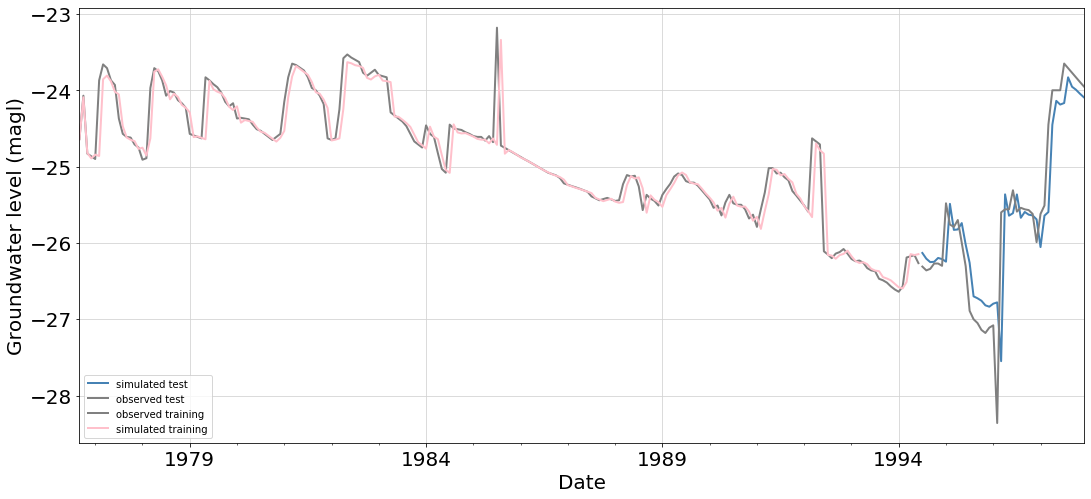

In [59]:
mse_lstm  = summary['mse_lstm'].mean(axis=0)
rmse_lstm = summary['rmse_lstm'].mean(axis=0)
mae_lstm  = summary['mae_lstm'].mean(axis=0)
r2_lstm   = summary['r2_lstm'].mean(axis=0)
stdv_lstm = stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_lstm, 3))
print("Mean squared error is:",round(mse_lstm,3))
print("Root mean squared error is:",round(rmse_lstm, 3))
print("Mean absolute error is:",round(mae_lstm,3))
print(round(stdv_lstm,3))



df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima.iloc[214:256].index)
df1['observed test']      = pima.iloc[214:256, 0].values

df2 = pd.DataFrame(pima.iloc[0:214, 0].values, columns = ['observed training'],index =pima.iloc[0:214].index)
df2['simulated training'] = train_inverse_trans[6].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [60]:
y_lstm = out_df['simulated test']

### GRU

In [61]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import GRU
from tensorflow.keras.optimizers import Adam

In [62]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_gru', 'rmse_gru', 'r2_gru','mae_gru'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    optimizer = Adam(lr=0.00001)
    model = Sequential()
    model.add(GRU(20, input_shape=(1, 6)))
    model.add(Dropout(0.1))

    model.add(Dense(1))

    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    history = model.fit(X_t_reshaped, 
                    y_train, 
                    validation_data=(X_val_reshaped, y_test),
                    epochs=1000, 
                    batch_size=96, 
                    verbose=1, callbacks=[check, early])
    X_val_reshaped = X_val_reshaped.reshape(42, 6)

    #running function
    gwl = -1.47143527
    test_forecast = X_test
    steps_ahead = 42
    y_gru = forecast(model, test_forecast, gwl, steps_ahead)
    y_gru = np.array(y_gru)
    
    #metrics for test
    y_gru = y_gru
    test_pred.append(y_gru)
    mse_gru = mean_squared_error(y_test, y_gru)
    rmse_gru = np.sqrt(mse_gru)
    r2_gru = r2_score(y_test, y_gru)
    mae_gru = mean_absolute_error(y_test, y_gru)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_gru,Round), round(rmse_gru,Round), round(r2_gru,Round),round(mae_gru,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(214, 6)
Train on 214 samples, validate on 42 samples
Epoch 1/1000
 96/214 [============>.................] - ETA: 2s - loss: 1.2337 - mean_squared_error: 1.2337
Epoch 00001: val_loss improved from inf to 2.39933, saving model to model.h5
214/214 [==============================] - 5s 22ms/sample - loss: 1.0231 - mean_squared_error: 1.0231 - val_loss: 2.3993 - val_mean_squared_error: 2.3993
Epoch 2/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.8836 - mean_squared_error: 0.8836
Epoch 00002: val_loss improved from 2.39933 to 2.30597, saving model to model.h5
214/214 [==============================] - 0s 246us/sample - loss: 0.8996 - mean_squared_error: 0.8996 - val_loss: 2.3060 - val_mean_squared_error: 2.3060
Epoch 3/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.6904 - mean_squared_error: 0.6904
Epoch 00003: val_loss improved from 2.30597 to 2.22873, saving model to model.h5
214/214 [==============================] - 0s 238us/sample 

Epoch 25/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.2917 - mean_squared_error: 0.2917
Epoch 00025: val_loss improved from 1.35994 to 1.33664, saving model to model.h5
214/214 [==============================] - 0s 191us/sample - loss: 0.2645 - mean_squared_error: 0.2645 - val_loss: 1.3366 - val_mean_squared_error: 1.3366
Epoch 26/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.2515 - mean_squared_error: 0.2515
Epoch 00026: val_loss improved from 1.33664 to 1.30958, saving model to model.h5
214/214 [==============================] - 0s 220us/sample - loss: 0.2486 - mean_squared_error: 0.2486 - val_loss: 1.3096 - val_mean_squared_error: 1.3096
Epoch 27/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1800 - mean_squared_error: 0.1800
Epoch 00027: val_loss improved from 1.30958 to 1.27407, saving model to model.h5
214/214 [==============================] - 0s 224us/sample - loss: 0.2480 - mean_squared_error: 0.2480 - val_loss: 1.274

Epoch 49/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1857 - mean_squared_error: 0.1857
Epoch 00049: val_loss improved from 0.90957 to 0.89448, saving model to model.h5
214/214 [==============================] - 0s 203us/sample - loss: 0.1532 - mean_squared_error: 0.1532 - val_loss: 0.8945 - val_mean_squared_error: 0.8945
Epoch 50/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1522 - mean_squared_error: 0.1522
Epoch 00050: val_loss improved from 0.89448 to 0.88350, saving model to model.h5
214/214 [==============================] - 0s 244us/sample - loss: 0.1508 - mean_squared_error: 0.1508 - val_loss: 0.8835 - val_mean_squared_error: 0.8835
Epoch 51/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1673 - mean_squared_error: 0.1673
Epoch 00051: val_loss improved from 0.88350 to 0.86971, saving model to model.h5
214/214 [==============================] - 0s 219us/sample - loss: 0.1385 - mean_squared_error: 0.1385 - val_loss: 0.869

Epoch 73/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0619 - mean_squared_error: 0.0619
Epoch 00073: val_loss improved from 0.63520 to 0.62579, saving model to model.h5
214/214 [==============================] - 0s 224us/sample - loss: 0.1039 - mean_squared_error: 0.1039 - val_loss: 0.6258 - val_mean_squared_error: 0.6258
Epoch 74/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0952 - mean_squared_error: 0.0952
Epoch 00074: val_loss improved from 0.62579 to 0.61371, saving model to model.h5
214/214 [==============================] - 0s 213us/sample - loss: 0.1073 - mean_squared_error: 0.1073 - val_loss: 0.6137 - val_mean_squared_error: 0.6137
Epoch 75/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0864 - mean_squared_error: 0.0864
Epoch 00075: val_loss improved from 0.61371 to 0.60445, saving model to model.h5
214/214 [==============================] - 0s 198us/sample - loss: 0.1011 - mean_squared_error: 0.1011 - val_loss: 0.604

Epoch 97/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0717 - mean_squared_error: 0.0717
Epoch 00097: val_loss improved from 0.47141 to 0.46599, saving model to model.h5
214/214 [==============================] - 0s 332us/sample - loss: 0.0813 - mean_squared_error: 0.0813 - val_loss: 0.4660 - val_mean_squared_error: 0.4660
Epoch 98/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0922 - mean_squared_error: 0.0922
Epoch 00098: val_loss improved from 0.46599 to 0.46174, saving model to model.h5
214/214 [==============================] - 0s 254us/sample - loss: 0.0879 - mean_squared_error: 0.0879 - val_loss: 0.4617 - val_mean_squared_error: 0.4617
Epoch 99/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0725 - mean_squared_error: 0.0725
Epoch 00099: val_loss improved from 0.46174 to 0.45454, saving model to model.h5
214/214 [==============================] - 0s 223us/sample - loss: 0.0834 - mean_squared_error: 0.0834 - val_loss: 0.454

Epoch 121/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1123 - mean_squared_error: 0.1123
Epoch 00121: val_loss improved from 0.39000 to 0.38842, saving model to model.h5
214/214 [==============================] - 0s 218us/sample - loss: 0.0878 - mean_squared_error: 0.0878 - val_loss: 0.3884 - val_mean_squared_error: 0.3884
Epoch 122/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0667 - mean_squared_error: 0.0667
Epoch 00122: val_loss improved from 0.38842 to 0.38597, saving model to model.h5
214/214 [==============================] - 0s 223us/sample - loss: 0.0860 - mean_squared_error: 0.0860 - val_loss: 0.3860 - val_mean_squared_error: 0.3860
Epoch 123/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0859 - mean_squared_error: 0.0859
Epoch 00123: val_loss improved from 0.38597 to 0.38570, saving model to model.h5
214/214 [==============================] - 0s 219us/sample - loss: 0.0811 - mean_squared_error: 0.0811 - val_loss: 0.

Epoch 146/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0475 - mean_squared_error: 0.0475
Epoch 00146: val_loss did not improve from 0.36450
214/214 [==============================] - 0s 115us/sample - loss: 0.0800 - mean_squared_error: 0.0800 - val_loss: 0.3654 - val_mean_squared_error: 0.3654
Epoch 147/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0880 - mean_squared_error: 0.0880
Epoch 00147: val_loss did not improve from 0.36450
214/214 [==============================] - 0s 125us/sample - loss: 0.0769 - mean_squared_error: 0.0769 - val_loss: 0.3659 - val_mean_squared_error: 0.3659
Epoch 148/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0914 - mean_squared_error: 0.0914
Epoch 00148: val_loss improved from 0.36450 to 0.36334, saving model to model.h5
214/214 [==============================] - 0s 231us/sample - loss: 0.0791 - mean_squared_error: 0.0791 - val_loss: 0.3633 - val_mean_squared_error: 0.3633
Epoch 149/1000
 96/214

Epoch 197/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0710 - mean_squared_error: 0.0710
Epoch 00197: val_loss did not improve from 0.35071
214/214 [==============================] - 0s 187us/sample - loss: 0.0811 - mean_squared_error: 0.0811 - val_loss: 0.3536 - val_mean_squared_error: 0.3536
Epoch 198/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0715 - mean_squared_error: 0.0715
Epoch 00198: val_loss did not improve from 0.35071
214/214 [==============================] - 0s 104us/sample - loss: 0.0735 - mean_squared_error: 0.0735 - val_loss: 0.3529 - val_mean_squared_error: 0.3529
Epoch 199/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0695 - mean_squared_error: 0.0695
Epoch 00199: val_loss improved from 0.35071 to 0.34890, saving model to model.h5
214/214 [==============================] - 0s 233us/sample - loss: 0.0745 - mean_squared_error: 0.0745 - val_loss: 0.3489 - val_mean_squared_error: 0.3489
Epoch 200/1000
 96/214

Epoch 223/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0812 - mean_squared_error: 0.0812
Epoch 00223: val_loss did not improve from 0.34843
214/214 [==============================] - 0s 165us/sample - loss: 0.0750 - mean_squared_error: 0.0750 - val_loss: 0.3550 - val_mean_squared_error: 0.3550
Epoch 224/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0409 - mean_squared_error: 0.0409
Epoch 00224: val_loss did not improve from 0.34843
214/214 [==============================] - 0s 142us/sample - loss: 0.0764 - mean_squared_error: 0.0764 - val_loss: 0.3533 - val_mean_squared_error: 0.3533
Epoch 225/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1063 - mean_squared_error: 0.1063
Epoch 00225: val_loss did not improve from 0.34843
214/214 [==============================] - 0s 138us/sample - loss: 0.0772 - mean_squared_error: 0.0772 - val_loss: 0.3530 - val_mean_squared_error: 0.3530
Epoch 226/1000
 96/214 [============>...............

Epoch 249/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0897 - mean_squared_error: 0.0897
Epoch 00249: val_loss did not improve from 0.34341
214/214 [==============================] - 0s 131us/sample - loss: 0.0737 - mean_squared_error: 0.0737 - val_loss: 0.3511 - val_mean_squared_error: 0.3511
Epoch 250/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1042 - mean_squared_error: 0.1042
Epoch 00250: val_loss did not improve from 0.34341
214/214 [==============================] - 0s 138us/sample - loss: 0.0705 - mean_squared_error: 0.0705 - val_loss: 0.3493 - val_mean_squared_error: 0.3493
Epoch 251/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0517 - mean_squared_error: 0.0517
Epoch 00251: val_loss did not improve from 0.34341
214/214 [==============================] - 0s 201us/sample - loss: 0.0753 - mean_squared_error: 0.0753 - val_loss: 0.3475 - val_mean_squared_error: 0.3475
Epoch 252/1000
 96/214 [============>...............

Epoch 275/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0509 - mean_squared_error: 0.0509
Epoch 00275: val_loss did not improve from 0.34341
214/214 [==============================] - 0s 168us/sample - loss: 0.0729 - mean_squared_error: 0.0729 - val_loss: 0.3467 - val_mean_squared_error: 0.3467
Epoch 276/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0878 - mean_squared_error: 0.0878
Epoch 00276: val_loss did not improve from 0.34341
214/214 [==============================] - 0s 143us/sample - loss: 0.0727 - mean_squared_error: 0.0727 - val_loss: 0.3485 - val_mean_squared_error: 0.3485
Epoch 277/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0663 - mean_squared_error: 0.0663
Epoch 00277: val_loss did not improve from 0.34341
214/214 [==============================] - 0s 141us/sample - loss: 0.0732 - mean_squared_error: 0.0732 - val_loss: 0.3513 - val_mean_squared_error: 0.3513
Epoch 278/1000
 96/214 [============>...............

Epoch 301/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0763 - mean_squared_error: 0.0763
Epoch 00301: val_loss did not improve from 0.34341
214/214 [==============================] - 0s 148us/sample - loss: 0.0704 - mean_squared_error: 0.0704 - val_loss: 0.3525 - val_mean_squared_error: 0.3525
Epoch 302/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0975 - mean_squared_error: 0.0975
Epoch 00302: val_loss did not improve from 0.34341
214/214 [==============================] - 0s 147us/sample - loss: 0.0761 - mean_squared_error: 0.0761 - val_loss: 0.3520 - val_mean_squared_error: 0.3520
Epoch 303/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0739 - mean_squared_error: 0.0739
Epoch 00303: val_loss did not improve from 0.34341
214/214 [==============================] - 0s 128us/sample - loss: 0.0693 - mean_squared_error: 0.0693 - val_loss: 0.3509 - val_mean_squared_error: 0.3509
Epoch 304/1000
 96/214 [============>...............

Epoch 327/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0511 - mean_squared_error: 0.0511
Epoch 00327: val_loss did not improve from 0.34341
214/214 [==============================] - 0s 187us/sample - loss: 0.0698 - mean_squared_error: 0.0698 - val_loss: 0.3567 - val_mean_squared_error: 0.3567
Epoch 328/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0833 - mean_squared_error: 0.0833
Epoch 00328: val_loss did not improve from 0.34341
214/214 [==============================] - 0s 161us/sample - loss: 0.0716 - mean_squared_error: 0.0716 - val_loss: 0.3582 - val_mean_squared_error: 0.3582
Epoch 329/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0792 - mean_squared_error: 0.0792
Epoch 00329: val_loss did not improve from 0.34341
214/214 [==============================] - 0s 150us/sample - loss: 0.0702 - mean_squared_error: 0.0702 - val_loss: 0.3575 - val_mean_squared_error: 0.3575
Epoch 330/1000
 96/214 [============>...............

Epoch 11/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.3828 - mean_squared_error: 0.3828
Epoch 00011: val_loss improved from 1.56658 to 1.51477, saving model to model.h5
214/214 [==============================] - 0s 188us/sample - loss: 0.3785 - mean_squared_error: 0.3785 - val_loss: 1.5148 - val_mean_squared_error: 1.5148
Epoch 12/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.4066 - mean_squared_error: 0.4066
Epoch 00012: val_loss improved from 1.51477 to 1.47481, saving model to model.h5
214/214 [==============================] - 0s 209us/sample - loss: 0.3489 - mean_squared_error: 0.3489 - val_loss: 1.4748 - val_mean_squared_error: 1.4748
Epoch 13/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.2998 - mean_squared_error: 0.2998
Epoch 00013: val_loss improved from 1.47481 to 1.44070, saving model to model.h5
214/214 [==============================] - 0s 218us/sample - loss: 0.3338 - mean_squared_error: 0.3338 - val_loss: 1.440

Epoch 35/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1473 - mean_squared_error: 0.1473
Epoch 00035: val_loss improved from 0.88219 to 0.86705, saving model to model.h5
214/214 [==============================] - 0s 282us/sample - loss: 0.1658 - mean_squared_error: 0.1658 - val_loss: 0.8671 - val_mean_squared_error: 0.8671
Epoch 36/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1443 - mean_squared_error: 0.1443
Epoch 00036: val_loss improved from 0.86705 to 0.85098, saving model to model.h5
214/214 [==============================] - 0s 210us/sample - loss: 0.1653 - mean_squared_error: 0.1653 - val_loss: 0.8510 - val_mean_squared_error: 0.8510
Epoch 37/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1623 - mean_squared_error: 0.1623
Epoch 00037: val_loss improved from 0.85098 to 0.83560, saving model to model.h5
214/214 [==============================] - 0s 200us/sample - loss: 0.1608 - mean_squared_error: 0.1608 - val_loss: 0.835

Epoch 59/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1556 - mean_squared_error: 0.1556
Epoch 00059: val_loss improved from 0.58525 to 0.58196, saving model to model.h5
214/214 [==============================] - 0s 221us/sample - loss: 0.1092 - mean_squared_error: 0.1092 - val_loss: 0.5820 - val_mean_squared_error: 0.5820
Epoch 60/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0912 - mean_squared_error: 0.0912
Epoch 00060: val_loss improved from 0.58196 to 0.57180, saving model to model.h5
214/214 [==============================] - 0s 226us/sample - loss: 0.1041 - mean_squared_error: 0.1041 - val_loss: 0.5718 - val_mean_squared_error: 0.5718
Epoch 61/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1218 - mean_squared_error: 0.1218
Epoch 00061: val_loss improved from 0.57180 to 0.56216, saving model to model.h5
214/214 [==============================] - 0s 206us/sample - loss: 0.1039 - mean_squared_error: 0.1039 - val_loss: 0.562

Epoch 83/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0983 - mean_squared_error: 0.0983
Epoch 00083: val_loss did not improve from 0.43911
214/214 [==============================] - 0s 122us/sample - loss: 0.0962 - mean_squared_error: 0.0962 - val_loss: 0.4409 - val_mean_squared_error: 0.4409
Epoch 84/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1113 - mean_squared_error: 0.1113
Epoch 00084: val_loss improved from 0.43911 to 0.43501, saving model to model.h5
214/214 [==============================] - 0s 288us/sample - loss: 0.0878 - mean_squared_error: 0.0878 - val_loss: 0.4350 - val_mean_squared_error: 0.4350
Epoch 85/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1086 - mean_squared_error: 0.1086
Epoch 00085: val_loss improved from 0.43501 to 0.42789, saving model to model.h5
214/214 [==============================] - 0s 293us/sample - loss: 0.0850 - mean_squared_error: 0.0850 - val_loss: 0.4279 - val_mean_squared_error: 0.

Epoch 108/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0731 - mean_squared_error: 0.0731
Epoch 00108: val_loss did not improve from 0.37971
214/214 [==============================] - 0s 124us/sample - loss: 0.0805 - mean_squared_error: 0.0805 - val_loss: 0.3824 - val_mean_squared_error: 0.3824
Epoch 109/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0703 - mean_squared_error: 0.0703
Epoch 00109: val_loss did not improve from 0.37971
214/214 [==============================] - 0s 108us/sample - loss: 0.0813 - mean_squared_error: 0.0813 - val_loss: 0.3799 - val_mean_squared_error: 0.3799
Epoch 110/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0568 - mean_squared_error: 0.0568
Epoch 00110: val_loss did not improve from 0.37971
214/214 [==============================] - 0s 115us/sample - loss: 0.0797 - mean_squared_error: 0.0797 - val_loss: 0.3833 - val_mean_squared_error: 0.3833
Epoch 111/1000
 96/214 [============>...............

Epoch 133/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0810 - mean_squared_error: 0.0810
Epoch 00133: val_loss did not improve from 0.36443
214/214 [==============================] - 0s 123us/sample - loss: 0.0779 - mean_squared_error: 0.0779 - val_loss: 0.3647 - val_mean_squared_error: 0.3647
Epoch 134/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1138 - mean_squared_error: 0.1138
Epoch 00134: val_loss improved from 0.36443 to 0.36402, saving model to model.h5
214/214 [==============================] - 0s 291us/sample - loss: 0.0845 - mean_squared_error: 0.0845 - val_loss: 0.3640 - val_mean_squared_error: 0.3640
Epoch 135/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1267 - mean_squared_error: 0.1267
Epoch 00135: val_loss improved from 0.36402 to 0.36161, saving model to model.h5
214/214 [==============================] - 0s 243us/sample - loss: 0.0821 - mean_squared_error: 0.0821 - val_loss: 0.3616 - val_mean_squared_error:

Epoch 158/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1059 - mean_squared_error: 0.1059
Epoch 00158: val_loss improved from 0.35207 to 0.35190, saving model to model.h5
214/214 [==============================] - 0s 211us/sample - loss: 0.0804 - mean_squared_error: 0.0804 - val_loss: 0.3519 - val_mean_squared_error: 0.3519
Epoch 159/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0602 - mean_squared_error: 0.0602
Epoch 00159: val_loss improved from 0.35190 to 0.35164, saving model to model.h5
214/214 [==============================] - 0s 267us/sample - loss: 0.0772 - mean_squared_error: 0.0772 - val_loss: 0.3516 - val_mean_squared_error: 0.3516
Epoch 160/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0508 - mean_squared_error: 0.0508
Epoch 00160: val_loss did not improve from 0.35164
214/214 [==============================] - 0s 133us/sample - loss: 0.0759 - mean_squared_error: 0.0759 - val_loss: 0.3536 - val_mean_squared_error:

Epoch 184/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0681 - mean_squared_error: 0.0681
Epoch 00184: val_loss did not improve from 0.35009
214/214 [==============================] - 0s 146us/sample - loss: 0.0804 - mean_squared_error: 0.0804 - val_loss: 0.3514 - val_mean_squared_error: 0.3514
Epoch 185/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0477 - mean_squared_error: 0.0477
Epoch 00185: val_loss did not improve from 0.35009
214/214 [==============================] - 0s 151us/sample - loss: 0.0715 - mean_squared_error: 0.0715 - val_loss: 0.3523 - val_mean_squared_error: 0.3523
Epoch 186/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0846 - mean_squared_error: 0.0846
Epoch 00186: val_loss did not improve from 0.35009
214/214 [==============================] - 0s 163us/sample - loss: 0.0779 - mean_squared_error: 0.0779 - val_loss: 0.3520 - val_mean_squared_error: 0.3520
Epoch 187/1000
 96/214 [============>...............

Epoch 210/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0508 - mean_squared_error: 0.0508
Epoch 00210: val_loss did not improve from 0.34957
214/214 [==============================] - 0s 112us/sample - loss: 0.0699 - mean_squared_error: 0.0699 - val_loss: 0.3496 - val_mean_squared_error: 0.3496
Epoch 211/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0603 - mean_squared_error: 0.0603
Epoch 00211: val_loss improved from 0.34957 to 0.34922, saving model to model.h5
214/214 [==============================] - 0s 220us/sample - loss: 0.0744 - mean_squared_error: 0.0744 - val_loss: 0.3492 - val_mean_squared_error: 0.3492
Epoch 212/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0619 - mean_squared_error: 0.0619
Epoch 00212: val_loss did not improve from 0.34922
214/214 [==============================] - 0s 121us/sample - loss: 0.0724 - mean_squared_error: 0.0724 - val_loss: 0.3515 - val_mean_squared_error: 0.3515
Epoch 213/1000
 96/214

Epoch 236/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0390 - mean_squared_error: 0.0390
Epoch 00236: val_loss did not improve from 0.34922
214/214 [==============================] - 0s 202us/sample - loss: 0.0742 - mean_squared_error: 0.0742 - val_loss: 0.3570 - val_mean_squared_error: 0.3570
Epoch 237/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1038 - mean_squared_error: 0.1038
Epoch 00237: val_loss did not improve from 0.34922
214/214 [==============================] - 0s 117us/sample - loss: 0.0771 - mean_squared_error: 0.0771 - val_loss: 0.3560 - val_mean_squared_error: 0.3560
Epoch 238/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0889 - mean_squared_error: 0.0889
Epoch 00238: val_loss did not improve from 0.34922
214/214 [==============================] - 0s 125us/sample - loss: 0.0733 - mean_squared_error: 0.0733 - val_loss: 0.3554 - val_mean_squared_error: 0.3554
Epoch 239/1000
 96/214 [============>...............

Epoch 262/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0444 - mean_squared_error: 0.0444
Epoch 00262: val_loss did not improve from 0.34922
214/214 [==============================] - 0s 189us/sample - loss: 0.0769 - mean_squared_error: 0.0769 - val_loss: 0.3545 - val_mean_squared_error: 0.3545
Epoch 263/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0705 - mean_squared_error: 0.0705
Epoch 00263: val_loss did not improve from 0.34922
214/214 [==============================] - 0s 125us/sample - loss: 0.0741 - mean_squared_error: 0.0741 - val_loss: 0.3551 - val_mean_squared_error: 0.3551
Epoch 264/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0797 - mean_squared_error: 0.0797
Epoch 00264: val_loss did not improve from 0.34922
214/214 [==============================] - 0s 114us/sample - loss: 0.0715 - mean_squared_error: 0.0715 - val_loss: 0.3553 - val_mean_squared_error: 0.3553
Epoch 265/1000
 96/214 [============>...............

Epoch 288/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0868 - mean_squared_error: 0.0868
Epoch 00288: val_loss did not improve from 0.34922
214/214 [==============================] - 0s 117us/sample - loss: 0.0693 - mean_squared_error: 0.0693 - val_loss: 0.3587 - val_mean_squared_error: 0.3587
Epoch 289/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1157 - mean_squared_error: 0.1157
Epoch 00289: val_loss did not improve from 0.34922
214/214 [==============================] - 0s 125us/sample - loss: 0.0764 - mean_squared_error: 0.0764 - val_loss: 0.3581 - val_mean_squared_error: 0.3581
Epoch 290/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0542 - mean_squared_error: 0.0542
Epoch 00290: val_loss did not improve from 0.34922
214/214 [==============================] - 0s 200us/sample - loss: 0.0753 - mean_squared_error: 0.0753 - val_loss: 0.3605 - val_mean_squared_error: 0.3605
Epoch 291/1000
 96/214 [============>...............

Epoch 3/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.6083 - mean_squared_error: 0.6083
Epoch 00003: val_loss improved from 2.03718 to 1.97801, saving model to model.h5
214/214 [==============================] - 0s 175us/sample - loss: 0.5847 - mean_squared_error: 0.5847 - val_loss: 1.9780 - val_mean_squared_error: 1.9780
Epoch 4/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.6232 - mean_squared_error: 0.6232
Epoch 00004: val_loss improved from 1.97801 to 1.91901, saving model to model.h5
214/214 [==============================] - 0s 194us/sample - loss: 0.5435 - mean_squared_error: 0.5435 - val_loss: 1.9190 - val_mean_squared_error: 1.9190
Epoch 5/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.5228 - mean_squared_error: 0.5228
Epoch 00005: val_loss improved from 1.91901 to 1.86393, saving model to model.h5
214/214 [==============================] - 0s 180us/sample - loss: 0.5124 - mean_squared_error: 0.5124 - val_loss: 1.8639 -

Epoch 27/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1282 - mean_squared_error: 0.1282
Epoch 00027: val_loss improved from 1.07405 to 1.05280, saving model to model.h5
214/214 [==============================] - 0s 201us/sample - loss: 0.2044 - mean_squared_error: 0.2044 - val_loss: 1.0528 - val_mean_squared_error: 1.0528
Epoch 28/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1983 - mean_squared_error: 0.1983
Epoch 00028: val_loss improved from 1.05280 to 1.04246, saving model to model.h5
214/214 [==============================] - 0s 221us/sample - loss: 0.2063 - mean_squared_error: 0.2063 - val_loss: 1.0425 - val_mean_squared_error: 1.0425
Epoch 29/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1963 - mean_squared_error: 0.1963
Epoch 00029: val_loss improved from 1.04246 to 1.02306, saving model to model.h5
214/214 [==============================] - 0s 186us/sample - loss: 0.2019 - mean_squared_error: 0.2019 - val_loss: 1.023

Epoch 51/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1351 - mean_squared_error: 0.1351
Epoch 00051: val_loss improved from 0.74184 to 0.73559, saving model to model.h5
214/214 [==============================] - 0s 172us/sample - loss: 0.1377 - mean_squared_error: 0.1377 - val_loss: 0.7356 - val_mean_squared_error: 0.7356
Epoch 52/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1534 - mean_squared_error: 0.1534
Epoch 00052: val_loss improved from 0.73559 to 0.72197, saving model to model.h5
214/214 [==============================] - 0s 191us/sample - loss: 0.1411 - mean_squared_error: 0.1411 - val_loss: 0.7220 - val_mean_squared_error: 0.7220
Epoch 53/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1579 - mean_squared_error: 0.1579
Epoch 00053: val_loss improved from 0.72197 to 0.69854, saving model to model.h5
214/214 [==============================] - 0s 241us/sample - loss: 0.1237 - mean_squared_error: 0.1237 - val_loss: 0.698

Epoch 75/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0957 - mean_squared_error: 0.0957
Epoch 00075: val_loss did not improve from 0.50968
214/214 [==============================] - 0s 129us/sample - loss: 0.1017 - mean_squared_error: 0.1017 - val_loss: 0.5134 - val_mean_squared_error: 0.5134
Epoch 76/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1041 - mean_squared_error: 0.1041
Epoch 00076: val_loss improved from 0.50968 to 0.50389, saving model to model.h5
214/214 [==============================] - 0s 231us/sample - loss: 0.0952 - mean_squared_error: 0.0952 - val_loss: 0.5039 - val_mean_squared_error: 0.5039
Epoch 77/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0977 - mean_squared_error: 0.0977
Epoch 00077: val_loss improved from 0.50389 to 0.50387, saving model to model.h5
214/214 [==============================] - 0s 221us/sample - loss: 0.0954 - mean_squared_error: 0.0954 - val_loss: 0.5039 - val_mean_squared_error: 0.

 96/214 [============>.................] - ETA: 0s - loss: 0.0819 - mean_squared_error: 0.0819
Epoch 00123: val_loss improved from 0.35868 to 0.35848, saving model to model.h5
214/214 [==============================] - 0s 252us/sample - loss: 0.0756 - mean_squared_error: 0.0756 - val_loss: 0.3585 - val_mean_squared_error: 0.3585
Epoch 124/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0912 - mean_squared_error: 0.0912
Epoch 00124: val_loss did not improve from 0.35848
214/214 [==============================] - 0s 116us/sample - loss: 0.0779 - mean_squared_error: 0.0779 - val_loss: 0.3594 - val_mean_squared_error: 0.3594
Epoch 125/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0763 - mean_squared_error: 0.0763
Epoch 00125: val_loss improved from 0.35848 to 0.35760, saving model to model.h5
214/214 [==============================] - 0s 239us/sample - loss: 0.0793 - mean_squared_error: 0.0793 - val_loss: 0.3576 - val_mean_squared_error: 0.3576
Epoch 1

Epoch 148/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0917 - mean_squared_error: 0.0917
Epoch 00148: val_loss did not improve from 0.35022
214/214 [==============================] - 0s 179us/sample - loss: 0.0739 - mean_squared_error: 0.0739 - val_loss: 0.3512 - val_mean_squared_error: 0.3512
Epoch 149/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0705 - mean_squared_error: 0.0705
Epoch 00149: val_loss did not improve from 0.35022
214/214 [==============================] - 0s 122us/sample - loss: 0.0767 - mean_squared_error: 0.0767 - val_loss: 0.3503 - val_mean_squared_error: 0.3503
Epoch 150/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1072 - mean_squared_error: 0.1072
Epoch 00150: val_loss improved from 0.35022 to 0.34961, saving model to model.h5
214/214 [==============================] - 0s 237us/sample - loss: 0.0804 - mean_squared_error: 0.0804 - val_loss: 0.3496 - val_mean_squared_error: 0.3496
Epoch 151/1000
 96/214

Epoch 174/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0785 - mean_squared_error: 0.0785
Epoch 00174: val_loss did not improve from 0.34957
214/214 [==============================] - 0s 126us/sample - loss: 0.0717 - mean_squared_error: 0.0717 - val_loss: 0.3526 - val_mean_squared_error: 0.3526
Epoch 175/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0578 - mean_squared_error: 0.0578
Epoch 00175: val_loss did not improve from 0.34957
214/214 [==============================] - 0s 120us/sample - loss: 0.0750 - mean_squared_error: 0.0750 - val_loss: 0.3503 - val_mean_squared_error: 0.3503
Epoch 176/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0788 - mean_squared_error: 0.0788
Epoch 00176: val_loss did not improve from 0.34957
214/214 [==============================] - 0s 116us/sample - loss: 0.0836 - mean_squared_error: 0.0836 - val_loss: 0.3498 - val_mean_squared_error: 0.3498
Epoch 177/1000
 96/214 [============>...............

Epoch 200/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0763 - mean_squared_error: 0.0763
Epoch 00200: val_loss did not improve from 0.34846
214/214 [==============================] - 0s 154us/sample - loss: 0.0681 - mean_squared_error: 0.0681 - val_loss: 0.3523 - val_mean_squared_error: 0.3523
Epoch 201/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0674 - mean_squared_error: 0.0674
Epoch 00201: val_loss did not improve from 0.34846
214/214 [==============================] - 0s 145us/sample - loss: 0.0757 - mean_squared_error: 0.0757 - val_loss: 0.3536 - val_mean_squared_error: 0.3536
Epoch 202/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0733 - mean_squared_error: 0.0733
Epoch 00202: val_loss did not improve from 0.34846
214/214 [==============================] - 0s 143us/sample - loss: 0.0751 - mean_squared_error: 0.0751 - val_loss: 0.3527 - val_mean_squared_error: 0.3527
Epoch 203/1000
 96/214 [============>...............

Epoch 226/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0632 - mean_squared_error: 0.0632
Epoch 00226: val_loss did not improve from 0.34846
214/214 [==============================] - 0s 138us/sample - loss: 0.0732 - mean_squared_error: 0.0732 - val_loss: 0.3547 - val_mean_squared_error: 0.3547
Epoch 227/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0417 - mean_squared_error: 0.0417
Epoch 00227: val_loss did not improve from 0.34846
214/214 [==============================] - 0s 127us/sample - loss: 0.0665 - mean_squared_error: 0.0665 - val_loss: 0.3527 - val_mean_squared_error: 0.3527
Epoch 228/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0877 - mean_squared_error: 0.0877
Epoch 00228: val_loss did not improve from 0.34846
214/214 [==============================] - 0s 117us/sample - loss: 0.0757 - mean_squared_error: 0.0757 - val_loss: 0.3539 - val_mean_squared_error: 0.3539
Epoch 229/1000
 96/214 [============>...............

Epoch 252/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0725 - mean_squared_error: 0.0725
Epoch 00252: val_loss did not improve from 0.34846
214/214 [==============================] - 0s 218us/sample - loss: 0.0733 - mean_squared_error: 0.0733 - val_loss: 0.3563 - val_mean_squared_error: 0.3563
Epoch 253/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0726 - mean_squared_error: 0.0726
Epoch 00253: val_loss did not improve from 0.34846
214/214 [==============================] - 0s 143us/sample - loss: 0.0739 - mean_squared_error: 0.0739 - val_loss: 0.3588 - val_mean_squared_error: 0.3588
Epoch 254/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0477 - mean_squared_error: 0.0477
Epoch 00254: val_loss did not improve from 0.34846
214/214 [==============================] - 0s 138us/sample - loss: 0.0673 - mean_squared_error: 0.0673 - val_loss: 0.3594 - val_mean_squared_error: 0.3594
Epoch 255/1000
 96/214 [============>...............

Epoch 278/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0754 - mean_squared_error: 0.0754
Epoch 00278: val_loss did not improve from 0.34846
214/214 [==============================] - 0s 129us/sample - loss: 0.0687 - mean_squared_error: 0.0687 - val_loss: 0.3625 - val_mean_squared_error: 0.3625
Epoch 279/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1002 - mean_squared_error: 0.1002
Epoch 00279: val_loss did not improve from 0.34846
214/214 [==============================] - 0s 110us/sample - loss: 0.0705 - mean_squared_error: 0.0705 - val_loss: 0.3612 - val_mean_squared_error: 0.3612
Epoch 280/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0966 - mean_squared_error: 0.0966
Epoch 00280: val_loss did not improve from 0.34846
214/214 [==============================] - 0s 173us/sample - loss: 0.0726 - mean_squared_error: 0.0726 - val_loss: 0.3610 - val_mean_squared_error: 0.3610
Epoch 281/1000
 96/214 [============>...............

Epoch 43/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1169 - mean_squared_error: 0.1169
Epoch 00043: val_loss improved from 0.71058 to 0.68725, saving model to model.h5
214/214 [==============================] - 0s 249us/sample - loss: 0.1398 - mean_squared_error: 0.1398 - val_loss: 0.6873 - val_mean_squared_error: 0.6873
Epoch 44/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1250 - mean_squared_error: 0.1250
Epoch 00044: val_loss improved from 0.68725 to 0.68036, saving model to model.h5
214/214 [==============================] - 0s 231us/sample - loss: 0.1257 - mean_squared_error: 0.1257 - val_loss: 0.6804 - val_mean_squared_error: 0.6804
Epoch 45/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1368 - mean_squared_error: 0.1368
Epoch 00045: val_loss improved from 0.68036 to 0.66154, saving model to model.h5
214/214 [==============================] - 0s 196us/sample - loss: 0.1235 - mean_squared_error: 0.1235 - val_loss: 0.661

Epoch 67/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0624 - mean_squared_error: 0.0624
Epoch 00067: val_loss did not improve from 0.47363
214/214 [==============================] - 0s 152us/sample - loss: 0.0917 - mean_squared_error: 0.0917 - val_loss: 0.4755 - val_mean_squared_error: 0.4755
Epoch 68/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1078 - mean_squared_error: 0.1078
Epoch 00068: val_loss improved from 0.47363 to 0.46877, saving model to model.h5
214/214 [==============================] - 0s 256us/sample - loss: 0.0885 - mean_squared_error: 0.0885 - val_loss: 0.4688 - val_mean_squared_error: 0.4688
Epoch 69/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0978 - mean_squared_error: 0.0978
Epoch 00069: val_loss improved from 0.46877 to 0.45909, saving model to model.h5
214/214 [==============================] - 0s 233us/sample - loss: 0.1031 - mean_squared_error: 0.1031 - val_loss: 0.4591 - val_mean_squared_error: 0.

Epoch 91/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0811 - mean_squared_error: 0.0811
Epoch 00091: val_loss improved from 0.39127 to 0.38607, saving model to model.h5
214/214 [==============================] - 0s 242us/sample - loss: 0.0844 - mean_squared_error: 0.0844 - val_loss: 0.3861 - val_mean_squared_error: 0.3861
Epoch 92/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1194 - mean_squared_error: 0.1194
Epoch 00092: val_loss improved from 0.38607 to 0.37944, saving model to model.h5
214/214 [==============================] - 0s 268us/sample - loss: 0.0922 - mean_squared_error: 0.0922 - val_loss: 0.3794 - val_mean_squared_error: 0.3794
Epoch 93/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0580 - mean_squared_error: 0.0580
Epoch 00093: val_loss improved from 0.37944 to 0.37737, saving model to model.h5
214/214 [==============================] - 0s 213us/sample - loss: 0.0863 - mean_squared_error: 0.0863 - val_loss: 0.377

Epoch 140/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0833 - mean_squared_error: 0.0833
Epoch 00140: val_loss did not improve from 0.34378
214/214 [==============================] - 0s 128us/sample - loss: 0.0793 - mean_squared_error: 0.0793 - val_loss: 0.3444 - val_mean_squared_error: 0.3444
Epoch 141/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0771 - mean_squared_error: 0.0771
Epoch 00141: val_loss improved from 0.34378 to 0.34300, saving model to model.h5
214/214 [==============================] - 0s 253us/sample - loss: 0.0834 - mean_squared_error: 0.0834 - val_loss: 0.3430 - val_mean_squared_error: 0.3430
Epoch 142/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1023 - mean_squared_error: 0.1023
Epoch 00142: val_loss did not improve from 0.34300
214/214 [==============================] - 0s 131us/sample - loss: 0.0758 - mean_squared_error: 0.0758 - val_loss: 0.3440 - val_mean_squared_error: 0.3440
Epoch 143/1000
 96/214

Epoch 166/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1205 - mean_squared_error: 0.1205
Epoch 00166: val_loss did not improve from 0.34061
214/214 [==============================] - 0s 143us/sample - loss: 0.0839 - mean_squared_error: 0.0839 - val_loss: 0.3467 - val_mean_squared_error: 0.3467
Epoch 167/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0808 - mean_squared_error: 0.0808
Epoch 00167: val_loss did not improve from 0.34061
214/214 [==============================] - 0s 131us/sample - loss: 0.0826 - mean_squared_error: 0.0826 - val_loss: 0.3440 - val_mean_squared_error: 0.3440
Epoch 168/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0883 - mean_squared_error: 0.0883
Epoch 00168: val_loss did not improve from 0.34061
214/214 [==============================] - 0s 135us/sample - loss: 0.0810 - mean_squared_error: 0.0810 - val_loss: 0.3442 - val_mean_squared_error: 0.3442
Epoch 169/1000
 96/214 [============>...............

Epoch 217/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0689 - mean_squared_error: 0.0689
Epoch 00217: val_loss did not improve from 0.33556
214/214 [==============================] - 0s 141us/sample - loss: 0.0736 - mean_squared_error: 0.0736 - val_loss: 0.3394 - val_mean_squared_error: 0.3394
Epoch 218/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0994 - mean_squared_error: 0.0994
Epoch 00218: val_loss did not improve from 0.33556
214/214 [==============================] - 0s 142us/sample - loss: 0.0762 - mean_squared_error: 0.0762 - val_loss: 0.3398 - val_mean_squared_error: 0.3398
Epoch 219/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1209 - mean_squared_error: 0.1209
Epoch 00219: val_loss did not improve from 0.33556
214/214 [==============================] - 0s 141us/sample - loss: 0.0746 - mean_squared_error: 0.0746 - val_loss: 0.3394 - val_mean_squared_error: 0.3394
Epoch 220/1000
 96/214 [============>...............

Epoch 243/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0478 - mean_squared_error: 0.0478
Epoch 00243: val_loss did not improve from 0.33556
214/214 [==============================] - 0s 157us/sample - loss: 0.0756 - mean_squared_error: 0.0756 - val_loss: 0.3473 - val_mean_squared_error: 0.3473
Epoch 244/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0646 - mean_squared_error: 0.0646
Epoch 00244: val_loss did not improve from 0.33556
214/214 [==============================] - 0s 127us/sample - loss: 0.0680 - mean_squared_error: 0.0680 - val_loss: 0.3486 - val_mean_squared_error: 0.3486
Epoch 245/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0896 - mean_squared_error: 0.0896
Epoch 00245: val_loss did not improve from 0.33556
214/214 [==============================] - 0s 194us/sample - loss: 0.0701 - mean_squared_error: 0.0701 - val_loss: 0.3490 - val_mean_squared_error: 0.3490
Epoch 246/1000
 96/214 [============>...............

Epoch 269/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0787 - mean_squared_error: 0.0787
Epoch 00269: val_loss did not improve from 0.33556
214/214 [==============================] - 0s 141us/sample - loss: 0.0731 - mean_squared_error: 0.0731 - val_loss: 0.3478 - val_mean_squared_error: 0.3478
Epoch 270/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0416 - mean_squared_error: 0.0416
Epoch 00270: val_loss did not improve from 0.33556
214/214 [==============================] - 0s 118us/sample - loss: 0.0681 - mean_squared_error: 0.0681 - val_loss: 0.3464 - val_mean_squared_error: 0.3464
Epoch 271/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0387 - mean_squared_error: 0.0387
Epoch 00271: val_loss did not improve from 0.33556
214/214 [==============================] - 0s 125us/sample - loss: 0.0732 - mean_squared_error: 0.0732 - val_loss: 0.3473 - val_mean_squared_error: 0.3473
Epoch 272/1000
 96/214 [============>...............

Epoch 31/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.2133 - mean_squared_error: 0.2133
Epoch 00031: val_loss improved from 1.02931 to 1.00931, saving model to model.h5
214/214 [==============================] - 0s 220us/sample - loss: 0.1828 - mean_squared_error: 0.1828 - val_loss: 1.0093 - val_mean_squared_error: 1.0093
Epoch 32/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.2233 - mean_squared_error: 0.2233
Epoch 00032: val_loss improved from 1.00931 to 0.99300, saving model to model.h5
214/214 [==============================] - 0s 217us/sample - loss: 0.1793 - mean_squared_error: 0.1793 - val_loss: 0.9930 - val_mean_squared_error: 0.9930
Epoch 33/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1598 - mean_squared_error: 0.1598
Epoch 00033: val_loss improved from 0.99300 to 0.97784, saving model to model.h5
214/214 [==============================] - 0s 204us/sample - loss: 0.1715 - mean_squared_error: 0.1715 - val_loss: 0.977

Epoch 55/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1179 - mean_squared_error: 0.1179
Epoch 00055: val_loss improved from 0.68250 to 0.67349, saving model to model.h5
214/214 [==============================] - 0s 215us/sample - loss: 0.1211 - mean_squared_error: 0.1211 - val_loss: 0.6735 - val_mean_squared_error: 0.6735
Epoch 56/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0796 - mean_squared_error: 0.0796
Epoch 00056: val_loss improved from 0.67349 to 0.66341, saving model to model.h5
214/214 [==============================] - 0s 228us/sample - loss: 0.1187 - mean_squared_error: 0.1187 - val_loss: 0.6634 - val_mean_squared_error: 0.6634
Epoch 57/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0982 - mean_squared_error: 0.0982
Epoch 00057: val_loss improved from 0.66341 to 0.65705, saving model to model.h5
214/214 [==============================] - 0s 230us/sample - loss: 0.1175 - mean_squared_error: 0.1175 - val_loss: 0.657

Epoch 79/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0765 - mean_squared_error: 0.0765
Epoch 00079: val_loss improved from 0.46097 to 0.45624, saving model to model.h5
214/214 [==============================] - 0s 339us/sample - loss: 0.0859 - mean_squared_error: 0.0859 - val_loss: 0.4562 - val_mean_squared_error: 0.4562
Epoch 80/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0768 - mean_squared_error: 0.0768
Epoch 00080: val_loss improved from 0.45624 to 0.44498, saving model to model.h5
214/214 [==============================] - 0s 321us/sample - loss: 0.0902 - mean_squared_error: 0.0902 - val_loss: 0.4450 - val_mean_squared_error: 0.4450
Epoch 81/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0944 - mean_squared_error: 0.0944
Epoch 00081: val_loss improved from 0.44498 to 0.43772, saving model to model.h5
214/214 [==============================] - 0s 220us/sample - loss: 0.0843 - mean_squared_error: 0.0843 - val_loss: 0.437

Epoch 103/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1038 - mean_squared_error: 0.1038
Epoch 00103: val_loss improved from 0.37365 to 0.37041, saving model to model.h5
214/214 [==============================] - 0s 224us/sample - loss: 0.0762 - mean_squared_error: 0.0762 - val_loss: 0.3704 - val_mean_squared_error: 0.3704
Epoch 104/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0891 - mean_squared_error: 0.0891
Epoch 00104: val_loss improved from 0.37041 to 0.36842, saving model to model.h5
214/214 [==============================] - 0s 205us/sample - loss: 0.0759 - mean_squared_error: 0.0759 - val_loss: 0.3684 - val_mean_squared_error: 0.3684
Epoch 105/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0486 - mean_squared_error: 0.0486
Epoch 00105: val_loss improved from 0.36842 to 0.36530, saving model to model.h5
214/214 [==============================] - 0s 225us/sample - loss: 0.0763 - mean_squared_error: 0.0763 - val_loss: 0.

214/214 [==============================] - 0s 234us/sample - loss: 0.0736 - mean_squared_error: 0.0736 - val_loss: 0.3481 - val_mean_squared_error: 0.3481
Epoch 128/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0809 - mean_squared_error: 0.0809
Epoch 00128: val_loss improved from 0.34812 to 0.34806, saving model to model.h5
214/214 [==============================] - 0s 288us/sample - loss: 0.0701 - mean_squared_error: 0.0701 - val_loss: 0.3481 - val_mean_squared_error: 0.3481
Epoch 129/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0821 - mean_squared_error: 0.0821
Epoch 00129: val_loss improved from 0.34806 to 0.34698, saving model to model.h5
214/214 [==============================] - 0s 369us/sample - loss: 0.0743 - mean_squared_error: 0.0743 - val_loss: 0.3470 - val_mean_squared_error: 0.3470
Epoch 130/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0594 - mean_squared_error: 0.0594
Epoch 00130: val_loss did not improve from 

Epoch 178/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0617 - mean_squared_error: 0.0617
Epoch 00178: val_loss did not improve from 0.33772
214/214 [==============================] - 0s 143us/sample - loss: 0.0719 - mean_squared_error: 0.0719 - val_loss: 0.3402 - val_mean_squared_error: 0.3402
Epoch 179/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0591 - mean_squared_error: 0.0591
Epoch 00179: val_loss did not improve from 0.33772
214/214 [==============================] - 0s 132us/sample - loss: 0.0722 - mean_squared_error: 0.0722 - val_loss: 0.3432 - val_mean_squared_error: 0.3432
Epoch 180/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0444 - mean_squared_error: 0.0444
Epoch 00180: val_loss did not improve from 0.33772
214/214 [==============================] - 0s 126us/sample - loss: 0.0723 - mean_squared_error: 0.0723 - val_loss: 0.3453 - val_mean_squared_error: 0.3453
Epoch 181/1000
 96/214 [============>...............

Epoch 204/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0622 - mean_squared_error: 0.0622
Epoch 00204: val_loss did not improve from 0.33772
214/214 [==============================] - 0s 125us/sample - loss: 0.0731 - mean_squared_error: 0.0731 - val_loss: 0.3445 - val_mean_squared_error: 0.3445
Epoch 205/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0393 - mean_squared_error: 0.0393
Epoch 00205: val_loss did not improve from 0.33772
214/214 [==============================] - 0s 161us/sample - loss: 0.0695 - mean_squared_error: 0.0695 - val_loss: 0.3424 - val_mean_squared_error: 0.3424
Epoch 206/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0711 - mean_squared_error: 0.0711
Epoch 00206: val_loss did not improve from 0.33772
214/214 [==============================] - 0s 161us/sample - loss: 0.0664 - mean_squared_error: 0.0664 - val_loss: 0.3438 - val_mean_squared_error: 0.3438
Epoch 207/1000
 96/214 [============>...............

Epoch 230/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0446 - mean_squared_error: 0.0446
Epoch 00230: val_loss did not improve from 0.33772
214/214 [==============================] - 0s 125us/sample - loss: 0.0699 - mean_squared_error: 0.0699 - val_loss: 0.3512 - val_mean_squared_error: 0.3512
Epoch 231/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0639 - mean_squared_error: 0.0639
Epoch 00231: val_loss did not improve from 0.33772
214/214 [==============================] - 0s 118us/sample - loss: 0.0685 - mean_squared_error: 0.0685 - val_loss: 0.3522 - val_mean_squared_error: 0.3522
Epoch 232/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0410 - mean_squared_error: 0.0410
Epoch 00232: val_loss did not improve from 0.33772
214/214 [==============================] - 0s 123us/sample - loss: 0.0771 - mean_squared_error: 0.0771 - val_loss: 0.3530 - val_mean_squared_error: 0.3530
Epoch 233/1000
 96/214 [============>...............

Epoch 2/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.5593 - mean_squared_error: 0.5593
Epoch 00002: val_loss improved from 1.49352 to 1.42144, saving model to model.h5
214/214 [==============================] - 0s 184us/sample - loss: 0.5048 - mean_squared_error: 0.5048 - val_loss: 1.4214 - val_mean_squared_error: 1.4214
Epoch 3/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.4433 - mean_squared_error: 0.4433
Epoch 00003: val_loss improved from 1.42144 to 1.35328, saving model to model.h5
214/214 [==============================] - 0s 174us/sample - loss: 0.4460 - mean_squared_error: 0.4460 - val_loss: 1.3533 - val_mean_squared_error: 1.3533
Epoch 4/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.4506 - mean_squared_error: 0.4506
Epoch 00004: val_loss improved from 1.35328 to 1.28946, saving model to model.h5
214/214 [==============================] - 0s 185us/sample - loss: 0.4239 - mean_squared_error: 0.4239 - val_loss: 1.2895 -

Epoch 26/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1767 - mean_squared_error: 0.1767
Epoch 00026: val_loss improved from 0.75835 to 0.75136, saving model to model.h5
214/214 [==============================] - 0s 193us/sample - loss: 0.1595 - mean_squared_error: 0.1595 - val_loss: 0.7514 - val_mean_squared_error: 0.7514
Epoch 27/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1708 - mean_squared_error: 0.1708
Epoch 00027: val_loss improved from 0.75136 to 0.73833, saving model to model.h5
214/214 [==============================] - 0s 237us/sample - loss: 0.1527 - mean_squared_error: 0.1527 - val_loss: 0.7383 - val_mean_squared_error: 0.7383
Epoch 28/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1332 - mean_squared_error: 0.1332
Epoch 00028: val_loss improved from 0.73833 to 0.72269, saving model to model.h5
214/214 [==============================] - 0s 230us/sample - loss: 0.1487 - mean_squared_error: 0.1487 - val_loss: 0.722

Epoch 50/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1141 - mean_squared_error: 0.1141
Epoch 00050: val_loss improved from 0.52022 to 0.51509, saving model to model.h5
214/214 [==============================] - 0s 213us/sample - loss: 0.1087 - mean_squared_error: 0.1087 - val_loss: 0.5151 - val_mean_squared_error: 0.5151
Epoch 51/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1045 - mean_squared_error: 0.1045
Epoch 00051: val_loss improved from 0.51509 to 0.50108, saving model to model.h5
214/214 [==============================] - 0s 206us/sample - loss: 0.1062 - mean_squared_error: 0.1062 - val_loss: 0.5011 - val_mean_squared_error: 0.5011
Epoch 52/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0901 - mean_squared_error: 0.0901
Epoch 00052: val_loss improved from 0.50108 to 0.49239, saving model to model.h5
214/214 [==============================] - 0s 280us/sample - loss: 0.0971 - mean_squared_error: 0.0971 - val_loss: 0.492

Epoch 74/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0924 - mean_squared_error: 0.0924
Epoch 00074: val_loss improved from 0.39047 to 0.38741, saving model to model.h5
214/214 [==============================] - 0s 272us/sample - loss: 0.0835 - mean_squared_error: 0.0835 - val_loss: 0.3874 - val_mean_squared_error: 0.3874
Epoch 75/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0662 - mean_squared_error: 0.0662
Epoch 00075: val_loss did not improve from 0.38741
214/214 [==============================] - 0s 126us/sample - loss: 0.0911 - mean_squared_error: 0.0911 - val_loss: 0.3875 - val_mean_squared_error: 0.3875
Epoch 76/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0948 - mean_squared_error: 0.0948
Epoch 00076: val_loss did not improve from 0.38741
214/214 [==============================] - 0s 140us/sample - loss: 0.0838 - mean_squared_error: 0.0838 - val_loss: 0.3879 - val_mean_squared_error: 0.3879
Epoch 77/1000
 96/214 [==

 96/214 [============>.................] - ETA: 0s - loss: 0.0380 - mean_squared_error: 0.0380
Epoch 00123: val_loss did not improve from 0.33900
214/214 [==============================] - 0s 151us/sample - loss: 0.0762 - mean_squared_error: 0.0762 - val_loss: 0.3414 - val_mean_squared_error: 0.3414
Epoch 124/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0872 - mean_squared_error: 0.0872
Epoch 00124: val_loss did not improve from 0.33900
214/214 [==============================] - 0s 156us/sample - loss: 0.0776 - mean_squared_error: 0.0776 - val_loss: 0.3400 - val_mean_squared_error: 0.3400
Epoch 125/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0815 - mean_squared_error: 0.0815
Epoch 00125: val_loss improved from 0.33900 to 0.33811, saving model to model.h5
214/214 [==============================] - 0s 237us/sample - loss: 0.0806 - mean_squared_error: 0.0806 - val_loss: 0.3381 - val_mean_squared_error: 0.3381
Epoch 126/1000
 96/214 [============>

 96/214 [============>.................] - ETA: 0s - loss: 0.0773 - mean_squared_error: 0.0773
Epoch 00148: val_loss did not improve from 0.32854
214/214 [==============================] - 0s 122us/sample - loss: 0.0749 - mean_squared_error: 0.0749 - val_loss: 0.3296 - val_mean_squared_error: 0.3296
Epoch 149/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0991 - mean_squared_error: 0.0991
Epoch 00149: val_loss did not improve from 0.32854
214/214 [==============================] - 0s 129us/sample - loss: 0.0720 - mean_squared_error: 0.0720 - val_loss: 0.3303 - val_mean_squared_error: 0.3303
Epoch 150/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1118 - mean_squared_error: 0.1118
Epoch 00150: val_loss did not improve from 0.32854
214/214 [==============================] - 0s 139us/sample - loss: 0.0732 - mean_squared_error: 0.0732 - val_loss: 0.3303 - val_mean_squared_error: 0.3303
Epoch 151/1000
 96/214 [============>.................] - ETA: 0s -

Epoch 174/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0897 - mean_squared_error: 0.0897
Epoch 00174: val_loss did not improve from 0.32854
214/214 [==============================] - 0s 148us/sample - loss: 0.0809 - mean_squared_error: 0.0809 - val_loss: 0.3314 - val_mean_squared_error: 0.3314
Epoch 175/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0830 - mean_squared_error: 0.0830
Epoch 00175: val_loss did not improve from 0.32854
214/214 [==============================] - 0s 138us/sample - loss: 0.0683 - mean_squared_error: 0.0683 - val_loss: 0.3326 - val_mean_squared_error: 0.3326
Epoch 176/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0892 - mean_squared_error: 0.0892
Epoch 00176: val_loss did not improve from 0.32854
214/214 [==============================] - 0s 134us/sample - loss: 0.0704 - mean_squared_error: 0.0704 - val_loss: 0.3329 - val_mean_squared_error: 0.3329
Epoch 177/1000
 96/214 [============>...............

Epoch 200/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0935 - mean_squared_error: 0.0935
Epoch 00200: val_loss did not improve from 0.32854
214/214 [==============================] - 0s 138us/sample - loss: 0.0720 - mean_squared_error: 0.0720 - val_loss: 0.3437 - val_mean_squared_error: 0.3437
Epoch 201/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0799 - mean_squared_error: 0.0799
Epoch 00201: val_loss did not improve from 0.32854
214/214 [==============================] - 0s 169us/sample - loss: 0.0681 - mean_squared_error: 0.0681 - val_loss: 0.3432 - val_mean_squared_error: 0.3432
Epoch 202/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0586 - mean_squared_error: 0.0586
Epoch 00202: val_loss did not improve from 0.32854
214/214 [==============================] - 0s 161us/sample - loss: 0.0779 - mean_squared_error: 0.0779 - val_loss: 0.3414 - val_mean_squared_error: 0.3414
Epoch 203/1000
 96/214 [============>...............

Epoch 226/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0500 - mean_squared_error: 0.0500
Epoch 00226: val_loss did not improve from 0.32854
214/214 [==============================] - 0s 149us/sample - loss: 0.0709 - mean_squared_error: 0.0709 - val_loss: 0.3416 - val_mean_squared_error: 0.3416
Epoch 227/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0845 - mean_squared_error: 0.0845
Epoch 00227: val_loss did not improve from 0.32854
214/214 [==============================] - 0s 137us/sample - loss: 0.0737 - mean_squared_error: 0.0737 - val_loss: 0.3371 - val_mean_squared_error: 0.3371
Epoch 228/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0938 - mean_squared_error: 0.0938
Epoch 00228: val_loss did not improve from 0.32854
214/214 [==============================] - 0s 137us/sample - loss: 0.0776 - mean_squared_error: 0.0776 - val_loss: 0.3394 - val_mean_squared_error: 0.3394
Epoch 229/1000
 96/214 [============>...............

Epoch 5/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.3533 - mean_squared_error: 0.3533
Epoch 00005: val_loss improved from 1.64296 to 1.59085, saving model to model.h5
214/214 [==============================] - 0s 172us/sample - loss: 0.3980 - mean_squared_error: 0.3980 - val_loss: 1.5908 - val_mean_squared_error: 1.5908
Epoch 6/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.3412 - mean_squared_error: 0.3412
Epoch 00006: val_loss improved from 1.59085 to 1.54072, saving model to model.h5
214/214 [==============================] - 0s 173us/sample - loss: 0.3608 - mean_squared_error: 0.3608 - val_loss: 1.5407 - val_mean_squared_error: 1.5407
Epoch 7/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.3237 - mean_squared_error: 0.3237
Epoch 00007: val_loss improved from 1.54072 to 1.49575, saving model to model.h5
214/214 [==============================] - 0s 220us/sample - loss: 0.3407 - mean_squared_error: 0.3407 - val_loss: 1.4958 -

Epoch 29/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1894 - mean_squared_error: 0.1894
Epoch 00029: val_loss improved from 0.96744 to 0.95237, saving model to model.h5
214/214 [==============================] - 0s 201us/sample - loss: 0.1671 - mean_squared_error: 0.1671 - val_loss: 0.9524 - val_mean_squared_error: 0.9524
Epoch 30/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1802 - mean_squared_error: 0.1802
Epoch 00030: val_loss improved from 0.95237 to 0.92954, saving model to model.h5
214/214 [==============================] - 0s 213us/sample - loss: 0.1555 - mean_squared_error: 0.1555 - val_loss: 0.9295 - val_mean_squared_error: 0.9295
Epoch 31/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1473 - mean_squared_error: 0.1473
Epoch 00031: val_loss improved from 0.92954 to 0.91779, saving model to model.h5
214/214 [==============================] - 0s 223us/sample - loss: 0.1460 - mean_squared_error: 0.1460 - val_loss: 0.917

Epoch 53/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1062 - mean_squared_error: 0.1062
Epoch 00053: val_loss improved from 0.66433 to 0.64918, saving model to model.h5
214/214 [==============================] - 0s 268us/sample - loss: 0.1015 - mean_squared_error: 0.1015 - val_loss: 0.6492 - val_mean_squared_error: 0.6492
Epoch 54/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0947 - mean_squared_error: 0.0947
Epoch 00054: val_loss improved from 0.64918 to 0.64224, saving model to model.h5
214/214 [==============================] - 0s 211us/sample - loss: 0.1049 - mean_squared_error: 0.1049 - val_loss: 0.6422 - val_mean_squared_error: 0.6422
Epoch 55/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0964 - mean_squared_error: 0.0964
Epoch 00055: val_loss improved from 0.64224 to 0.63713, saving model to model.h5
214/214 [==============================] - 0s 215us/sample - loss: 0.0995 - mean_squared_error: 0.0995 - val_loss: 0.637

Epoch 77/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0780 - mean_squared_error: 0.0780
Epoch 00077: val_loss improved from 0.45909 to 0.45870, saving model to model.h5
214/214 [==============================] - 0s 230us/sample - loss: 0.0835 - mean_squared_error: 0.0835 - val_loss: 0.4587 - val_mean_squared_error: 0.4587
Epoch 78/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0632 - mean_squared_error: 0.0632
Epoch 00078: val_loss improved from 0.45870 to 0.45664, saving model to model.h5
214/214 [==============================] - 0s 206us/sample - loss: 0.0816 - mean_squared_error: 0.0816 - val_loss: 0.4566 - val_mean_squared_error: 0.4566
Epoch 79/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0566 - mean_squared_error: 0.0566
Epoch 00079: val_loss improved from 0.45664 to 0.45325, saving model to model.h5
214/214 [==============================] - 0s 219us/sample - loss: 0.0856 - mean_squared_error: 0.0856 - val_loss: 0.453

Epoch 126/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1054 - mean_squared_error: 0.1054
Epoch 00126: val_loss did not improve from 0.36778
214/214 [==============================] - 0s 123us/sample - loss: 0.0735 - mean_squared_error: 0.0735 - val_loss: 0.3726 - val_mean_squared_error: 0.3726
Epoch 127/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0586 - mean_squared_error: 0.0586
Epoch 00127: val_loss did not improve from 0.36778
214/214 [==============================] - 0s 120us/sample - loss: 0.0726 - mean_squared_error: 0.0726 - val_loss: 0.3712 - val_mean_squared_error: 0.3712
Epoch 128/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0673 - mean_squared_error: 0.0673
Epoch 00128: val_loss did not improve from 0.36778
214/214 [==============================] - 0s 122us/sample - loss: 0.0733 - mean_squared_error: 0.0733 - val_loss: 0.3722 - val_mean_squared_error: 0.3722
Epoch 129/1000
 96/214 [============>...............

Epoch 152/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0739 - mean_squared_error: 0.0739
Epoch 00152: val_loss did not improve from 0.36766
214/214 [==============================] - 0s 152us/sample - loss: 0.0700 - mean_squared_error: 0.0700 - val_loss: 0.3694 - val_mean_squared_error: 0.3694
Epoch 153/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1015 - mean_squared_error: 0.1015
Epoch 00153: val_loss did not improve from 0.36766
214/214 [==============================] - 0s 121us/sample - loss: 0.0770 - mean_squared_error: 0.0770 - val_loss: 0.3699 - val_mean_squared_error: 0.3699
Epoch 154/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0799 - mean_squared_error: 0.0799
Epoch 00154: val_loss did not improve from 0.36766
214/214 [==============================] - 0s 125us/sample - loss: 0.0688 - mean_squared_error: 0.0688 - val_loss: 0.3704 - val_mean_squared_error: 0.3704
Epoch 155/1000
 96/214 [============>...............

214/214 [==============================] - 0s 334us/sample - loss: 0.0722 - mean_squared_error: 0.0722 - val_loss: 0.3592 - val_mean_squared_error: 0.3592
Epoch 178/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0638 - mean_squared_error: 0.0638
Epoch 00178: val_loss did not improve from 0.35921
214/214 [==============================] - 0s 213us/sample - loss: 0.0717 - mean_squared_error: 0.0717 - val_loss: 0.3597 - val_mean_squared_error: 0.3597
Epoch 179/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0529 - mean_squared_error: 0.0529
Epoch 00179: val_loss did not improve from 0.35921
214/214 [==============================] - 0s 175us/sample - loss: 0.0744 - mean_squared_error: 0.0744 - val_loss: 0.3600 - val_mean_squared_error: 0.3600
Epoch 180/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0685 - mean_squared_error: 0.0685
Epoch 00180: val_loss did not improve from 0.35921
214/214 [==============================] - 0s 218us/

Epoch 204/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0570 - mean_squared_error: 0.0570
Epoch 00204: val_loss did not improve from 0.35921
214/214 [==============================] - 0s 153us/sample - loss: 0.0689 - mean_squared_error: 0.0689 - val_loss: 0.3697 - val_mean_squared_error: 0.3697
Epoch 205/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0680 - mean_squared_error: 0.0680
Epoch 00205: val_loss did not improve from 0.35921
214/214 [==============================] - 0s 130us/sample - loss: 0.0747 - mean_squared_error: 0.0747 - val_loss: 0.3722 - val_mean_squared_error: 0.3722
Epoch 206/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0518 - mean_squared_error: 0.0518
Epoch 00206: val_loss did not improve from 0.35921
214/214 [==============================] - 0s 245us/sample - loss: 0.0708 - mean_squared_error: 0.0708 - val_loss: 0.3742 - val_mean_squared_error: 0.3742
Epoch 207/1000
 96/214 [============>...............

Epoch 230/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0813 - mean_squared_error: 0.0813
Epoch 00230: val_loss did not improve from 0.35921
214/214 [==============================] - 0s 157us/sample - loss: 0.0744 - mean_squared_error: 0.0744 - val_loss: 0.3776 - val_mean_squared_error: 0.3776
Epoch 231/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0656 - mean_squared_error: 0.0656
Epoch 00231: val_loss did not improve from 0.35921
214/214 [==============================] - 0s 187us/sample - loss: 0.0704 - mean_squared_error: 0.0704 - val_loss: 0.3788 - val_mean_squared_error: 0.3788
Epoch 232/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0873 - mean_squared_error: 0.0873
Epoch 00232: val_loss did not improve from 0.35921
214/214 [==============================] - 0s 220us/sample - loss: 0.0725 - mean_squared_error: 0.0725 - val_loss: 0.3813 - val_mean_squared_error: 0.3813
Epoch 233/1000
 96/214 [============>...............

Epoch 256/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0393 - mean_squared_error: 0.0393
Epoch 00256: val_loss did not improve from 0.35921
214/214 [==============================] - 0s 187us/sample - loss: 0.0667 - mean_squared_error: 0.0667 - val_loss: 0.3845 - val_mean_squared_error: 0.3845
Epoch 257/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0641 - mean_squared_error: 0.0641
Epoch 00257: val_loss did not improve from 0.35921
214/214 [==============================] - 0s 143us/sample - loss: 0.0676 - mean_squared_error: 0.0676 - val_loss: 0.3847 - val_mean_squared_error: 0.3847
Epoch 258/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0831 - mean_squared_error: 0.0831
Epoch 00258: val_loss did not improve from 0.35921
214/214 [==============================] - 0s 136us/sample - loss: 0.0711 - mean_squared_error: 0.0711 - val_loss: 0.3866 - val_mean_squared_error: 0.3866
Epoch 259/1000
 96/214 [============>...............

Epoch 5/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.6049 - mean_squared_error: 0.6049
Epoch 00005: val_loss improved from 1.77471 to 1.71808, saving model to model.h5
214/214 [==============================] - 0s 292us/sample - loss: 0.5988 - mean_squared_error: 0.5988 - val_loss: 1.7181 - val_mean_squared_error: 1.7181
Epoch 6/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.5352 - mean_squared_error: 0.5352
Epoch 00006: val_loss improved from 1.71808 to 1.66994, saving model to model.h5
214/214 [==============================] - 0s 227us/sample - loss: 0.5636 - mean_squared_error: 0.5636 - val_loss: 1.6699 - val_mean_squared_error: 1.6699
Epoch 7/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.5383 - mean_squared_error: 0.5383
Epoch 00007: val_loss improved from 1.66994 to 1.62453, saving model to model.h5
214/214 [==============================] - 0s 209us/sample - loss: 0.5169 - mean_squared_error: 0.5169 - val_loss: 1.6245 -

Epoch 29/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1922 - mean_squared_error: 0.1922
Epoch 00029: val_loss improved from 0.92587 to 0.90497, saving model to model.h5
214/214 [==============================] - 0s 211us/sample - loss: 0.1798 - mean_squared_error: 0.1798 - val_loss: 0.9050 - val_mean_squared_error: 0.9050
Epoch 30/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1791 - mean_squared_error: 0.1791
Epoch 00030: val_loss improved from 0.90497 to 0.88154, saving model to model.h5
214/214 [==============================] - 0s 203us/sample - loss: 0.1793 - mean_squared_error: 0.1793 - val_loss: 0.8815 - val_mean_squared_error: 0.8815
Epoch 31/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1526 - mean_squared_error: 0.1526
Epoch 00031: val_loss improved from 0.88154 to 0.86195, saving model to model.h5
214/214 [==============================] - 0s 233us/sample - loss: 0.1702 - mean_squared_error: 0.1702 - val_loss: 0.861

Epoch 53/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1392 - mean_squared_error: 0.1392
Epoch 00053: val_loss improved from 0.62122 to 0.60909, saving model to model.h5
214/214 [==============================] - 0s 208us/sample - loss: 0.1152 - mean_squared_error: 0.1152 - val_loss: 0.6091 - val_mean_squared_error: 0.6091
Epoch 54/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1114 - mean_squared_error: 0.1114
Epoch 00054: val_loss improved from 0.60909 to 0.59724, saving model to model.h5
214/214 [==============================] - 0s 291us/sample - loss: 0.1098 - mean_squared_error: 0.1098 - val_loss: 0.5972 - val_mean_squared_error: 0.5972
Epoch 55/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0961 - mean_squared_error: 0.0961
Epoch 00055: val_loss improved from 0.59724 to 0.59669, saving model to model.h5
214/214 [==============================] - 0s 228us/sample - loss: 0.1094 - mean_squared_error: 0.1094 - val_loss: 0.596

Epoch 77/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1211 - mean_squared_error: 0.1211
Epoch 00077: val_loss improved from 0.45267 to 0.45118, saving model to model.h5
214/214 [==============================] - 0s 293us/sample - loss: 0.0972 - mean_squared_error: 0.0972 - val_loss: 0.4512 - val_mean_squared_error: 0.4512
Epoch 78/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1133 - mean_squared_error: 0.1133
Epoch 00078: val_loss improved from 0.45118 to 0.44980, saving model to model.h5
214/214 [==============================] - 0s 319us/sample - loss: 0.0907 - mean_squared_error: 0.0907 - val_loss: 0.4498 - val_mean_squared_error: 0.4498
Epoch 79/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0605 - mean_squared_error: 0.0605
Epoch 00079: val_loss improved from 0.44980 to 0.44535, saving model to model.h5
214/214 [==============================] - 0s 258us/sample - loss: 0.0858 - mean_squared_error: 0.0858 - val_loss: 0.445

Epoch 101/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0996 - mean_squared_error: 0.0996
Epoch 00101: val_loss improved from 0.37886 to 0.37638, saving model to model.h5
214/214 [==============================] - 0s 289us/sample - loss: 0.0833 - mean_squared_error: 0.0833 - val_loss: 0.3764 - val_mean_squared_error: 0.3764
Epoch 102/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0634 - mean_squared_error: 0.0634
Epoch 00102: val_loss did not improve from 0.37638
214/214 [==============================] - 0s 141us/sample - loss: 0.0791 - mean_squared_error: 0.0791 - val_loss: 0.3773 - val_mean_squared_error: 0.3773
Epoch 103/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0728 - mean_squared_error: 0.0728
Epoch 00103: val_loss improved from 0.37638 to 0.37546, saving model to model.h5
214/214 [==============================] - 0s 253us/sample - loss: 0.0775 - mean_squared_error: 0.0775 - val_loss: 0.3755 - val_mean_squared_error:

Epoch 126/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0409 - mean_squared_error: 0.0409
Epoch 00126: val_loss did not improve from 0.36059
214/214 [==============================] - 0s 140us/sample - loss: 0.0703 - mean_squared_error: 0.0703 - val_loss: 0.3610 - val_mean_squared_error: 0.3610
Epoch 127/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1117 - mean_squared_error: 0.1117
Epoch 00127: val_loss did not improve from 0.36059
214/214 [==============================] - 0s 197us/sample - loss: 0.0860 - mean_squared_error: 0.0860 - val_loss: 0.3648 - val_mean_squared_error: 0.3648
Epoch 128/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0801 - mean_squared_error: 0.0801
Epoch 00128: val_loss did not improve from 0.36059
214/214 [==============================] - 0s 113us/sample - loss: 0.0782 - mean_squared_error: 0.0782 - val_loss: 0.3606 - val_mean_squared_error: 0.3606
Epoch 129/1000
 96/214 [============>...............

Epoch 177/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0449 - mean_squared_error: 0.0449
Epoch 00177: val_loss did not improve from 0.34799
214/214 [==============================] - 0s 144us/sample - loss: 0.0689 - mean_squared_error: 0.0689 - val_loss: 0.3493 - val_mean_squared_error: 0.3493
Epoch 178/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0826 - mean_squared_error: 0.0826
Epoch 00178: val_loss did not improve from 0.34799
214/214 [==============================] - 0s 134us/sample - loss: 0.0723 - mean_squared_error: 0.0723 - val_loss: 0.3493 - val_mean_squared_error: 0.3493
Epoch 179/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0566 - mean_squared_error: 0.0566
Epoch 00179: val_loss did not improve from 0.34799
214/214 [==============================] - 0s 133us/sample - loss: 0.0788 - mean_squared_error: 0.0788 - val_loss: 0.3500 - val_mean_squared_error: 0.3500
Epoch 180/1000
 96/214 [============>...............

Epoch 203/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0437 - mean_squared_error: 0.0437
Epoch 00203: val_loss did not improve from 0.34772
214/214 [==============================] - 0s 176us/sample - loss: 0.0711 - mean_squared_error: 0.0711 - val_loss: 0.3561 - val_mean_squared_error: 0.3561
Epoch 204/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0838 - mean_squared_error: 0.0838
Epoch 00204: val_loss did not improve from 0.34772
214/214 [==============================] - 0s 248us/sample - loss: 0.0731 - mean_squared_error: 0.0731 - val_loss: 0.3547 - val_mean_squared_error: 0.3547
Epoch 205/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0757 - mean_squared_error: 0.0757
Epoch 00205: val_loss did not improve from 0.34772
214/214 [==============================] - 0s 219us/sample - loss: 0.0713 - mean_squared_error: 0.0713 - val_loss: 0.3567 - val_mean_squared_error: 0.3567
Epoch 206/1000
 96/214 [============>...............

Epoch 229/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1160 - mean_squared_error: 0.1160
Epoch 00229: val_loss did not improve from 0.34772
214/214 [==============================] - 0s 264us/sample - loss: 0.0746 - mean_squared_error: 0.0746 - val_loss: 0.3555 - val_mean_squared_error: 0.3555
Epoch 230/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0674 - mean_squared_error: 0.0674
Epoch 00230: val_loss did not improve from 0.34772
214/214 [==============================] - 0s 224us/sample - loss: 0.0738 - mean_squared_error: 0.0738 - val_loss: 0.3567 - val_mean_squared_error: 0.3567
Epoch 231/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0463 - mean_squared_error: 0.0463
Epoch 00231: val_loss did not improve from 0.34772
214/214 [==============================] - 0s 156us/sample - loss: 0.0737 - mean_squared_error: 0.0737 - val_loss: 0.3546 - val_mean_squared_error: 0.3546
Epoch 232/1000
 96/214 [============>...............

Epoch 255/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0521 - mean_squared_error: 0.0521
Epoch 00255: val_loss did not improve from 0.34772
214/214 [==============================] - 0s 178us/sample - loss: 0.0679 - mean_squared_error: 0.0679 - val_loss: 0.3621 - val_mean_squared_error: 0.3621
Epoch 256/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0648 - mean_squared_error: 0.0648
Epoch 00256: val_loss did not improve from 0.34772
214/214 [==============================] - 0s 197us/sample - loss: 0.0762 - mean_squared_error: 0.0762 - val_loss: 0.3588 - val_mean_squared_error: 0.3588
Epoch 257/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0642 - mean_squared_error: 0.0642
Epoch 00257: val_loss did not improve from 0.34772
214/214 [==============================] - 0s 226us/sample - loss: 0.0693 - mean_squared_error: 0.0693 - val_loss: 0.3577 - val_mean_squared_error: 0.3577
Epoch 258/1000
 96/214 [============>...............

Epoch 281/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0783 - mean_squared_error: 0.0783
Epoch 00281: val_loss did not improve from 0.34772
214/214 [==============================] - 0s 153us/sample - loss: 0.0706 - mean_squared_error: 0.0706 - val_loss: 0.3639 - val_mean_squared_error: 0.3639
Epoch 282/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0835 - mean_squared_error: 0.0835
Epoch 00282: val_loss did not improve from 0.34772
214/214 [==============================] - 0s 187us/sample - loss: 0.0723 - mean_squared_error: 0.0723 - val_loss: 0.3650 - val_mean_squared_error: 0.3650
Running fold 9
(214, 6)
Train on 214 samples, validate on 42 samples
Epoch 1/1000
 96/214 [============>.................] - ETA: 2s - loss: 1.3972 - mean_squared_error: 1.3972
Epoch 00001: val_loss improved from inf to 2.62088, saving model to model.h5
214/214 [==============================] - 6s 29ms/sample - loss: 1.3963 - mean_squared_error: 1.3963 - val_loss: 

Epoch 23/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.2518 - mean_squared_error: 0.2518
Epoch 00023: val_loss improved from 1.18256 to 1.13213, saving model to model.h5
214/214 [==============================] - 0s 194us/sample - loss: 0.2621 - mean_squared_error: 0.2621 - val_loss: 1.1321 - val_mean_squared_error: 1.1321
Epoch 24/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.2495 - mean_squared_error: 0.2495
Epoch 00024: val_loss improved from 1.13213 to 1.08887, saving model to model.h5
214/214 [==============================] - 0s 234us/sample - loss: 0.2404 - mean_squared_error: 0.2404 - val_loss: 1.0889 - val_mean_squared_error: 1.0889
Epoch 25/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.2306 - mean_squared_error: 0.2306
Epoch 00025: val_loss improved from 1.08887 to 1.03866, saving model to model.h5
214/214 [==============================] - 0s 201us/sample - loss: 0.2377 - mean_squared_error: 0.2377 - val_loss: 1.038

Epoch 47/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1047 - mean_squared_error: 0.1047
Epoch 00047: val_loss improved from 0.60088 to 0.58503, saving model to model.h5
214/214 [==============================] - 0s 208us/sample - loss: 0.1234 - mean_squared_error: 0.1234 - val_loss: 0.5850 - val_mean_squared_error: 0.5850
Epoch 48/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1305 - mean_squared_error: 0.1305
Epoch 00048: val_loss improved from 0.58503 to 0.57878, saving model to model.h5
214/214 [==============================] - 0s 243us/sample - loss: 0.1136 - mean_squared_error: 0.1136 - val_loss: 0.5788 - val_mean_squared_error: 0.5788
Epoch 49/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0970 - mean_squared_error: 0.0970
Epoch 00049: val_loss improved from 0.57878 to 0.56969, saving model to model.h5
214/214 [==============================] - 0s 200us/sample - loss: 0.1219 - mean_squared_error: 0.1219 - val_loss: 0.569

Epoch 96/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0914 - mean_squared_error: 0.0914
Epoch 00096: val_loss improved from 0.35266 to 0.35057, saving model to model.h5
214/214 [==============================] - 0s 245us/sample - loss: 0.0901 - mean_squared_error: 0.0901 - val_loss: 0.3506 - val_mean_squared_error: 0.3506
Epoch 97/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0589 - mean_squared_error: 0.0589
Epoch 00097: val_loss did not improve from 0.35057
214/214 [==============================] - 0s 137us/sample - loss: 0.0884 - mean_squared_error: 0.0884 - val_loss: 0.3533 - val_mean_squared_error: 0.3533
Epoch 98/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0757 - mean_squared_error: 0.0757
Epoch 00098: val_loss improved from 0.35057 to 0.34531, saving model to model.h5
214/214 [==============================] - 0s 251us/sample - loss: 0.0798 - mean_squared_error: 0.0798 - val_loss: 0.3453 - val_mean_squared_error: 0.

Epoch 121/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1011 - mean_squared_error: 0.1011
Epoch 00121: val_loss did not improve from 0.33503
214/214 [==============================] - 0s 156us/sample - loss: 0.0863 - mean_squared_error: 0.0863 - val_loss: 0.3360 - val_mean_squared_error: 0.3360
Epoch 122/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1066 - mean_squared_error: 0.1066
Epoch 00122: val_loss did not improve from 0.33503
214/214 [==============================] - 0s 146us/sample - loss: 0.0789 - mean_squared_error: 0.0789 - val_loss: 0.3371 - val_mean_squared_error: 0.3371
Epoch 123/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0677 - mean_squared_error: 0.0677
Epoch 00123: val_loss did not improve from 0.33503
214/214 [==============================] - 0s 135us/sample - loss: 0.0829 - mean_squared_error: 0.0829 - val_loss: 0.3374 - val_mean_squared_error: 0.3374
Epoch 124/1000
 96/214 [============>...............

Epoch 146/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0470 - mean_squared_error: 0.0470
Epoch 00146: val_loss did not improve from 0.32752
214/214 [==============================] - 0s 154us/sample - loss: 0.0792 - mean_squared_error: 0.0792 - val_loss: 0.3278 - val_mean_squared_error: 0.3278
Epoch 147/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0609 - mean_squared_error: 0.0609
Epoch 00147: val_loss did not improve from 0.32752
214/214 [==============================] - 0s 132us/sample - loss: 0.0764 - mean_squared_error: 0.0764 - val_loss: 0.3276 - val_mean_squared_error: 0.3276
Epoch 148/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0714 - mean_squared_error: 0.0714
Epoch 00148: val_loss improved from 0.32752 to 0.32678, saving model to model.h5
214/214 [==============================] - 0s 247us/sample - loss: 0.0805 - mean_squared_error: 0.0805 - val_loss: 0.3268 - val_mean_squared_error: 0.3268
Epoch 149/1000
 96/214

Epoch 172/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0826 - mean_squared_error: 0.0826
Epoch 00172: val_loss did not improve from 0.32310
214/214 [==============================] - 0s 151us/sample - loss: 0.0803 - mean_squared_error: 0.0803 - val_loss: 0.3247 - val_mean_squared_error: 0.3247
Epoch 173/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1070 - mean_squared_error: 0.1070
Epoch 00173: val_loss did not improve from 0.32310
214/214 [==============================] - 0s 133us/sample - loss: 0.0818 - mean_squared_error: 0.0818 - val_loss: 0.3255 - val_mean_squared_error: 0.3255
Epoch 174/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1163 - mean_squared_error: 0.1163
Epoch 00174: val_loss did not improve from 0.32310
214/214 [==============================] - 0s 194us/sample - loss: 0.0829 - mean_squared_error: 0.0829 - val_loss: 0.3254 - val_mean_squared_error: 0.3254
Epoch 175/1000
 96/214 [============>...............

Epoch 198/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1121 - mean_squared_error: 0.1121
Epoch 00198: val_loss did not improve from 0.32310
214/214 [==============================] - 0s 133us/sample - loss: 0.0812 - mean_squared_error: 0.0812 - val_loss: 0.3262 - val_mean_squared_error: 0.3262
Epoch 199/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0645 - mean_squared_error: 0.0645
Epoch 00199: val_loss did not improve from 0.32310
214/214 [==============================] - 0s 124us/sample - loss: 0.0757 - mean_squared_error: 0.0757 - val_loss: 0.3257 - val_mean_squared_error: 0.3257
Epoch 200/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0965 - mean_squared_error: 0.0965
Epoch 00200: val_loss did not improve from 0.32310
214/214 [==============================] - 0s 136us/sample - loss: 0.0727 - mean_squared_error: 0.0727 - val_loss: 0.3247 - val_mean_squared_error: 0.3247
Epoch 201/1000
 96/214 [============>...............

Epoch 224/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0713 - mean_squared_error: 0.0713
Epoch 00224: val_loss did not improve from 0.32310
214/214 [==============================] - 0s 170us/sample - loss: 0.0776 - mean_squared_error: 0.0776 - val_loss: 0.3277 - val_mean_squared_error: 0.3277
Epoch 225/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0631 - mean_squared_error: 0.0631
Epoch 00225: val_loss did not improve from 0.32310
214/214 [==============================] - 0s 163us/sample - loss: 0.0753 - mean_squared_error: 0.0753 - val_loss: 0.3256 - val_mean_squared_error: 0.3256
Epoch 226/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0635 - mean_squared_error: 0.0635
Epoch 00226: val_loss did not improve from 0.32310
214/214 [==============================] - 0s 140us/sample - loss: 0.0717 - mean_squared_error: 0.0717 - val_loss: 0.3250 - val_mean_squared_error: 0.3250
Epoch 227/1000
 96/214 [============>...............

Epoch 250/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0429 - mean_squared_error: 0.0429
Epoch 00250: val_loss did not improve from 0.32310
214/214 [==============================] - 0s 147us/sample - loss: 0.0720 - mean_squared_error: 0.0720 - val_loss: 0.3273 - val_mean_squared_error: 0.3273
Epoch 251/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0699 - mean_squared_error: 0.0699
Epoch 00251: val_loss did not improve from 0.32310
214/214 [==============================] - 0s 136us/sample - loss: 0.0750 - mean_squared_error: 0.0750 - val_loss: 0.3267 - val_mean_squared_error: 0.3267
Epoch 252/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0949 - mean_squared_error: 0.0949
Epoch 00252: val_loss did not improve from 0.32310
214/214 [==============================] - 0s 136us/sample - loss: 0.0755 - mean_squared_error: 0.0755 - val_loss: 0.3272 - val_mean_squared_error: 0.3272
Epoch 253/1000
 96/214 [============>...............

Epoch 43/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1580 - mean_squared_error: 0.1580
Epoch 00043: val_loss improved from 0.76929 to 0.76517, saving model to model.h5
214/214 [==============================] - 0s 286us/sample - loss: 0.1466 - mean_squared_error: 0.1466 - val_loss: 0.7652 - val_mean_squared_error: 0.7652
Epoch 44/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1426 - mean_squared_error: 0.1426
Epoch 00044: val_loss improved from 0.76517 to 0.74392, saving model to model.h5
214/214 [==============================] - 0s 214us/sample - loss: 0.1366 - mean_squared_error: 0.1366 - val_loss: 0.7439 - val_mean_squared_error: 0.7439
Epoch 45/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1181 - mean_squared_error: 0.1181
Epoch 00045: val_loss improved from 0.74392 to 0.73591, saving model to model.h5
214/214 [==============================] - 0s 260us/sample - loss: 0.1411 - mean_squared_error: 0.1411 - val_loss: 0.735

Epoch 67/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1082 - mean_squared_error: 0.1082
Epoch 00067: val_loss improved from 0.50653 to 0.49450, saving model to model.h5
214/214 [==============================] - 0s 242us/sample - loss: 0.0942 - mean_squared_error: 0.0942 - val_loss: 0.4945 - val_mean_squared_error: 0.4945
Epoch 68/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0777 - mean_squared_error: 0.0777
Epoch 00068: val_loss improved from 0.49450 to 0.48535, saving model to model.h5
214/214 [==============================] - 0s 245us/sample - loss: 0.0864 - mean_squared_error: 0.0864 - val_loss: 0.4853 - val_mean_squared_error: 0.4853
Epoch 69/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0681 - mean_squared_error: 0.0681
Epoch 00069: val_loss improved from 0.48535 to 0.47833, saving model to model.h5
214/214 [==============================] - 0s 281us/sample - loss: 0.0964 - mean_squared_error: 0.0964 - val_loss: 0.478

Epoch 91/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0783 - mean_squared_error: 0.0783
Epoch 00091: val_loss did not improve from 0.38271
214/214 [==============================] - 0s 152us/sample - loss: 0.0814 - mean_squared_error: 0.0814 - val_loss: 0.3861 - val_mean_squared_error: 0.3861
Epoch 92/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0338 - mean_squared_error: 0.0338
Epoch 00092: val_loss improved from 0.38271 to 0.38238, saving model to model.h5
214/214 [==============================] - 0s 264us/sample - loss: 0.0763 - mean_squared_error: 0.0763 - val_loss: 0.3824 - val_mean_squared_error: 0.3824
Epoch 93/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0978 - mean_squared_error: 0.0978
Epoch 00093: val_loss improved from 0.38238 to 0.38130, saving model to model.h5
214/214 [==============================] - 0s 297us/sample - loss: 0.0812 - mean_squared_error: 0.0812 - val_loss: 0.3813 - val_mean_squared_error: 0.

Epoch 140/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0994 - mean_squared_error: 0.0994
Epoch 00140: val_loss did not improve from 0.34000
214/214 [==============================] - 0s 198us/sample - loss: 0.0764 - mean_squared_error: 0.0764 - val_loss: 0.3445 - val_mean_squared_error: 0.3445
Epoch 141/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0804 - mean_squared_error: 0.0804
Epoch 00141: val_loss did not improve from 0.34000
214/214 [==============================] - 0s 142us/sample - loss: 0.0723 - mean_squared_error: 0.0723 - val_loss: 0.3449 - val_mean_squared_error: 0.3449
Epoch 142/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0815 - mean_squared_error: 0.0815
Epoch 00142: val_loss did not improve from 0.34000
214/214 [==============================] - 0s 161us/sample - loss: 0.0805 - mean_squared_error: 0.0805 - val_loss: 0.3446 - val_mean_squared_error: 0.3446
Epoch 143/1000
 96/214 [============>...............

Epoch 166/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0901 - mean_squared_error: 0.0901
Epoch 00166: val_loss did not improve from 0.34000
214/214 [==============================] - 0s 138us/sample - loss: 0.0696 - mean_squared_error: 0.0696 - val_loss: 0.3423 - val_mean_squared_error: 0.3423
Epoch 167/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0595 - mean_squared_error: 0.0595
Epoch 00167: val_loss did not improve from 0.34000
214/214 [==============================] - 0s 135us/sample - loss: 0.0700 - mean_squared_error: 0.0700 - val_loss: 0.3407 - val_mean_squared_error: 0.3407
Epoch 168/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0376 - mean_squared_error: 0.0376
Epoch 00168: val_loss did not improve from 0.34000
214/214 [==============================] - 0s 161us/sample - loss: 0.0665 - mean_squared_error: 0.0665 - val_loss: 0.3421 - val_mean_squared_error: 0.3421
Epoch 169/1000
 96/214 [============>...............

Epoch 192/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0749 - mean_squared_error: 0.0749
Epoch 00192: val_loss did not improve from 0.34000
214/214 [==============================] - 0s 149us/sample - loss: 0.0723 - mean_squared_error: 0.0723 - val_loss: 0.3473 - val_mean_squared_error: 0.3473
Epoch 193/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0720 - mean_squared_error: 0.0720
Epoch 00193: val_loss did not improve from 0.34000
214/214 [==============================] - 0s 149us/sample - loss: 0.0733 - mean_squared_error: 0.0733 - val_loss: 0.3472 - val_mean_squared_error: 0.3472
Epoch 194/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0627 - mean_squared_error: 0.0627
Epoch 00194: val_loss did not improve from 0.34000
214/214 [==============================] - 0s 126us/sample - loss: 0.0724 - mean_squared_error: 0.0724 - val_loss: 0.3485 - val_mean_squared_error: 0.3485
Epoch 195/1000
 96/214 [============>...............

Epoch 218/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0704 - mean_squared_error: 0.0704
Epoch 00218: val_loss did not improve from 0.34000
214/214 [==============================] - 0s 203us/sample - loss: 0.0722 - mean_squared_error: 0.0722 - val_loss: 0.3522 - val_mean_squared_error: 0.3522
Epoch 219/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0554 - mean_squared_error: 0.0554
Epoch 00219: val_loss did not improve from 0.34000
214/214 [==============================] - 0s 141us/sample - loss: 0.0715 - mean_squared_error: 0.0715 - val_loss: 0.3521 - val_mean_squared_error: 0.3521
Epoch 220/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0503 - mean_squared_error: 0.0503
Epoch 00220: val_loss did not improve from 0.34000
214/214 [==============================] - 0s 138us/sample - loss: 0.0716 - mean_squared_error: 0.0716 - val_loss: 0.3518 - val_mean_squared_error: 0.3518
Epoch 221/1000
 96/214 [============>...............

In [63]:
summary

Iteration_No  mse_gru  rmse_gru  r2_gru  mae_gru
0   Iteration_1    0.390     0.625   0.767    0.411
1   Iteration_2    0.400     0.633   0.761    0.401
2   Iteration_3    0.380     0.616   0.773    0.414
3   Iteration_4    0.431     0.656   0.742    0.414
4   Iteration_5    0.371     0.609   0.778    0.387
5   Iteration_6    0.393     0.627   0.765    0.399
6   Iteration_7    0.408     0.638   0.756    0.416
7   Iteration_8    0.376     0.613   0.775    0.401
8   Iteration_9    0.435     0.660   0.739    0.415
9  Iteration_10    0.400     0.633   0.760    0.394

In [64]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]

train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:214, 6].values

In [65]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]

test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[214:256, 6].values

In [66]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
a = a.iloc[:214]
a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))


#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
b = b.iloc[214:256]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.064
Root mean squared error is: 0.253
Mean absolute error is: 0.144
R^2 score is:  0.915

The model performance for the test set
--------------------------------------
R^2 score is:  0.762
Mean squared error is: 0.398
Root mean squared error is: 0.631
Mean absolute error is: 0.405


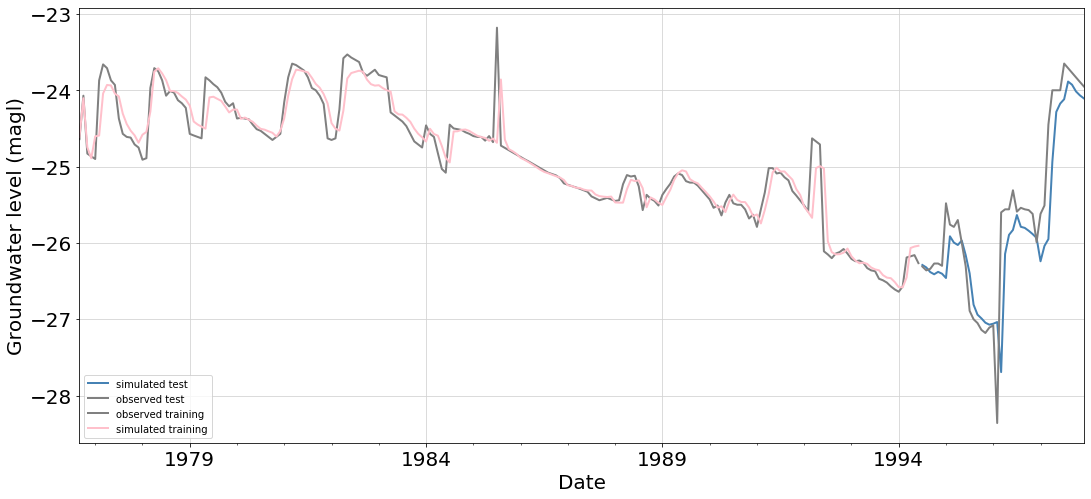

In [67]:
mse_gru = summary['mse_gru'].mean(axis=0)
rmse_gru= summary['rmse_gru'].mean(axis=0)
mae_gru = summary['mae_gru'].mean(axis=0)
r2_gru  = summary['r2_gru'].mean(axis=0)
stdv_gru= stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_gru, 3))
print("Mean squared error is:",round(mse_gru,3))
print("Root mean squared error is:",round(rmse_gru, 3))
print("Mean absolute error is:",round(mae_gru,3))


df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima.iloc[214:256].index)
df1['observed test']      = pima.iloc[214:256, 0].values

df2 = pd.DataFrame(pima.iloc[0:214, 0].values, columns = ['observed training'],index =pima.iloc[0:214].index)
df2['simulated training'] = train_inverse_trans[6].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [68]:
y_gru = out_df['simulated test']

### FFNN

In [69]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_ff', 'rmse_ff', 'r2_ff','mae_ff'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    # Add fully connected layer with a ReLU activation function
    model.add(Dense(units=32, activation='relu', input_shape=(1,6)))

    # Add fully connected layer with a ReLU activation function
    model.add(Dense(units=32, activation='relu'))

    # Add fully connected layer with no activation function
    model.add(Dense(units=1))
    #model.add(Flatten())

    # Compile neural network
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


    history = model.fit(X_t_reshaped, 
                    y_train, 
                    validation_data=(X_val_reshaped, y_test),
                    epochs=1000, 
                    batch_size=96, 
                    verbose=1, callbacks=[check, early])
    
    X_val_reshaped = X_val_reshaped.reshape(42, 6)

    #running function
    gwl = -1.47143527
    test_forecast = X_test
    steps_ahead = 42
    y_pred = forecast(model, test_forecast, gwl, steps_ahead)
    y_pred = np.array(y_pred)
    
    #metrics for test
    y_ff = y_pred
    test_pred.append(y_ff)
    mse_ff = mean_squared_error(y_test, y_ff)
    rmse_ff = np.sqrt(mse_ff)
    r2_ff = r2_score(y_test, y_ff)
    mae_ff = mean_absolute_error(y_test, y_ff)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_ff,Round), round(rmse_ff,Round), round(r2_ff,Round),round(mae_ff,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')  

Running fold 1
(214, 6)
Train on 214 samples, validate on 42 samples
Epoch 1/1000
 96/214 [============>.................] - ETA: 3s - loss: 1.0190 - mean_squared_error: 1.0190
Epoch 00001: val_loss improved from inf to 2.78745, saving model to model.h5
214/214 [==============================] - 9s 42ms/sample - loss: 0.9242 - mean_squared_error: 0.9242 - val_loss: 2.7875 - val_mean_squared_error: 2.7875
Epoch 2/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.6202 - mean_squared_error: 0.6202
Epoch 00002: val_loss improved from 2.78745 to 2.48975, saving model to model.h5
214/214 [==============================] - 0s 390us/sample - loss: 0.7333 - mean_squared_error: 0.7333 - val_loss: 2.4898 - val_mean_squared_error: 2.4898
Epoch 3/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.5833 - mean_squared_error: 0.5833
Epoch 00003: val_loss improved from 2.48975 to 2.23445, saving model to model.h5
214/214 [==============================] - 0s 337us/sample 

Epoch 25/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0817 - mean_squared_error: 0.0817
Epoch 00025: val_loss improved from 0.39018 to 0.37977, saving model to model.h5
214/214 [==============================] - 0s 365us/sample - loss: 0.0752 - mean_squared_error: 0.0752 - val_loss: 0.3798 - val_mean_squared_error: 0.3798
Epoch 26/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0870 - mean_squared_error: 0.0870
Epoch 00026: val_loss improved from 0.37977 to 0.37701, saving model to model.h5
214/214 [==============================] - 0s 358us/sample - loss: 0.0794 - mean_squared_error: 0.0794 - val_loss: 0.3770 - val_mean_squared_error: 0.3770
Epoch 27/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1009 - mean_squared_error: 0.1009
Epoch 00027: val_loss did not improve from 0.37701
214/214 [==============================] - 0s 138us/sample - loss: 0.0765 - mean_squared_error: 0.0765 - val_loss: 0.3771 - val_mean_squared_error: 0.

Epoch 76/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0392 - mean_squared_error: 0.0392
Epoch 00076: val_loss did not improve from 0.33461
214/214 [==============================] - 0s 149us/sample - loss: 0.0700 - mean_squared_error: 0.0700 - val_loss: 0.3378 - val_mean_squared_error: 0.3378
Epoch 77/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0580 - mean_squared_error: 0.0580
Epoch 00077: val_loss did not improve from 0.33461
214/214 [==============================] - 0s 233us/sample - loss: 0.0675 - mean_squared_error: 0.0675 - val_loss: 0.3396 - val_mean_squared_error: 0.3396
Epoch 78/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0993 - mean_squared_error: 0.0993
Epoch 00078: val_loss did not improve from 0.33461
214/214 [==============================] - 0s 157us/sample - loss: 0.0714 - mean_squared_error: 0.0714 - val_loss: 0.3428 - val_mean_squared_error: 0.3428
Epoch 79/1000
 96/214 [============>.................] 

Epoch 102/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0712 - mean_squared_error: 0.0712
Epoch 00102: val_loss did not improve from 0.33443
214/214 [==============================] - 0s 182us/sample - loss: 0.0739 - mean_squared_error: 0.0739 - val_loss: 0.3403 - val_mean_squared_error: 0.3403
Epoch 103/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0919 - mean_squared_error: 0.0919
Epoch 00103: val_loss did not improve from 0.33443
214/214 [==============================] - 0s 137us/sample - loss: 0.0675 - mean_squared_error: 0.0675 - val_loss: 0.3418 - val_mean_squared_error: 0.3418
Epoch 104/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0762 - mean_squared_error: 0.0762
Epoch 00104: val_loss improved from 0.33443 to 0.33410, saving model to model.h5
214/214 [==============================] - 0s 352us/sample - loss: 0.0652 - mean_squared_error: 0.0652 - val_loss: 0.3341 - val_mean_squared_error: 0.3341
Epoch 105/1000
 96/214

Epoch 128/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0360 - mean_squared_error: 0.0360
Epoch 00128: val_loss did not improve from 0.33410
214/214 [==============================] - 0s 152us/sample - loss: 0.0721 - mean_squared_error: 0.0721 - val_loss: 0.3362 - val_mean_squared_error: 0.3362
Epoch 129/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0785 - mean_squared_error: 0.0785
Epoch 00129: val_loss did not improve from 0.33410
214/214 [==============================] - 0s 191us/sample - loss: 0.0646 - mean_squared_error: 0.0646 - val_loss: 0.3492 - val_mean_squared_error: 0.3492
Epoch 130/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0716 - mean_squared_error: 0.0716
Epoch 00130: val_loss did not improve from 0.33410
214/214 [==============================] - 0s 165us/sample - loss: 0.0705 - mean_squared_error: 0.0705 - val_loss: 0.3415 - val_mean_squared_error: 0.3415
Epoch 131/1000
 96/214 [============>...............

Epoch 154/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0593 - mean_squared_error: 0.0593
Epoch 00154: val_loss did not improve from 0.33410
214/214 [==============================] - 0s 142us/sample - loss: 0.0680 - mean_squared_error: 0.0680 - val_loss: 0.3514 - val_mean_squared_error: 0.3514
Epoch 155/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0572 - mean_squared_error: 0.0572
Epoch 00155: val_loss did not improve from 0.33410
214/214 [==============================] - 0s 161us/sample - loss: 0.0711 - mean_squared_error: 0.0711 - val_loss: 0.3516 - val_mean_squared_error: 0.3516
Epoch 156/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0550 - mean_squared_error: 0.0550
Epoch 00156: val_loss did not improve from 0.33410
214/214 [==============================] - 0s 161us/sample - loss: 0.0683 - mean_squared_error: 0.0683 - val_loss: 0.3595 - val_mean_squared_error: 0.3595
Epoch 157/1000
 96/214 [============>...............

Epoch 180/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0833 - mean_squared_error: 0.0833
Epoch 00180: val_loss did not improve from 0.33410
214/214 [==============================] - 0s 143us/sample - loss: 0.0663 - mean_squared_error: 0.0663 - val_loss: 0.3435 - val_mean_squared_error: 0.3435
Epoch 181/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0848 - mean_squared_error: 0.0848
Epoch 00181: val_loss did not improve from 0.33410
214/214 [==============================] - 0s 162us/sample - loss: 0.0658 - mean_squared_error: 0.0658 - val_loss: 0.3414 - val_mean_squared_error: 0.3414
Epoch 182/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0537 - mean_squared_error: 0.0537
Epoch 00182: val_loss did not improve from 0.33410
214/214 [==============================] - 0s 138us/sample - loss: 0.0639 - mean_squared_error: 0.0639 - val_loss: 0.3448 - val_mean_squared_error: 0.3448
Epoch 183/1000
 96/214 [============>...............

Epoch 2/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.7183 - mean_squared_error: 0.7183
Epoch 00002: val_loss improved from 2.27136 to 2.08569, saving model to model.h5
214/214 [==============================] - 0s 364us/sample - loss: 0.6522 - mean_squared_error: 0.6522 - val_loss: 2.0857 - val_mean_squared_error: 2.0857
Epoch 3/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.5768 - mean_squared_error: 0.5768
Epoch 00003: val_loss improved from 2.08569 to 1.92569, saving model to model.h5
214/214 [==============================] - 0s 333us/sample - loss: 0.5243 - mean_squared_error: 0.5243 - val_loss: 1.9257 - val_mean_squared_error: 1.9257
Epoch 4/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.5398 - mean_squared_error: 0.5398
Epoch 00004: val_loss improved from 1.92569 to 1.80148, saving model to model.h5
214/214 [==============================] - 0s 327us/sample - loss: 0.4176 - mean_squared_error: 0.4176 - val_loss: 1.8015 -

Epoch 52/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0625 - mean_squared_error: 0.0625
Epoch 00052: val_loss did not improve from 0.33478
214/214 [==============================] - 0s 233us/sample - loss: 0.0622 - mean_squared_error: 0.0622 - val_loss: 0.3822 - val_mean_squared_error: 0.3822
Epoch 53/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0877 - mean_squared_error: 0.0877
Epoch 00053: val_loss did not improve from 0.33478
214/214 [==============================] - 0s 215us/sample - loss: 0.0706 - mean_squared_error: 0.0706 - val_loss: 0.3511 - val_mean_squared_error: 0.3511
Epoch 54/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0569 - mean_squared_error: 0.0569
Epoch 00054: val_loss did not improve from 0.33478
214/214 [==============================] - 0s 179us/sample - loss: 0.0701 - mean_squared_error: 0.0701 - val_loss: 0.3540 - val_mean_squared_error: 0.3540
Epoch 55/1000
 96/214 [============>.................] 

Epoch 104/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0967 - mean_squared_error: 0.0967
Epoch 00104: val_loss did not improve from 0.33262
214/214 [==============================] - 0s 171us/sample - loss: 0.0664 - mean_squared_error: 0.0664 - val_loss: 0.3455 - val_mean_squared_error: 0.3455
Epoch 105/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0974 - mean_squared_error: 0.0974
Epoch 00105: val_loss did not improve from 0.33262
214/214 [==============================] - 0s 236us/sample - loss: 0.0614 - mean_squared_error: 0.0614 - val_loss: 0.3897 - val_mean_squared_error: 0.3897
Epoch 106/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0597 - mean_squared_error: 0.0597
Epoch 00106: val_loss did not improve from 0.33262
214/214 [==============================] - 0s 161us/sample - loss: 0.0639 - mean_squared_error: 0.0639 - val_loss: 0.3412 - val_mean_squared_error: 0.3412
Epoch 107/1000
 96/214 [============>...............

Epoch 130/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0739 - mean_squared_error: 0.0739
Epoch 00130: val_loss did not improve from 0.33262
214/214 [==============================] - 0s 173us/sample - loss: 0.0636 - mean_squared_error: 0.0636 - val_loss: 0.3643 - val_mean_squared_error: 0.3643
Epoch 131/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0816 - mean_squared_error: 0.0816
Epoch 00131: val_loss did not improve from 0.33262
214/214 [==============================] - 0s 236us/sample - loss: 0.0642 - mean_squared_error: 0.0642 - val_loss: 0.3647 - val_mean_squared_error: 0.3647
Epoch 132/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0744 - mean_squared_error: 0.0744
Epoch 00132: val_loss did not improve from 0.33262
214/214 [==============================] - 0s 245us/sample - loss: 0.0635 - mean_squared_error: 0.0635 - val_loss: 0.3467 - val_mean_squared_error: 0.3467
Epoch 133/1000
 96/214 [============>...............

Epoch 156/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0736 - mean_squared_error: 0.0736
Epoch 00156: val_loss did not improve from 0.33262
214/214 [==============================] - 0s 166us/sample - loss: 0.0711 - mean_squared_error: 0.0711 - val_loss: 0.3712 - val_mean_squared_error: 0.3712
Epoch 157/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0499 - mean_squared_error: 0.0499
Epoch 00157: val_loss did not improve from 0.33262
214/214 [==============================] - 0s 207us/sample - loss: 0.0671 - mean_squared_error: 0.0671 - val_loss: 0.3545 - val_mean_squared_error: 0.3545
Epoch 158/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0854 - mean_squared_error: 0.0854
Epoch 00158: val_loss did not improve from 0.33262
214/214 [==============================] - 0s 167us/sample - loss: 0.0661 - mean_squared_error: 0.0661 - val_loss: 0.3547 - val_mean_squared_error: 0.3547
Epoch 159/1000
 96/214 [============>...............

Epoch 2/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.3055 - mean_squared_error: 0.3055
Epoch 00002: val_loss improved from 1.40919 to 0.99822, saving model to model.h5
214/214 [==============================] - 0s 421us/sample - loss: 0.2773 - mean_squared_error: 0.2773 - val_loss: 0.9982 - val_mean_squared_error: 0.9982
Epoch 3/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1424 - mean_squared_error: 0.1424
Epoch 00003: val_loss improved from 0.99822 to 0.62754, saving model to model.h5
214/214 [==============================] - 0s 385us/sample - loss: 0.1656 - mean_squared_error: 0.1656 - val_loss: 0.6275 - val_mean_squared_error: 0.6275
Epoch 4/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1139 - mean_squared_error: 0.1139
Epoch 00004: val_loss improved from 0.62754 to 0.51661, saving model to model.h5
214/214 [==============================] - 0s 440us/sample - loss: 0.0988 - mean_squared_error: 0.0988 - val_loss: 0.5166 -

Epoch 53/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0639 - mean_squared_error: 0.0639
Epoch 00053: val_loss did not improve from 0.33881
214/214 [==============================] - 0s 166us/sample - loss: 0.0671 - mean_squared_error: 0.0671 - val_loss: 0.3931 - val_mean_squared_error: 0.3931
Epoch 54/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0780 - mean_squared_error: 0.0780
Epoch 00054: val_loss did not improve from 0.33881
214/214 [==============================] - 0s 171us/sample - loss: 0.0694 - mean_squared_error: 0.0694 - val_loss: 0.3791 - val_mean_squared_error: 0.3791
Epoch 55/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0719 - mean_squared_error: 0.0719
Epoch 00055: val_loss did not improve from 0.33881
214/214 [==============================] - 0s 188us/sample - loss: 0.0703 - mean_squared_error: 0.0703 - val_loss: 0.3650 - val_mean_squared_error: 0.3650
Epoch 56/1000
 96/214 [============>.................] 

 96/214 [============>.................] - ETA: 0s - loss: 0.0429 - mean_squared_error: 0.0429
Epoch 00079: val_loss did not improve from 0.33881
214/214 [==============================] - 0s 185us/sample - loss: 0.0617 - mean_squared_error: 0.0617 - val_loss: 0.3421 - val_mean_squared_error: 0.3421
Epoch 80/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0814 - mean_squared_error: 0.0814
Epoch 00080: val_loss did not improve from 0.33881
214/214 [==============================] - 0s 188us/sample - loss: 0.0672 - mean_squared_error: 0.0672 - val_loss: 0.3650 - val_mean_squared_error: 0.3650
Epoch 81/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0599 - mean_squared_error: 0.0599
Epoch 00081: val_loss did not improve from 0.33881
214/214 [==============================] - 0s 180us/sample - loss: 0.0667 - mean_squared_error: 0.0667 - val_loss: 0.3530 - val_mean_squared_error: 0.3530
Epoch 82/1000
 96/214 [============>.................] - ETA: 0s - lo

Epoch 105/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0750 - mean_squared_error: 0.0750
Epoch 00105: val_loss did not improve from 0.33749
214/214 [==============================] - 0s 173us/sample - loss: 0.0665 - mean_squared_error: 0.0665 - val_loss: 0.3563 - val_mean_squared_error: 0.3563
Epoch 106/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0624 - mean_squared_error: 0.0624
Epoch 00106: val_loss did not improve from 0.33749
214/214 [==============================] - 0s 226us/sample - loss: 0.0636 - mean_squared_error: 0.0636 - val_loss: 0.3765 - val_mean_squared_error: 0.3765
Epoch 107/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0957 - mean_squared_error: 0.0957
Epoch 00107: val_loss did not improve from 0.33749
214/214 [==============================] - 0s 173us/sample - loss: 0.0642 - mean_squared_error: 0.0642 - val_loss: 0.3645 - val_mean_squared_error: 0.3645
Epoch 108/1000
 96/214 [============>...............

Epoch 131/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0937 - mean_squared_error: 0.0937
Epoch 00131: val_loss did not improve from 0.33749
214/214 [==============================] - 0s 265us/sample - loss: 0.0647 - mean_squared_error: 0.0647 - val_loss: 0.3603 - val_mean_squared_error: 0.3603
Epoch 132/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0408 - mean_squared_error: 0.0408
Epoch 00132: val_loss did not improve from 0.33749
214/214 [==============================] - 0s 359us/sample - loss: 0.0634 - mean_squared_error: 0.0634 - val_loss: 0.3546 - val_mean_squared_error: 0.3546
Epoch 133/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0913 - mean_squared_error: 0.0913
Epoch 00133: val_loss did not improve from 0.33749
214/214 [==============================] - 0s 183us/sample - loss: 0.0676 - mean_squared_error: 0.0676 - val_loss: 0.3395 - val_mean_squared_error: 0.3395
Epoch 134/1000
 96/214 [============>...............

Epoch 157/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1175 - mean_squared_error: 0.1175
Epoch 00157: val_loss did not improve from 0.33736
214/214 [==============================] - 0s 208us/sample - loss: 0.0687 - mean_squared_error: 0.0687 - val_loss: 0.3674 - val_mean_squared_error: 0.3674
Epoch 158/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0638 - mean_squared_error: 0.0638
Epoch 00158: val_loss did not improve from 0.33736
214/214 [==============================] - 0s 216us/sample - loss: 0.0594 - mean_squared_error: 0.0594 - val_loss: 0.3794 - val_mean_squared_error: 0.3794
Epoch 159/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0909 - mean_squared_error: 0.0909
Epoch 00159: val_loss did not improve from 0.33736
214/214 [==============================] - 0s 216us/sample - loss: 0.0683 - mean_squared_error: 0.0683 - val_loss: 0.3662 - val_mean_squared_error: 0.3662
Epoch 160/1000
 96/214 [============>...............

Epoch 183/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0754 - mean_squared_error: 0.0754
Epoch 00183: val_loss did not improve from 0.33540
214/214 [==============================] - 0s 192us/sample - loss: 0.0604 - mean_squared_error: 0.0604 - val_loss: 0.3809 - val_mean_squared_error: 0.3809
Epoch 184/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0939 - mean_squared_error: 0.0939
Epoch 00184: val_loss did not improve from 0.33540
214/214 [==============================] - 0s 212us/sample - loss: 0.0649 - mean_squared_error: 0.0649 - val_loss: 0.3537 - val_mean_squared_error: 0.3537
Epoch 185/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0815 - mean_squared_error: 0.0815
Epoch 00185: val_loss did not improve from 0.33540
214/214 [==============================] - 0s 214us/sample - loss: 0.0661 - mean_squared_error: 0.0661 - val_loss: 0.3596 - val_mean_squared_error: 0.3596
Epoch 186/1000
 96/214 [============>...............

Epoch 209/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0651 - mean_squared_error: 0.0651
Epoch 00209: val_loss did not improve from 0.33540
214/214 [==============================] - 0s 199us/sample - loss: 0.0647 - mean_squared_error: 0.0647 - val_loss: 0.3688 - val_mean_squared_error: 0.3688
Epoch 210/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0865 - mean_squared_error: 0.0865
Epoch 00210: val_loss did not improve from 0.33540
214/214 [==============================] - 0s 186us/sample - loss: 0.0648 - mean_squared_error: 0.0648 - val_loss: 0.3748 - val_mean_squared_error: 0.3748
Epoch 211/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0445 - mean_squared_error: 0.0445
Epoch 00211: val_loss did not improve from 0.33540
214/214 [==============================] - 0s 195us/sample - loss: 0.0594 - mean_squared_error: 0.0594 - val_loss: 0.3369 - val_mean_squared_error: 0.3369
Epoch 212/1000
 96/214 [============>...............

Epoch 235/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0855 - mean_squared_error: 0.0855
Epoch 00235: val_loss did not improve from 0.33540
214/214 [==============================] - 0s 195us/sample - loss: 0.0598 - mean_squared_error: 0.0598 - val_loss: 0.3524 - val_mean_squared_error: 0.3524
Epoch 236/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0365 - mean_squared_error: 0.0365
Epoch 00236: val_loss did not improve from 0.33540
214/214 [==============================] - 0s 193us/sample - loss: 0.0645 - mean_squared_error: 0.0645 - val_loss: 0.3614 - val_mean_squared_error: 0.3614
Epoch 237/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0436 - mean_squared_error: 0.0436
Epoch 00237: val_loss did not improve from 0.33540
214/214 [==============================] - 0s 190us/sample - loss: 0.0634 - mean_squared_error: 0.0634 - val_loss: 0.3756 - val_mean_squared_error: 0.3756
Epoch 238/1000
 96/214 [============>...............

Epoch 261/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0559 - mean_squared_error: 0.0559
Epoch 00261: val_loss did not improve from 0.33540
214/214 [==============================] - 0s 418us/sample - loss: 0.0637 - mean_squared_error: 0.0637 - val_loss: 0.3752 - val_mean_squared_error: 0.3752
Epoch 262/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0902 - mean_squared_error: 0.0902
Epoch 00262: val_loss did not improve from 0.33540
214/214 [==============================] - 0s 266us/sample - loss: 0.0634 - mean_squared_error: 0.0634 - val_loss: 0.3684 - val_mean_squared_error: 0.3684
Epoch 263/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0416 - mean_squared_error: 0.0416
Epoch 00263: val_loss did not improve from 0.33540
214/214 [==============================] - 0s 269us/sample - loss: 0.0635 - mean_squared_error: 0.0635 - val_loss: 0.3716 - val_mean_squared_error: 0.3716
Epoch 264/1000
 96/214 [============>...............

Epoch 15/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0993 - mean_squared_error: 0.0993
Epoch 00015: val_loss improved from 0.37057 to 0.36050, saving model to model.h5
214/214 [==============================] - 0s 489us/sample - loss: 0.0655 - mean_squared_error: 0.0655 - val_loss: 0.3605 - val_mean_squared_error: 0.3605
Epoch 16/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0446 - mean_squared_error: 0.0446
Epoch 00016: val_loss improved from 0.36050 to 0.35840, saving model to model.h5
214/214 [==============================] - 0s 544us/sample - loss: 0.0653 - mean_squared_error: 0.0653 - val_loss: 0.3584 - val_mean_squared_error: 0.3584
Epoch 17/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0794 - mean_squared_error: 0.0794
Epoch 00017: val_loss did not improve from 0.35840
214/214 [==============================] - 0s 163us/sample - loss: 0.0697 - mean_squared_error: 0.0697 - val_loss: 0.4058 - val_mean_squared_error: 0.

Epoch 41/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0598 - mean_squared_error: 0.0598
Epoch 00041: val_loss improved from 0.34998 to 0.34813, saving model to model.h5
214/214 [==============================] - 0s 640us/sample - loss: 0.0654 - mean_squared_error: 0.0654 - val_loss: 0.3481 - val_mean_squared_error: 0.3481
Epoch 42/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0659 - mean_squared_error: 0.0659
Epoch 00042: val_loss did not improve from 0.34813
214/214 [==============================] - 0s 183us/sample - loss: 0.0657 - mean_squared_error: 0.0657 - val_loss: 0.3808 - val_mean_squared_error: 0.3808
Epoch 43/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0649 - mean_squared_error: 0.0649
Epoch 00043: val_loss did not improve from 0.34813
214/214 [==============================] - 0s 160us/sample - loss: 0.0699 - mean_squared_error: 0.0699 - val_loss: 0.3701 - val_mean_squared_error: 0.3701
Epoch 44/1000
 96/214 [==

Epoch 67/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0492 - mean_squared_error: 0.0492
Epoch 00067: val_loss did not improve from 0.34203
214/214 [==============================] - 0s 191us/sample - loss: 0.0678 - mean_squared_error: 0.0678 - val_loss: 0.3844 - val_mean_squared_error: 0.3844
Epoch 68/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0566 - mean_squared_error: 0.0566
Epoch 00068: val_loss did not improve from 0.34203
214/214 [==============================] - 0s 176us/sample - loss: 0.0695 - mean_squared_error: 0.0695 - val_loss: 0.3855 - val_mean_squared_error: 0.3855
Epoch 69/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0461 - mean_squared_error: 0.0461
Epoch 00069: val_loss did not improve from 0.34203
214/214 [==============================] - 0s 188us/sample - loss: 0.0705 - mean_squared_error: 0.0705 - val_loss: 0.4195 - val_mean_squared_error: 0.4195
Epoch 70/1000
 96/214 [============>.................] 

Epoch 93/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0516 - mean_squared_error: 0.0516
Epoch 00093: val_loss did not improve from 0.34098
214/214 [==============================] - 0s 201us/sample - loss: 0.0628 - mean_squared_error: 0.0628 - val_loss: 0.3483 - val_mean_squared_error: 0.3483
Epoch 94/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0905 - mean_squared_error: 0.0905
Epoch 00094: val_loss did not improve from 0.34098
214/214 [==============================] - 0s 188us/sample - loss: 0.0639 - mean_squared_error: 0.0639 - val_loss: 0.3651 - val_mean_squared_error: 0.3651
Epoch 95/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0520 - mean_squared_error: 0.0520
Epoch 00095: val_loss did not improve from 0.34098
214/214 [==============================] - 0s 175us/sample - loss: 0.0688 - mean_squared_error: 0.0688 - val_loss: 0.3985 - val_mean_squared_error: 0.3985
Epoch 96/1000
 96/214 [============>.................] 

Epoch 119/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0880 - mean_squared_error: 0.0880
Epoch 00119: val_loss did not improve from 0.33986
214/214 [==============================] - 0s 196us/sample - loss: 0.0642 - mean_squared_error: 0.0642 - val_loss: 0.3549 - val_mean_squared_error: 0.3549
Epoch 120/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0685 - mean_squared_error: 0.0685
Epoch 00120: val_loss did not improve from 0.33986
214/214 [==============================] - 0s 199us/sample - loss: 0.0659 - mean_squared_error: 0.0659 - val_loss: 0.3743 - val_mean_squared_error: 0.3743
Epoch 121/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0655 - mean_squared_error: 0.0655
Epoch 00121: val_loss did not improve from 0.33986
214/214 [==============================] - 0s 201us/sample - loss: 0.0663 - mean_squared_error: 0.0663 - val_loss: 0.4175 - val_mean_squared_error: 0.4175
Epoch 122/1000
 96/214 [============>...............

Epoch 145/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0466 - mean_squared_error: 0.0466
Epoch 00145: val_loss did not improve from 0.33986
214/214 [==============================] - 0s 217us/sample - loss: 0.0668 - mean_squared_error: 0.0668 - val_loss: 0.3632 - val_mean_squared_error: 0.3632
Epoch 146/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0426 - mean_squared_error: 0.0426
Epoch 00146: val_loss did not improve from 0.33986
214/214 [==============================] - 0s 212us/sample - loss: 0.0623 - mean_squared_error: 0.0623 - val_loss: 0.3552 - val_mean_squared_error: 0.3552
Epoch 147/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0751 - mean_squared_error: 0.0751
Epoch 00147: val_loss did not improve from 0.33986
214/214 [==============================] - 0s 245us/sample - loss: 0.0595 - mean_squared_error: 0.0595 - val_loss: 0.3635 - val_mean_squared_error: 0.3635
Epoch 148/1000
 96/214 [============>...............

Epoch 171/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0985 - mean_squared_error: 0.0985
Epoch 00171: val_loss did not improve from 0.33986
214/214 [==============================] - 0s 197us/sample - loss: 0.0732 - mean_squared_error: 0.0732 - val_loss: 0.4084 - val_mean_squared_error: 0.4084
Epoch 172/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1071 - mean_squared_error: 0.1071
Epoch 00172: val_loss did not improve from 0.33986
214/214 [==============================] - 0s 224us/sample - loss: 0.0708 - mean_squared_error: 0.0708 - val_loss: 0.3574 - val_mean_squared_error: 0.3574
Epoch 173/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0955 - mean_squared_error: 0.0955
Epoch 00173: val_loss did not improve from 0.33986
214/214 [==============================] - 0s 207us/sample - loss: 0.0649 - mean_squared_error: 0.0649 - val_loss: 0.3846 - val_mean_squared_error: 0.3846
Epoch 174/1000
 96/214 [============>...............

Epoch 197/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0647 - mean_squared_error: 0.0647
Epoch 00197: val_loss did not improve from 0.33734
214/214 [==============================] - 0s 332us/sample - loss: 0.0651 - mean_squared_error: 0.0651 - val_loss: 0.3567 - val_mean_squared_error: 0.3567
Epoch 198/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0867 - mean_squared_error: 0.0867
Epoch 00198: val_loss did not improve from 0.33734
214/214 [==============================] - 0s 270us/sample - loss: 0.0645 - mean_squared_error: 0.0645 - val_loss: 0.3523 - val_mean_squared_error: 0.3523
Epoch 199/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0401 - mean_squared_error: 0.0401
Epoch 00199: val_loss did not improve from 0.33734
214/214 [==============================] - 0s 211us/sample - loss: 0.0617 - mean_squared_error: 0.0617 - val_loss: 0.3644 - val_mean_squared_error: 0.3644
Epoch 200/1000
 96/214 [============>...............

Epoch 223/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0935 - mean_squared_error: 0.0935
Epoch 00223: val_loss did not improve from 0.33734
214/214 [==============================] - 0s 246us/sample - loss: 0.0763 - mean_squared_error: 0.0763 - val_loss: 0.3717 - val_mean_squared_error: 0.3717
Epoch 224/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0642 - mean_squared_error: 0.0642
Epoch 00224: val_loss did not improve from 0.33734
214/214 [==============================] - 0s 205us/sample - loss: 0.0676 - mean_squared_error: 0.0676 - val_loss: 0.3880 - val_mean_squared_error: 0.3880
Epoch 225/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0828 - mean_squared_error: 0.0828
Epoch 00225: val_loss did not improve from 0.33734
214/214 [==============================] - 0s 206us/sample - loss: 0.0652 - mean_squared_error: 0.0652 - val_loss: 0.3532 - val_mean_squared_error: 0.3532
Epoch 226/1000
 96/214 [============>...............

Epoch 249/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0676 - mean_squared_error: 0.0676
Epoch 00249: val_loss did not improve from 0.33715
214/214 [==============================] - 0s 208us/sample - loss: 0.0635 - mean_squared_error: 0.0635 - val_loss: 0.3832 - val_mean_squared_error: 0.3832
Epoch 250/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0303 - mean_squared_error: 0.0303
Epoch 00250: val_loss did not improve from 0.33715
214/214 [==============================] - 0s 206us/sample - loss: 0.0640 - mean_squared_error: 0.0640 - val_loss: 0.3619 - val_mean_squared_error: 0.3619
Epoch 251/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0976 - mean_squared_error: 0.0976
Epoch 00251: val_loss did not improve from 0.33715
214/214 [==============================] - 0s 193us/sample - loss: 0.0615 - mean_squared_error: 0.0615 - val_loss: 0.3584 - val_mean_squared_error: 0.3584
Epoch 252/1000
 96/214 [============>...............

Epoch 275/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0615 - mean_squared_error: 0.0615
Epoch 00275: val_loss did not improve from 0.33715
214/214 [==============================] - 0s 206us/sample - loss: 0.0610 - mean_squared_error: 0.0610 - val_loss: 0.3688 - val_mean_squared_error: 0.3688
Epoch 276/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0949 - mean_squared_error: 0.0949
Epoch 00276: val_loss did not improve from 0.33715
214/214 [==============================] - 0s 184us/sample - loss: 0.0611 - mean_squared_error: 0.0611 - val_loss: 0.3596 - val_mean_squared_error: 0.3596
Epoch 277/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0700 - mean_squared_error: 0.0700
Epoch 00277: val_loss did not improve from 0.33715
214/214 [==============================] - 0s 195us/sample - loss: 0.0656 - mean_squared_error: 0.0656 - val_loss: 0.3852 - val_mean_squared_error: 0.3852
Epoch 278/1000
 96/214 [============>...............

Epoch 301/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0674 - mean_squared_error: 0.0674
Epoch 00301: val_loss did not improve from 0.33715
214/214 [==============================] - 0s 204us/sample - loss: 0.0622 - mean_squared_error: 0.0622 - val_loss: 0.3824 - val_mean_squared_error: 0.3824
Epoch 302/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0707 - mean_squared_error: 0.0707
Epoch 00302: val_loss did not improve from 0.33715
214/214 [==============================] - 0s 222us/sample - loss: 0.0634 - mean_squared_error: 0.0634 - val_loss: 0.3851 - val_mean_squared_error: 0.3851
Epoch 303/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0362 - mean_squared_error: 0.0362
Epoch 00303: val_loss did not improve from 0.33715
214/214 [==============================] - 0s 217us/sample - loss: 0.0592 - mean_squared_error: 0.0592 - val_loss: 0.3611 - val_mean_squared_error: 0.3611
Epoch 304/1000
 96/214 [============>...............

Epoch 327/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0704 - mean_squared_error: 0.0704
Epoch 00327: val_loss did not improve from 0.33715
214/214 [==============================] - 0s 206us/sample - loss: 0.0599 - mean_squared_error: 0.0599 - val_loss: 0.3704 - val_mean_squared_error: 0.3704
Epoch 328/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0400 - mean_squared_error: 0.0400
Epoch 00328: val_loss did not improve from 0.33715
214/214 [==============================] - 0s 249us/sample - loss: 0.0580 - mean_squared_error: 0.0580 - val_loss: 0.3853 - val_mean_squared_error: 0.3853
Epoch 329/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0500 - mean_squared_error: 0.0500
Epoch 00329: val_loss did not improve from 0.33715
214/214 [==============================] - 0s 184us/sample - loss: 0.0646 - mean_squared_error: 0.0646 - val_loss: 0.3589 - val_mean_squared_error: 0.3589
Epoch 330/1000
 96/214 [============>...............

Epoch 16/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0749 - mean_squared_error: 0.0749
Epoch 00016: val_loss did not improve from 0.39468
214/214 [==============================] - 0s 196us/sample - loss: 0.0659 - mean_squared_error: 0.0659 - val_loss: 0.4020 - val_mean_squared_error: 0.4020
Epoch 17/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0736 - mean_squared_error: 0.0736
Epoch 00017: val_loss improved from 0.39468 to 0.37866, saving model to model.h5
214/214 [==============================] - 0s 617us/sample - loss: 0.0692 - mean_squared_error: 0.0692 - val_loss: 0.3787 - val_mean_squared_error: 0.3787
Epoch 18/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0567 - mean_squared_error: 0.0567
Epoch 00018: val_loss improved from 0.37866 to 0.36924, saving model to model.h5
214/214 [==============================] - 0s 551us/sample - loss: 0.0615 - mean_squared_error: 0.0615 - val_loss: 0.3692 - val_mean_squared_error: 0.

Epoch 42/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0584 - mean_squared_error: 0.0584
Epoch 00042: val_loss did not improve from 0.33798
214/214 [==============================] - 0s 191us/sample - loss: 0.0769 - mean_squared_error: 0.0769 - val_loss: 0.3815 - val_mean_squared_error: 0.3815
Epoch 43/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 00043: val_loss improved from 0.33798 to 0.33686, saving model to model.h5
214/214 [==============================] - 0s 614us/sample - loss: 0.0621 - mean_squared_error: 0.0621 - val_loss: 0.3369 - val_mean_squared_error: 0.3369
Epoch 44/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1071 - mean_squared_error: 0.1071
Epoch 00044: val_loss did not improve from 0.33686
214/214 [==============================] - 0s 182us/sample - loss: 0.0838 - mean_squared_error: 0.0838 - val_loss: 0.3830 - val_mean_squared_error: 0.3830
Epoch 45/1000
 96/214 [==

Epoch 68/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1026 - mean_squared_error: 0.1026
Epoch 00068: val_loss did not improve from 0.33686
214/214 [==============================] - 0s 203us/sample - loss: 0.0656 - mean_squared_error: 0.0656 - val_loss: 0.3715 - val_mean_squared_error: 0.3715
Epoch 69/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0780 - mean_squared_error: 0.0780
Epoch 00069: val_loss did not improve from 0.33686
214/214 [==============================] - 0s 191us/sample - loss: 0.0588 - mean_squared_error: 0.0588 - val_loss: 0.3682 - val_mean_squared_error: 0.3682
Epoch 70/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0878 - mean_squared_error: 0.0878
Epoch 00070: val_loss did not improve from 0.33686
214/214 [==============================] - 0s 190us/sample - loss: 0.0625 - mean_squared_error: 0.0625 - val_loss: 0.3849 - val_mean_squared_error: 0.3849
Epoch 71/1000
 96/214 [============>.................] 

 96/214 [============>.................] - ETA: 0s - loss: 0.0784 - mean_squared_error: 0.0784
Epoch 00094: val_loss did not improve from 0.33686
214/214 [==============================] - 0s 270us/sample - loss: 0.0623 - mean_squared_error: 0.0623 - val_loss: 0.3597 - val_mean_squared_error: 0.3597
Epoch 95/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0847 - mean_squared_error: 0.0847
Epoch 00095: val_loss did not improve from 0.33686
214/214 [==============================] - 0s 202us/sample - loss: 0.0726 - mean_squared_error: 0.0726 - val_loss: 0.3880 - val_mean_squared_error: 0.3880
Epoch 96/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0460 - mean_squared_error: 0.0460
Epoch 00096: val_loss did not improve from 0.33686
214/214 [==============================] - 0s 206us/sample - loss: 0.0626 - mean_squared_error: 0.0626 - val_loss: 0.3701 - val_mean_squared_error: 0.3701
Epoch 97/1000
 96/214 [============>.................] - ETA: 0s - lo

Epoch 120/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0521 - mean_squared_error: 0.0521
Epoch 00120: val_loss did not improve from 0.33686
214/214 [==============================] - 0s 279us/sample - loss: 0.0769 - mean_squared_error: 0.0769 - val_loss: 0.3899 - val_mean_squared_error: 0.3899
Epoch 121/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0889 - mean_squared_error: 0.0889
Epoch 00121: val_loss did not improve from 0.33686
214/214 [==============================] - 0s 202us/sample - loss: 0.0658 - mean_squared_error: 0.0658 - val_loss: 0.3769 - val_mean_squared_error: 0.3769
Epoch 122/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0821 - mean_squared_error: 0.0821
Epoch 00122: val_loss did not improve from 0.33686
214/214 [==============================] - 0s 205us/sample - loss: 0.0569 - mean_squared_error: 0.0569 - val_loss: 0.3815 - val_mean_squared_error: 0.3815
Epoch 123/1000
 96/214 [============>...............

Epoch 3/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.3313 - mean_squared_error: 0.3313
Epoch 00003: val_loss improved from 1.63159 to 1.16201, saving model to model.h5
214/214 [==============================] - 0s 696us/sample - loss: 0.2918 - mean_squared_error: 0.2918 - val_loss: 1.1620 - val_mean_squared_error: 1.1620
Epoch 4/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1274 - mean_squared_error: 0.1274
Epoch 00004: val_loss improved from 1.16201 to 0.57873, saving model to model.h5
214/214 [==============================] - 0s 738us/sample - loss: 0.1919 - mean_squared_error: 0.1919 - val_loss: 0.5787 - val_mean_squared_error: 0.5787
Epoch 5/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0636 - mean_squared_error: 0.0636
Epoch 00005: val_loss improved from 0.57873 to 0.42149, saving model to model.h5
214/214 [==============================] - 0s 639us/sample - loss: 0.0876 - mean_squared_error: 0.0876 - val_loss: 0.4215 -

214/214 [==============================] - 0s 273us/sample - loss: 0.0634 - mean_squared_error: 0.0634 - val_loss: 0.3849 - val_mean_squared_error: 0.3849
Epoch 29/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0669 - mean_squared_error: 0.0669
Epoch 00029: val_loss did not improve from 0.34342
214/214 [==============================] - 0s 192us/sample - loss: 0.0617 - mean_squared_error: 0.0617 - val_loss: 0.3792 - val_mean_squared_error: 0.3792
Epoch 30/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0428 - mean_squared_error: 0.0428
Epoch 00030: val_loss did not improve from 0.34342
214/214 [==============================] - 0s 204us/sample - loss: 0.0606 - mean_squared_error: 0.0606 - val_loss: 0.3762 - val_mean_squared_error: 0.3762
Epoch 31/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0917 - mean_squared_error: 0.0917
Epoch 00031: val_loss did not improve from 0.34342
214/214 [==============================] - 0s 264us/sam

214/214 [==============================] - 0s 716us/sample - loss: 0.0628 - mean_squared_error: 0.0628 - val_loss: 0.3388 - val_mean_squared_error: 0.3388
Epoch 55/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0600 - mean_squared_error: 0.0600
Epoch 00055: val_loss did not improve from 0.33876
214/214 [==============================] - 0s 245us/sample - loss: 0.0647 - mean_squared_error: 0.0647 - val_loss: 0.4002 - val_mean_squared_error: 0.4002
Epoch 56/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0734 - mean_squared_error: 0.0734
Epoch 00056: val_loss did not improve from 0.33876
214/214 [==============================] - 0s 207us/sample - loss: 0.0667 - mean_squared_error: 0.0667 - val_loss: 0.3631 - val_mean_squared_error: 0.3631
Epoch 57/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0453 - mean_squared_error: 0.0453
Epoch 00057: val_loss did not improve from 0.33876
214/214 [==============================] - 0s 210us/sam

Epoch 81/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0880 - mean_squared_error: 0.0880
Epoch 00081: val_loss did not improve from 0.33815
214/214 [==============================] - 0s 273us/sample - loss: 0.0634 - mean_squared_error: 0.0634 - val_loss: 0.3527 - val_mean_squared_error: 0.3527
Epoch 82/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0711 - mean_squared_error: 0.0711
Epoch 00082: val_loss did not improve from 0.33815
214/214 [==============================] - 0s 198us/sample - loss: 0.0617 - mean_squared_error: 0.0617 - val_loss: 0.4177 - val_mean_squared_error: 0.4177
Epoch 83/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0721 - mean_squared_error: 0.0721
Epoch 00083: val_loss did not improve from 0.33815
214/214 [==============================] - 0s 218us/sample - loss: 0.0627 - mean_squared_error: 0.0627 - val_loss: 0.3973 - val_mean_squared_error: 0.3973
Epoch 84/1000
 96/214 [============>.................] 

Epoch 107/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0857 - mean_squared_error: 0.0857
Epoch 00107: val_loss did not improve from 0.33815
214/214 [==============================] - 0s 220us/sample - loss: 0.0696 - mean_squared_error: 0.0696 - val_loss: 0.3664 - val_mean_squared_error: 0.3664
Epoch 108/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0531 - mean_squared_error: 0.0531
Epoch 00108: val_loss did not improve from 0.33815
214/214 [==============================] - 0s 220us/sample - loss: 0.0679 - mean_squared_error: 0.0679 - val_loss: 0.4366 - val_mean_squared_error: 0.4366
Epoch 109/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0688 - mean_squared_error: 0.0688
Epoch 00109: val_loss did not improve from 0.33815
214/214 [==============================] - 0s 272us/sample - loss: 0.0686 - mean_squared_error: 0.0686 - val_loss: 0.3809 - val_mean_squared_error: 0.3809
Epoch 110/1000
 96/214 [============>...............

Epoch 133/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0913 - mean_squared_error: 0.0913
Epoch 00133: val_loss did not improve from 0.33815
214/214 [==============================] - 0s 240us/sample - loss: 0.0741 - mean_squared_error: 0.0741 - val_loss: 0.3928 - val_mean_squared_error: 0.3928
Epoch 134/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0519 - mean_squared_error: 0.0519
Epoch 00134: val_loss did not improve from 0.33815
214/214 [==============================] - 0s 217us/sample - loss: 0.0621 - mean_squared_error: 0.0621 - val_loss: 0.3706 - val_mean_squared_error: 0.3706
Epoch 135/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0642 - mean_squared_error: 0.0642
Epoch 00135: val_loss did not improve from 0.33815
214/214 [==============================] - 0s 220us/sample - loss: 0.0627 - mean_squared_error: 0.0627 - val_loss: 0.3951 - val_mean_squared_error: 0.3951
Epoch 136/1000
 96/214 [============>...............

Epoch 159/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0722 - mean_squared_error: 0.0722
Epoch 00159: val_loss did not improve from 0.33815
214/214 [==============================] - 0s 289us/sample - loss: 0.0649 - mean_squared_error: 0.0649 - val_loss: 0.3992 - val_mean_squared_error: 0.3992
Epoch 160/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0797 - mean_squared_error: 0.0797
Epoch 00160: val_loss did not improve from 0.33815
214/214 [==============================] - 0s 220us/sample - loss: 0.0646 - mean_squared_error: 0.0646 - val_loss: 0.3718 - val_mean_squared_error: 0.3718
Epoch 161/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0750 - mean_squared_error: 0.0750
Epoch 00161: val_loss did not improve from 0.33815
214/214 [==============================] - 0s 214us/sample - loss: 0.0593 - mean_squared_error: 0.0593 - val_loss: 0.3720 - val_mean_squared_error: 0.3720
Epoch 162/1000
 96/214 [============>...............

Epoch 36/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0728 - mean_squared_error: 0.0728
Epoch 00036: val_loss did not improve from 0.34372
214/214 [==============================] - 0s 286us/sample - loss: 0.0622 - mean_squared_error: 0.0622 - val_loss: 0.3490 - val_mean_squared_error: 0.3490
Epoch 37/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0700 - mean_squared_error: 0.0700
Epoch 00037: val_loss did not improve from 0.34372
214/214 [==============================] - 0s 285us/sample - loss: 0.0792 - mean_squared_error: 0.0792 - val_loss: 0.4372 - val_mean_squared_error: 0.4372
Epoch 38/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0614 - mean_squared_error: 0.0614
Epoch 00038: val_loss did not improve from 0.34372
214/214 [==============================] - 0s 340us/sample - loss: 0.0718 - mean_squared_error: 0.0718 - val_loss: 0.4164 - val_mean_squared_error: 0.4164
Epoch 39/1000
 96/214 [============>.................] 

Epoch 62/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0624 - mean_squared_error: 0.0624
Epoch 00062: val_loss did not improve from 0.33899
214/214 [==============================] - 0s 243us/sample - loss: 0.0682 - mean_squared_error: 0.0682 - val_loss: 0.3753 - val_mean_squared_error: 0.3753
Epoch 63/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0727 - mean_squared_error: 0.0727
Epoch 00063: val_loss did not improve from 0.33899
214/214 [==============================] - 0s 291us/sample - loss: 0.0625 - mean_squared_error: 0.0625 - val_loss: 0.3625 - val_mean_squared_error: 0.3625
Epoch 64/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0822 - mean_squared_error: 0.0822
Epoch 00064: val_loss did not improve from 0.33899
214/214 [==============================] - 0s 238us/sample - loss: 0.0659 - mean_squared_error: 0.0659 - val_loss: 0.4418 - val_mean_squared_error: 0.4418
Epoch 65/1000
 96/214 [============>.................] 

 96/214 [============>.................] - ETA: 0s - loss: 0.0818 - mean_squared_error: 0.0818
Epoch 00088: val_loss did not improve from 0.33899
214/214 [==============================] - 0s 301us/sample - loss: 0.0630 - mean_squared_error: 0.0630 - val_loss: 0.3441 - val_mean_squared_error: 0.3441
Epoch 89/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0689 - mean_squared_error: 0.0689
Epoch 00089: val_loss did not improve from 0.33899
214/214 [==============================] - 0s 254us/sample - loss: 0.0784 - mean_squared_error: 0.0784 - val_loss: 0.4004 - val_mean_squared_error: 0.4004
Epoch 90/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0521 - mean_squared_error: 0.0521
Epoch 00090: val_loss did not improve from 0.33899
214/214 [==============================] - 0s 256us/sample - loss: 0.0664 - mean_squared_error: 0.0664 - val_loss: 0.3660 - val_mean_squared_error: 0.3660
Epoch 91/1000
 96/214 [============>.................] - ETA: 0s - lo

 96/214 [============>.................] - ETA: 0s - loss: 0.0807 - mean_squared_error: 0.0807
Epoch 00114: val_loss did not improve from 0.33899
214/214 [==============================] - 0s 257us/sample - loss: 0.0650 - mean_squared_error: 0.0650 - val_loss: 0.3847 - val_mean_squared_error: 0.3847
Epoch 115/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0598 - mean_squared_error: 0.0598
Epoch 00115: val_loss did not improve from 0.33899
214/214 [==============================] - 0s 259us/sample - loss: 0.0608 - mean_squared_error: 0.0608 - val_loss: 0.3461 - val_mean_squared_error: 0.3461
Epoch 116/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0883 - mean_squared_error: 0.0883
Epoch 00116: val_loss did not improve from 0.33899
214/214 [==============================] - 0s 285us/sample - loss: 0.0722 - mean_squared_error: 0.0722 - val_loss: 0.4441 - val_mean_squared_error: 0.4441
Epoch 117/1000
 96/214 [============>.................] - ETA: 0s -

Epoch 140/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0738 - mean_squared_error: 0.0738
Epoch 00140: val_loss did not improve from 0.33899
214/214 [==============================] - 0s 317us/sample - loss: 0.0762 - mean_squared_error: 0.0762 - val_loss: 0.4181 - val_mean_squared_error: 0.4181
Epoch 141/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0650 - mean_squared_error: 0.0650
Epoch 00141: val_loss did not improve from 0.33899
214/214 [==============================] - 0s 397us/sample - loss: 0.0724 - mean_squared_error: 0.0724 - val_loss: 0.3924 - val_mean_squared_error: 0.3924
Epoch 142/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0703 - mean_squared_error: 0.0703
Epoch 00142: val_loss did not improve from 0.33899
214/214 [==============================] - 0s 380us/sample - loss: 0.0583 - mean_squared_error: 0.0583 - val_loss: 0.3742 - val_mean_squared_error: 0.3742
Running fold 8
(214, 6)
Train on 214 samples, valida

Epoch 49/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0726 - mean_squared_error: 0.0726
Epoch 00049: val_loss improved from 0.34230 to 0.33614, saving model to model.h5
214/214 [==============================] - 0s 954us/sample - loss: 0.0861 - mean_squared_error: 0.0861 - val_loss: 0.3361 - val_mean_squared_error: 0.3361
Epoch 50/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1173 - mean_squared_error: 0.1173
Epoch 00050: val_loss did not improve from 0.33614
214/214 [==============================] - 0s 239us/sample - loss: 0.0794 - mean_squared_error: 0.0794 - val_loss: 0.3800 - val_mean_squared_error: 0.3800
Epoch 51/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0382 - mean_squared_error: 0.0382
Epoch 00051: val_loss did not improve from 0.33614
214/214 [==============================] - 0s 225us/sample - loss: 0.0628 - mean_squared_error: 0.0628 - val_loss: 0.4219 - val_mean_squared_error: 0.4219
Epoch 52/1000
 96/214 [==

Epoch 75/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0509 - mean_squared_error: 0.0509
Epoch 00075: val_loss did not improve from 0.33597
214/214 [==============================] - 0s 246us/sample - loss: 0.0595 - mean_squared_error: 0.0595 - val_loss: 0.4304 - val_mean_squared_error: 0.4304
Epoch 76/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1117 - mean_squared_error: 0.1117
Epoch 00076: val_loss did not improve from 0.33597
214/214 [==============================] - 0s 244us/sample - loss: 0.0751 - mean_squared_error: 0.0751 - val_loss: 0.3934 - val_mean_squared_error: 0.3934
Epoch 77/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0676 - mean_squared_error: 0.0676
Epoch 00077: val_loss did not improve from 0.33597
214/214 [==============================] - 0s 243us/sample - loss: 0.0649 - mean_squared_error: 0.0649 - val_loss: 0.3884 - val_mean_squared_error: 0.3884
Epoch 78/1000
 96/214 [============>.................] 

 96/214 [============>.................] - ETA: 0s - loss: 0.0526 - mean_squared_error: 0.0526
Epoch 00101: val_loss did not improve from 0.33597
214/214 [==============================] - 0s 242us/sample - loss: 0.0579 - mean_squared_error: 0.0579 - val_loss: 0.4121 - val_mean_squared_error: 0.4121
Epoch 102/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0779 - mean_squared_error: 0.0779
Epoch 00102: val_loss did not improve from 0.33597
214/214 [==============================] - 0s 260us/sample - loss: 0.0679 - mean_squared_error: 0.0679 - val_loss: 0.4343 - val_mean_squared_error: 0.4343
Epoch 103/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0749 - mean_squared_error: 0.0749
Epoch 00103: val_loss did not improve from 0.33597
214/214 [==============================] - 0s 234us/sample - loss: 0.0718 - mean_squared_error: 0.0718 - val_loss: 0.3461 - val_mean_squared_error: 0.3461
Epoch 104/1000
 96/214 [============>.................] - ETA: 0s -

Epoch 127/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0415 - mean_squared_error: 0.0415
Epoch 00127: val_loss did not improve from 0.33597
214/214 [==============================] - 0s 262us/sample - loss: 0.0594 - mean_squared_error: 0.0594 - val_loss: 0.3826 - val_mean_squared_error: 0.3826
Epoch 128/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0635 - mean_squared_error: 0.0635
Epoch 00128: val_loss did not improve from 0.33597
214/214 [==============================] - 0s 249us/sample - loss: 0.0604 - mean_squared_error: 0.0604 - val_loss: 0.3500 - val_mean_squared_error: 0.3500
Epoch 129/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0736 - mean_squared_error: 0.0736
Epoch 00129: val_loss did not improve from 0.33597
214/214 [==============================] - 0s 251us/sample - loss: 0.0773 - mean_squared_error: 0.0773 - val_loss: 0.3591 - val_mean_squared_error: 0.3591
Epoch 130/1000
 96/214 [============>...............

Epoch 153/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0986 - mean_squared_error: 0.0986
Epoch 00153: val_loss did not improve from 0.33597
214/214 [==============================] - 0s 249us/sample - loss: 0.0823 - mean_squared_error: 0.0823 - val_loss: 0.3768 - val_mean_squared_error: 0.3768
Epoch 154/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0442 - mean_squared_error: 0.0442
Epoch 00154: val_loss did not improve from 0.33597
214/214 [==============================] - 0s 256us/sample - loss: 0.0565 - mean_squared_error: 0.0565 - val_loss: 0.3636 - val_mean_squared_error: 0.3636
Epoch 155/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0790 - mean_squared_error: 0.0790
Epoch 00155: val_loss did not improve from 0.33597
214/214 [==============================] - 0s 238us/sample - loss: 0.0623 - mean_squared_error: 0.0623 - val_loss: 0.4475 - val_mean_squared_error: 0.4475
Running fold 9
(214, 6)
Train on 214 samples, valida

 96/214 [============>.................] - ETA: 0s - loss: 0.0389 - mean_squared_error: 0.0389
Epoch 00048: val_loss did not improve from 0.33698
214/214 [==============================] - 0s 263us/sample - loss: 0.0626 - mean_squared_error: 0.0626 - val_loss: 0.3436 - val_mean_squared_error: 0.3436
Epoch 49/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0940 - mean_squared_error: 0.0940
Epoch 00049: val_loss did not improve from 0.33698
214/214 [==============================] - 0s 345us/sample - loss: 0.0934 - mean_squared_error: 0.0934 - val_loss: 0.3837 - val_mean_squared_error: 0.3837
Epoch 50/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0459 - mean_squared_error: 0.0459
Epoch 00050: val_loss did not improve from 0.33698
214/214 [==============================] - 0s 272us/sample - loss: 0.0615 - mean_squared_error: 0.0615 - val_loss: 0.3710 - val_mean_squared_error: 0.3710
Epoch 51/1000
 96/214 [============>.................] - ETA: 0s - lo

 96/214 [============>.................] - ETA: 0s - loss: 0.0607 - mean_squared_error: 0.0607
Epoch 00100: val_loss did not improve from 0.33698
214/214 [==============================] - 0s 285us/sample - loss: 0.0654 - mean_squared_error: 0.0654 - val_loss: 0.3580 - val_mean_squared_error: 0.3580
Epoch 101/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0842 - mean_squared_error: 0.0842
Epoch 00101: val_loss did not improve from 0.33698
214/214 [==============================] - 0s 300us/sample - loss: 0.0636 - mean_squared_error: 0.0636 - val_loss: 0.3755 - val_mean_squared_error: 0.3755
Epoch 102/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0580 - mean_squared_error: 0.0580
Epoch 00102: val_loss did not improve from 0.33698
214/214 [==============================] - 0s 274us/sample - loss: 0.0630 - mean_squared_error: 0.0630 - val_loss: 0.4116 - val_mean_squared_error: 0.4116
Epoch 103/1000
 96/214 [============>.................] - ETA: 0s -

Epoch 7/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0547 - mean_squared_error: 0.0547
Epoch 00007: val_loss did not improve from 0.39463
214/214 [==============================] - 0s 228us/sample - loss: 0.0767 - mean_squared_error: 0.0767 - val_loss: 0.4281 - val_mean_squared_error: 0.4281
Epoch 8/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1073 - mean_squared_error: 0.1073
Epoch 00008: val_loss did not improve from 0.39463
214/214 [==============================] - 0s 235us/sample - loss: 0.0851 - mean_squared_error: 0.0851 - val_loss: 0.4058 - val_mean_squared_error: 0.4058
Epoch 9/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0711 - mean_squared_error: 0.0711
Epoch 00009: val_loss did not improve from 0.39463
214/214 [==============================] - 0s 229us/sample - loss: 0.0630 - mean_squared_error: 0.0630 - val_loss: 0.5309 - val_mean_squared_error: 0.5309
Epoch 10/1000
 96/214 [============>.................] - E

Epoch 33/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0610 - mean_squared_error: 0.0610
Epoch 00033: val_loss did not improve from 0.34712
214/214 [==============================] - 0s 297us/sample - loss: 0.0635 - mean_squared_error: 0.0635 - val_loss: 0.4080 - val_mean_squared_error: 0.4080
Epoch 34/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0648 - mean_squared_error: 0.0648
Epoch 00034: val_loss did not improve from 0.34712
214/214 [==============================] - 0s 283us/sample - loss: 0.0723 - mean_squared_error: 0.0723 - val_loss: 0.4863 - val_mean_squared_error: 0.4863
Epoch 35/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1089 - mean_squared_error: 0.1089
Epoch 00035: val_loss did not improve from 0.34712
214/214 [==============================] - 0s 329us/sample - loss: 0.0699 - mean_squared_error: 0.0699 - val_loss: 0.4462 - val_mean_squared_error: 0.4462
Epoch 36/1000
 96/214 [============>.................] 

 96/214 [============>.................] - ETA: 0s - loss: 0.0531 - mean_squared_error: 0.0531
Epoch 00059: val_loss did not improve from 0.34712
214/214 [==============================] - 0s 285us/sample - loss: 0.0670 - mean_squared_error: 0.0670 - val_loss: 0.4149 - val_mean_squared_error: 0.4149
Epoch 60/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0634 - mean_squared_error: 0.0634
Epoch 00060: val_loss did not improve from 0.34712
214/214 [==============================] - 0s 284us/sample - loss: 0.0643 - mean_squared_error: 0.0643 - val_loss: 0.3746 - val_mean_squared_error: 0.3746
Epoch 61/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0377 - mean_squared_error: 0.0377
Epoch 00061: val_loss did not improve from 0.34712
214/214 [==============================] - 0s 280us/sample - loss: 0.0610 - mean_squared_error: 0.0610 - val_loss: 0.4351 - val_mean_squared_error: 0.4351
Epoch 62/1000
 96/214 [============>.................] - ETA: 0s - lo

Epoch 111/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0451 - mean_squared_error: 0.0451
Epoch 00111: val_loss did not improve from 0.34171
214/214 [==============================] - 0s 291us/sample - loss: 0.0696 - mean_squared_error: 0.0696 - val_loss: 0.3804 - val_mean_squared_error: 0.3804
Epoch 112/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0855 - mean_squared_error: 0.0855
Epoch 00112: val_loss did not improve from 0.34171
214/214 [==============================] - 0s 349us/sample - loss: 0.0959 - mean_squared_error: 0.0959 - val_loss: 0.3813 - val_mean_squared_error: 0.3813
Epoch 113/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0559 - mean_squared_error: 0.0559
Epoch 00113: val_loss did not improve from 0.34171
214/214 [==============================] - 0s 363us/sample - loss: 0.0529 - mean_squared_error: 0.0529 - val_loss: 0.3607 - val_mean_squared_error: 0.3607
Epoch 114/1000
 96/214 [============>...............

Epoch 137/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0640 - mean_squared_error: 0.0640
Epoch 00137: val_loss did not improve from 0.34171
214/214 [==============================] - 0s 319us/sample - loss: 0.0618 - mean_squared_error: 0.0618 - val_loss: 0.3977 - val_mean_squared_error: 0.3977
Epoch 138/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0930 - mean_squared_error: 0.0930
Epoch 00138: val_loss did not improve from 0.34171
214/214 [==============================] - 0s 331us/sample - loss: 0.0691 - mean_squared_error: 0.0691 - val_loss: 0.3867 - val_mean_squared_error: 0.3867
Epoch 139/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0655 - mean_squared_error: 0.0655
Epoch 00139: val_loss did not improve from 0.34171
214/214 [==============================] - 0s 309us/sample - loss: 0.0595 - mean_squared_error: 0.0595 - val_loss: 0.4037 - val_mean_squared_error: 0.4037
Epoch 140/1000
 96/214 [============>...............

Epoch 163/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.1043 - mean_squared_error: 0.1043
Epoch 00163: val_loss did not improve from 0.34171
214/214 [==============================] - 0s 336us/sample - loss: 0.0829 - mean_squared_error: 0.0829 - val_loss: 0.3846 - val_mean_squared_error: 0.3846
Epoch 164/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0750 - mean_squared_error: 0.0750
Epoch 00164: val_loss did not improve from 0.34171
214/214 [==============================] - 0s 318us/sample - loss: 0.0574 - mean_squared_error: 0.0574 - val_loss: 0.4279 - val_mean_squared_error: 0.4279
Epoch 165/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0468 - mean_squared_error: 0.0468
Epoch 00165: val_loss did not improve from 0.34171
214/214 [==============================] - 0s 286us/sample - loss: 0.0681 - mean_squared_error: 0.0681 - val_loss: 0.3838 - val_mean_squared_error: 0.3838
Epoch 166/1000
 96/214 [============>...............

Epoch 189/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0754 - mean_squared_error: 0.0754
Epoch 00189: val_loss did not improve from 0.34171
214/214 [==============================] - 0s 301us/sample - loss: 0.0580 - mean_squared_error: 0.0580 - val_loss: 0.4031 - val_mean_squared_error: 0.4031
Epoch 190/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0753 - mean_squared_error: 0.0753
Epoch 00190: val_loss did not improve from 0.34171
214/214 [==============================] - 0s 289us/sample - loss: 0.0637 - mean_squared_error: 0.0637 - val_loss: 0.4182 - val_mean_squared_error: 0.4182
Epoch 191/1000
 96/214 [============>.................] - ETA: 0s - loss: 0.0693 - mean_squared_error: 0.0693
Epoch 00191: val_loss did not improve from 0.34171
214/214 [==============================] - 0s 352us/sample - loss: 0.0646 - mean_squared_error: 0.0646 - val_loss: 0.4113 - val_mean_squared_error: 0.4113
Epoch 192/1000
 96/214 [============>...............

In [70]:
summary

Iteration_No  mse_ff  rmse_ff  r2_ff  mae_ff
0   Iteration_1   0.364    0.604  0.782   0.424
1   Iteration_2   0.375    0.613  0.775   0.428
2   Iteration_3   0.408    0.638  0.756   0.455
3   Iteration_4   0.477    0.691  0.715   0.530
4   Iteration_5   0.479    0.692  0.713   0.544
5   Iteration_6   0.438    0.662  0.738   0.495
6   Iteration_7   0.454    0.674  0.728   0.491
7   Iteration_8   0.527    0.726  0.684   0.588
8   Iteration_9   0.535    0.731  0.680   0.589
9  Iteration_10   0.547    0.740  0.673   0.600

In [71]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]

train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:214, 6].values

In [72]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]

test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[214:256, 6].values

In [73]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
a = a.iloc[:214]
a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))


#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
b = b.iloc[214:256]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

In [102]:
mse_ff  = summary['mse_ff'].mean(axis=0)
rmse_ff = summary['rmse_ff'].mean(axis=0)
mae_ff  = summary['mae_ff'].mean(axis=0)
r2_ff   = summary['r2_ff'].mean(axis=0)
stdv_ff = stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_ff, 3))
print("Mean squared error is:",round(mse_ff,3))
print("Root mean squared error is:",round(rmse_ff, 3))
print("Mean absolute error is:",round(mae_ff,3))


df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima.iloc[214:256].index)
df1['observed test']      = pima.iloc[214:256, 0].values

df2 = pd.DataFrame(pima.iloc[0:214, 0].values, columns = ['observed training'],index =pima.iloc[0:214].index)
df2['simulated training'] = train_inverse_trans[6].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

KeyError: 'mse_ff'

In [75]:
y_ff = out_df['simulated test']

## Static Models

In [76]:
pima2  = pima[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2','D4N0127']]

In [77]:
X = pima2[['Discharge_log' ,'precip_trend_log' ,'Discharge_log','Abstraction_log' ,'t_1', 't_2']].values
y = pima2['D4N0127'].values
y = y.reshape(-1,1)

In [78]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits = 5)
for train_index, test_index in tss.split(X):
    X_train, X_test = X[train_index, :], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(214, 6) (214, 1)
(42, 6) (42, 1)


In [79]:
def forecast(model, test_forecast, gwl, steps_ahead):
    y_pred = []
    current_output = gwl
    for step in range(steps_ahead):
        #print(test_forecast[step])
        input_test = np.concatenate([test_forecast[step][:-1], [current_output]])
        #input_test = [test_forecast[0][0][:-1], gwl]
        #print(input_test)
        pred = model.fit(input_test.reshape(1,1,6))
        y_pred.append(pred[0][0])
        #print(pred)
        current_output = pred[0][0]
    return y_pred

### Decision Tree

In [80]:
from sklearn.metrics import *
import numpy as np
import csv  

from sklearn.tree import DecisionTreeRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_dc', 'rmse_dc', 'r2_dc','mae_dc'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    regressor = DecisionTreeRegressor(max_features='auto') #random state is so i get same results whenever i run the regressor
    regressor.fit(X_train,y_train)
    y_dc = regressor.predict(X_test)

    #metrics for test
    y_dc = y_dc
    test_pred.append(y_dc)
    mse_dc = mean_squared_error(y_test, y_dc)
    rmse_dc = np.sqrt(mse_dc)
    r2_dc = r2_score(y_test, y_dc)
    mae_dc = mean_absolute_error(y_test, y_dc)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_dc,Round), round(rmse_dc,Round), round(r2_dc,Round),round(mae_dc,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(214, 6)
Running fold 2
(214, 6)
Running fold 3
(214, 6)
Running fold 4
(214, 6)
Running fold 5
(214, 6)
Running fold 6
(214, 6)
Running fold 7
(214, 6)
Running fold 8
(214, 6)
Running fold 9
(214, 6)
Running fold 10
(214, 6)


In [81]:
summary

Iteration_No  mse_dc  rmse_dc  r2_dc  mae_dc
0   Iteration_1   0.575    0.759  0.562   0.584
1   Iteration_2   0.583    0.763  0.556   0.603
2   Iteration_3   0.532    0.730  0.594   0.558
3   Iteration_4   0.648    0.805  0.506   0.637
4   Iteration_5   0.829    0.911  0.368   0.798
5   Iteration_6   0.571    0.755  0.565   0.597
6   Iteration_7   0.649    0.806  0.505   0.641
7   Iteration_8   0.646    0.804  0.508   0.628
8   Iteration_9   0.524    0.724  0.601   0.550
9  Iteration_10   0.580    0.761  0.558   0.602

In [82]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:214, 6].values

In [83]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.0
Root mean squared error is: 0.0
Mean absolute error is: 0.0
R^2 score is:  1.0

The model performance for the test set
--------------------------------------
R^2 score is:  0.532
Mean squared error is: 0.614
Root mean squared error is: 0.782
Mean absolute error is: 0.62


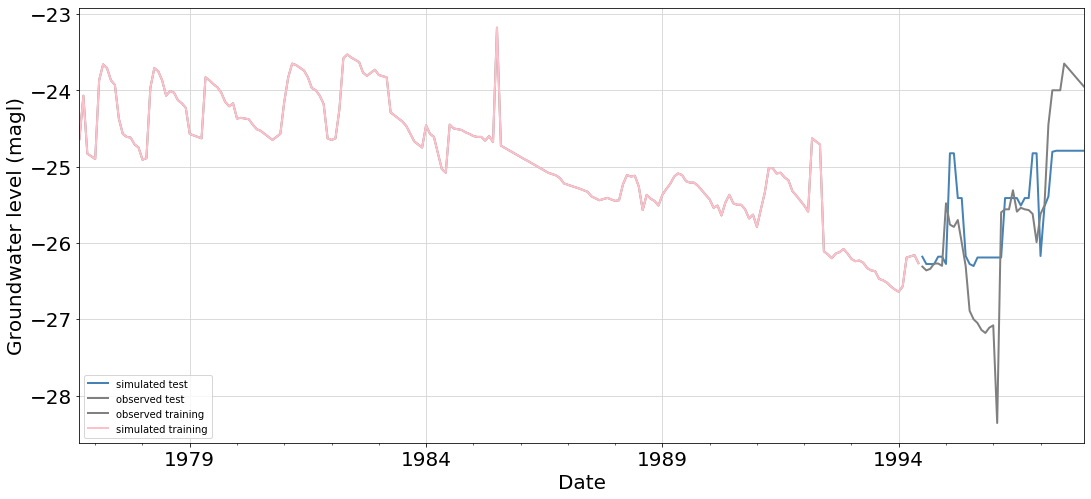

In [84]:
mse_dc = summary['mse_dc'].mean(axis=0)
rmse_dc = summary['rmse_dc'].mean(axis=0)
mae_dc = summary['mae_dc'].mean(axis=0)
r2_dc  = summary['r2_dc'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_dc, 3))
print("Mean squared error is:",round(mse_dc,3))
print("Root mean squared error is:",round(rmse_dc, 3))
print("Mean absolute error is:",round(mae_dc,3))




df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[214:256].index)
df1['observed test']      = pima.iloc[214:256, 0].values

df2 = pd.DataFrame(pima.iloc[0:214, 0].values, columns = ['observed training'],index =pima.iloc[0:214].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

### SVR

In [85]:
from sklearn.svm import SVR

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_svr', 'rmse_svr', 'r2_svr','mae_svr'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)
    
    regressor = SVR(kernel='rbf', epsilon=0.1, C=1, degree=4 ,gamma='auto') 
    regressor.fit(X_train,y_train)
    y_svr = regressor.predict(X_test)

    #metrics for test
    y_svr = y_svr
    test_pred.append(y_svr)
    mse_svr = mean_squared_error(y_test, y_svr)
    rmse_svr = np.sqrt(mse_svr)
    r2_svr = r2_score(y_test, y_svr)
    mae_svr = mean_absolute_error(y_test, y_svr)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_svr,Round), round(rmse_svr,Round), round(r2_svr,Round),round(mae_svr,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(214, 6)
Running fold 2
(214, 6)
Running fold 3
(214, 6)
Running fold 4
(214, 6)
Running fold 5
(214, 6)
Running fold 6
(214, 6)
Running fold 7
(214, 6)
Running fold 8
(214, 6)
Running fold 9
(214, 6)
Running fold 10
(214, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

In [86]:
summary

Iteration_No  mse_svr  rmse_svr  r2_svr  mae_svr
0   Iteration_1    0.219     0.468   0.833    0.308
1   Iteration_2    0.219     0.468   0.833    0.308
2   Iteration_3    0.219     0.468   0.833    0.308
3   Iteration_4    0.219     0.468   0.833    0.308
4   Iteration_5    0.219     0.468   0.833    0.308
5   Iteration_6    0.219     0.468   0.833    0.308
6   Iteration_7    0.219     0.468   0.833    0.308
7   Iteration_8    0.219     0.468   0.833    0.308
8   Iteration_9    0.219     0.468   0.833    0.308
9  Iteration_10    0.219     0.468   0.833    0.308

In [87]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:214, 6].values

In [88]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.051
Root mean squared error is: 0.226
Mean absolute error is: 0.113
R^2 score is:  0.913

The model performance for the test set
--------------------------------------
R^2 score is:  0.833
Mean squared error is: 0.219
Root mean squared error is: 0.468
Mean absolute error is: 0.308


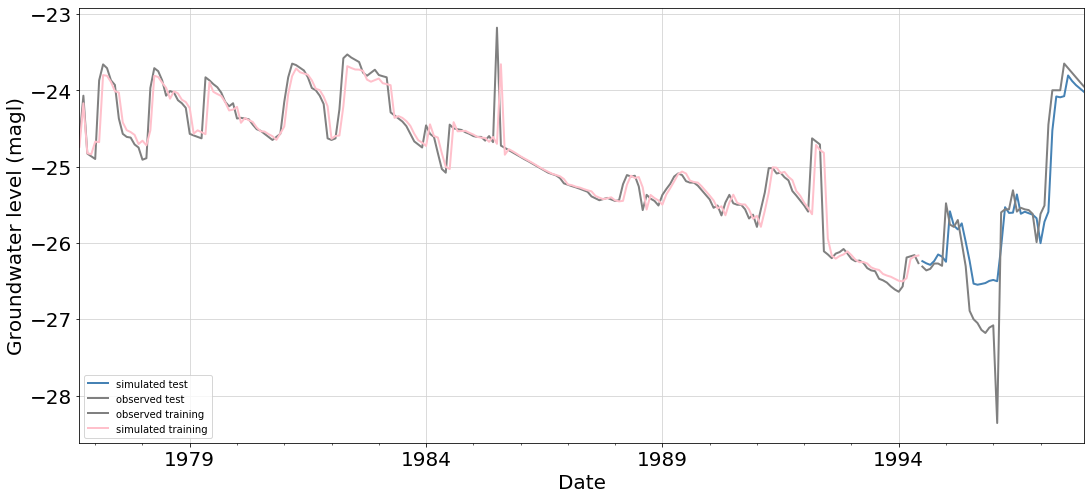

In [89]:
mse_svr  = summary['mse_svr'].mean(axis=0)
rmse_svr = summary['rmse_svr'].mean(axis=0)
mae_svr  = summary['mae_svr'].mean(axis=0)
r2_svr   = summary['r2_svr'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_svr, 3))
print("Mean squared error is:",round(mse_svr,3))
print("Root mean squared error is:",round(rmse_svr, 3))
print("Mean absolute error is:",round(mae_svr,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[214:256].index)
df1['observed test']      = pima.iloc[214:256, 0].values

df2 = pd.DataFrame(pima.iloc[0:214, 0].values, columns = ['observed training'],index =pima.iloc[0:214].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

### GradientBoostingRegressor

In [90]:
from sklearn.ensemble import GradientBoostingRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_gb', 'rmse_gb', 'r2_gb','mae_gb'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    regressor = GradientBoostingRegressor()
    regressor.fit(X_train,y_train)
    y_gb = regressor.predict(X_test)

    #metrics for test
    y_gb = y_gb
    test_pred.append(y_gb)
    mse_gb = mean_squared_error(y_test, y_gb)
    rmse_gb = np.sqrt(mse_gb)
    r2_gb = r2_score(y_test, y_gb)
    mae_gb = mean_absolute_error(y_test, y_gb)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_gb,Round), round(rmse_gb,Round), round(r2_gb,Round),round(mae_gb,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(214, 6)
Running fold 2
(214, 6)
Running fold 3
(214, 6)
Running fold 4
(214, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Running fold 5
(214, 6)
Running fold 6
(214, 6)
Running fold 7
(214, 6)
Running fold 8
(214, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

Running fold 9
(214, 6)
Running fold 10
(214, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [91]:
summary

Iteration_No  mse_gb  rmse_gb  r2_gb  mae_gb
0   Iteration_1   0.426    0.653  0.676   0.503
1   Iteration_2   0.428    0.654  0.674   0.504
2   Iteration_3   0.426    0.652  0.676   0.503
3   Iteration_4   0.427    0.654  0.675   0.503
4   Iteration_5   0.428    0.654  0.674   0.504
5   Iteration_6   0.430    0.655  0.673   0.504
6   Iteration_7   0.427    0.654  0.674   0.505
7   Iteration_8   0.429    0.655  0.673   0.505
8   Iteration_9   0.428    0.654  0.674   0.504
9  Iteration_10   0.426    0.653  0.675   0.501

In [92]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:214, 6].values

In [93]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.006
Root mean squared error is: 0.075
Mean absolute error is: 0.051
R^2 score is:  0.99

The model performance for the test set
--------------------------------------
R^2 score is:  0.674
Mean squared error is: 0.428
Root mean squared error is: 0.654
Mean absolute error is: 0.504


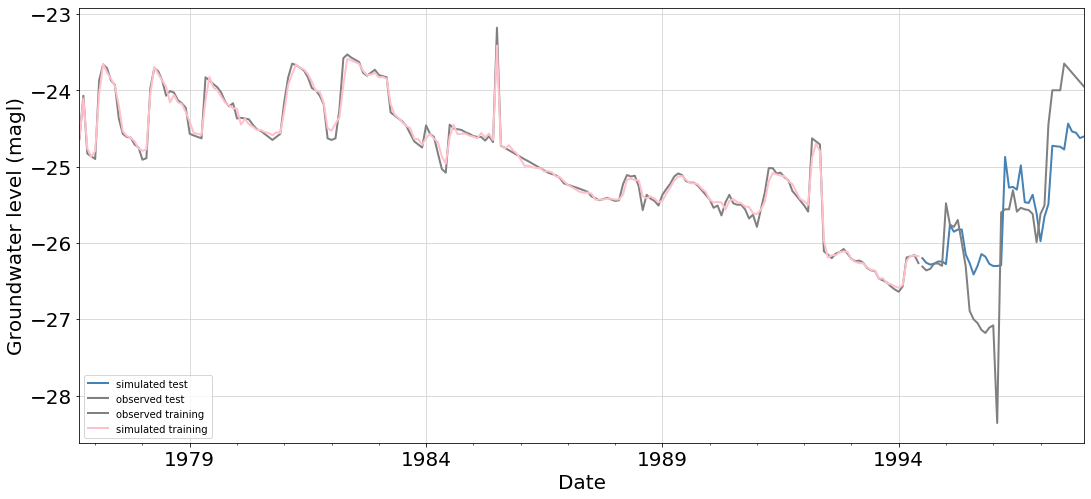

In [94]:
mse_gb  = summary['mse_gb'].mean(axis=0)
rmse_gb = summary['rmse_gb'].mean(axis=0)
mae_gb  = summary['mae_gb'].mean(axis=0)
r2_gb   = summary['r2_gb'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_gb, 3))
print("Mean squared error is:",round(mse_gb,3))
print("Root mean squared error is:",round(rmse_gb, 3))
print("Mean absolute error is:",round(mae_gb,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[214:256].index)
df1['observed test']      = pima.iloc[214:256, 0].values

df2 = pd.DataFrame(pima.iloc[0:214, 0].values, columns = ['observed training'],index =pima.iloc[0:214].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

### Randon Forest

In [95]:
from sklearn.ensemble import RandomForestRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_rf', 'rmse_rf', 'r2_rf','mae_rf'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)



    rf = RandomForestRegressor(n_estimators=10)
    rf.fit(X_train, y_train)
    y_rf = rf.predict(X_test)

    #metrics for test
    y_rf= y_rf
    test_pred.append(y_rf)
    mse_rf= mean_squared_error(y_test, y_rf)
    rmse_rf= np.sqrt(mse_rf)
    r2_rf= r2_score(y_test, y_rf)
    mae_rf= mean_absolute_error(y_test, y_rf)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_rf,Round), round(rmse_rf,Round), round(r2_rf,Round),round(mae_rf,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(214, 6)
Running fold 2
(214, 6)
Running fold 3
(214, 6)
Running fold 4
(214, 6)
Running fold 5
(214, 6)
Running fold 6
(214, 6)
Running fold 7
(214, 6)
Running fold 8
(214, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-

Running fold 9
(214, 6)
Running fold 10
(214, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [96]:
summary

Iteration_No  mse_rf  rmse_rf  r2_rf  mae_rf
0   Iteration_1   0.371    0.609  0.717   0.491
1   Iteration_2   0.508    0.713  0.613   0.601
2   Iteration_3   0.515    0.717  0.608   0.607
3   Iteration_4   0.664    0.815  0.494   0.697
4   Iteration_5   0.454    0.674  0.654   0.568
5   Iteration_6   0.326    0.571  0.751   0.436
6   Iteration_7   0.480    0.693  0.634   0.570
7   Iteration_8   0.573    0.757  0.564   0.634
8   Iteration_9   0.354    0.595  0.730   0.468
9  Iteration_10   0.604    0.777  0.540   0.649

In [97]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:214, 6].values

In [98]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.006
Root mean squared error is: 0.075
Mean absolute error is: 0.051
R^2 score is:  0.99

The model performance for the test set
--------------------------------------
R^2 score is:  0.631
Mean squared error is: 0.485
Root mean squared error is: 0.692
Mean absolute error is: 0.572


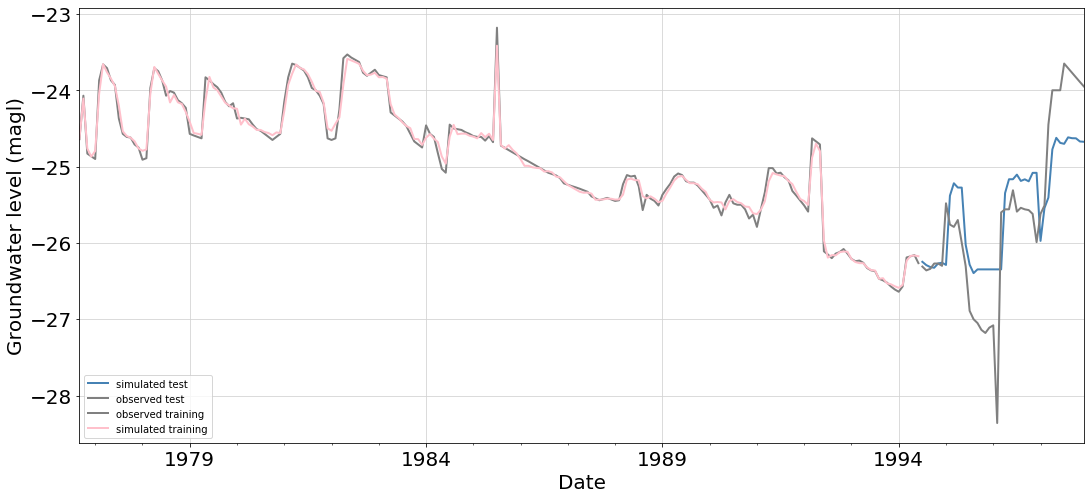

In [99]:
mse_rf  = summary['mse_rf'].mean(axis=0)
rmse_rf = summary['rmse_rf'].mean(axis=0)
mae_rf  = summary['mae_rf'].mean(axis=0)
r2_rf   = summary['r2_rf'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_rf, 3))
print("Mean squared error is:",round(mse_rf,3))
print("Root mean squared error is:",round(rmse_rf, 3))
print("Mean absolute error is:",round(mae_rf,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[214:256].index)
df1['observed test']      = pima.iloc[214:256, 0].values

df2 = pd.DataFrame(pima.iloc[0:214, 0].values, columns = ['observed training'],index =pima.iloc[0:214].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [100]:
vs = pd.DataFrame(pima.iloc[214:256, 0].values, columns = ['Observed'],index =pima.iloc[214:256].index)
vs['SVR'] = y_svr
vs['GB'] = y_gb
vs['RF'] = y_rf
vs['DC'] = y_dc
vs['LSTM'] = y_lstm
vs['GRU'] = y_gru

Text(0, 0.5, 'Groundwater levels (magl)')

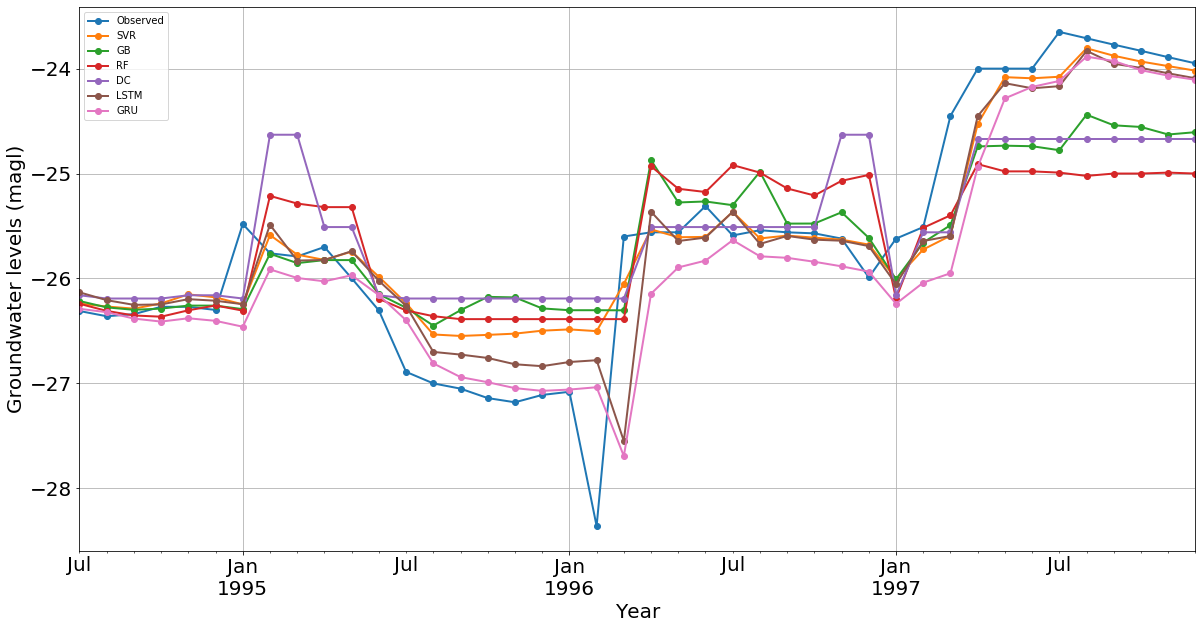

In [101]:
vs.plot(figsize=(20,10), linewidth=2, fontsize = 20, grid=True, marker='o')
plt.xlabel("Year",fontsize=20)
plt.ylabel("Groundwater levels (magl)",fontsize=20)